<a href="https://colab.research.google.com/github/omerbmk/CIND-820-OmerMirza/blob/main/CIND_820_Bank_Telemarketing_Final_(4-4-2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3. Initial Results and the Code**

#INTRODUCTION

CIND-820 Final Project

Dataset: Portuguese Bank Telemarketing

Classification Bank Marketing Campaign dataset

By: Omer Mirza 501077861

Code link: https://github.com/omerbmk/
CIND-820-OmerMirza/blob/main/CIND_820_Bank_Telemarketing.ipynb

#**Loading Libraries**

To start we will load some basic libraries such as Pandas and NumPy and then make some configuration to some of those libraries.

In [1]:
import os
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib
#import matplotlib as plt
matplotlib.use(u'nbAgg')
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import statistics
import scipy
import plotly.express as px


#Data Pre-Processing

##Loading data
In this first step we will load our dataset that has been uploaded on my GitHub for easier process. From the dataset documentation found here we can see below are the list of column we have in our data:

Attribute Information:

Input variables:

# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no'

In [2]:
#Load dataset
file_name = "https://raw.githubusercontent.com/omerbmk/CIND-820-OmerMirza/main/bank-additional-full.csv"
bank = pd.read_csv(file_name, sep=';')

**Creating number of dataset for evaluation purposes**

In [3]:
#Creating primary dataset for evalution
df_bank = pd.read_csv(file_name, sep=';')

In [4]:
#Dataset created for evalution purposes of data imbalance graph
df_banki = pd.read_csv(file_name, sep=';')

In [5]:
df_bankc = pd.read_csv(file_name, sep=';')
# Here we use the apply funtion to transform 'y' from yes or no to 0s and 1s
df_bankc['converted'] = df_bankc['y'].apply(lambda x: 0 if x == 'no' else 1)
del df_bankc['y']
#df_bankc.head()

In [6]:
# Create list of features
cat_features = list(df_bank.select_dtypes('object').columns)
int_features = list(df_bank.select_dtypes('int64').columns)
float_features = list(df_bank.select_dtypes('float64').columns)
num_features = int_features+float_features

In [7]:
# Creating Cross_validation_data
cvd = pd.read_csv(file_name, sep=';')

#**EDA - Exploratory Data Analysis**


### Data data shape & Feature (num of Rows & Columns)

In [8]:
# 1. Check data shape & Feature (num of Rows & Columns)
print('Shape of dataframe (Cols, rows):', df_bank.shape)
print(f"Number of clients: .............. {df_bank.shape[0]}") # Number of observations
print(f"Number of variables: ............ {df_bank.shape[1]} ") # Number of variables or attributes
print (f"\nFeatures : \n" ,df_bank.columns.tolist()) 


Shape of dataframe (Cols, rows): (41188, 21)
Number of clients: .............. 41188
Number of variables: ............ 21 

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [9]:
# 2.a Description of data 
# General stats of numeric variables
df_bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000



1.   age: the youngest client has 17 years old and the oldest has 98 years with a median of 38 years whilst the average is 40 years old

2. pdays: The majority of the clients have the 999 number wich indicates that most people did not contact nor were contacted by the bank. Those are considered to be 'out of range' values

3. previous: The vast majority were never contacted before

4. emp_var_rate: during the period the index varied from [-3.4, 1.4]

5. cons_price_idx: the index varied from [92.2, 94.8]

6. cons_conf_idx: the consumer confidence level during that period kept always negative with a range of variation of [-51, -27]. These negative values might be explained by the recession that severely affected Portugal due the financial global crisis during that same period the data was recorded

7. euribor3m: there were a huge variation of the euribor rate during the period of analysis [5% to 0.6%]. This abrupt change in euribor together with the negative confidance verified reinforces the hipothesis that this data provides information from a crisis period

8. nr_employed: the number of employed people varied around 200 during the campaign



In [10]:
#2.b Description of data 
# General stats of categoric variables
bank.describe(include=['object']) 

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

1. job:there are 12 types of jobs recordings in wich the 'administrative' role is the most comum with almost 10.5k of the clients

2. marital:the majority of clients are married with almost 25k records

3. education:more than 12k people have university degree

4. default:from all the 41.188 clients, 32.588 don't have any credit in default

5. housing:almost half of the customers have a housing loan

6. loan:almost 34k clients don't have any personal loans

7. poutcome:there is no information about the outcome of any previous marketing campaign




In [11]:
# To View data in table structure To get the first 5 top and bottom rows
df_bank.head(-100)

age          job   marital            education  default housing loan  \
0       56    housemaid   married             basic.4y       no      no   no   
1       57     services   married          high.school  unknown      no   no   
2       37     services   married          high.school       no     yes   no   
3       40       admin.   married             basic.6y       no      no   no   
4       56     services   married          high.school       no      no  yes   
...    ...          ...       ...                  ...      ...     ...  ...   
41083   24   technician    single    university.degree       no     yes  yes   
41084   18      student    single              unknown       no     yes   no   
41085   51       admin.  divorced          high.school       no     yes  yes   
41086   50  blue-collar  divorced  professional.course       no     yes   no   
41087   30  blue-collar    single  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41083   cellular   nov         tue  ...         3      6         3   
41084   cellular   nov         tue  ...         2    999         3   
41085   cellular   nov         tue  ...         2      6         4   
41086   cellular   nov         tue  ...         2      9         3   
41087   cellular   nov         tue  ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41083      failure         -1.1          94.767          -50.8      1.049   
41084      failure         -1.1          94.767          -50.8      1.049   
41085      failure         -1.1          94.767          -50.8      1.049   
41086      success         -1.1          94.767          -50.8      1.049   
41087  nonexistent         -1.1          94.767          -50.8      1.049   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41083       4963.6  yes  
41084       4963.6   no  
41085       4963.6  yes  
41086       4963.6   no  
41087       4963.6   no  

[41088 rows x 21 columns]

In [12]:
#Check each data type of columns
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
# To Check for Duplicate Value
print(f"Number of duplicate entries: .... {bank.duplicated().sum()}")

Number of duplicate entries: .... 12


In [14]:
# To Check for Missing Value
print (f"\nMissing values :  ", bank.isnull().sum().values.sum())
#print (f"\nMissing values of each attributes :  ",df_bank.isnull().values.any())
print (f"\nMissing values of each attributes :\n",df_bank.isna().sum())


Missing values :   0

Missing values of each attributes :
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [15]:
# To check Unique Value
print (f"\nUnique values :  \n", df_bank.nunique())


Unique values :  
 age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [16]:
#How many o values in every attribute
print(f"\n 0 value in every attribute :\n", df_bank.isin([0]).sum())


 0 value in every attribute :
 age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64


In [17]:
bank.groupby('y').mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                          
no   39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
yes  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                           
no        93.603757     -40.593097   3.811491  5176.166600  
yes       93.354386     -39.789784   2.123135  5095.115991

In [18]:
df_bank.isnull().sum() / df_bank.shape[0] * 100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

###The dataset is highly embalanced.
From the above information we can clearly state that the dataset is absolutely embalanced with the 0:'no' aproximately 8 times higher than 1:'yes'.


[0] Number of clients that haven't subscribed the term deposit: ... 36548
[1] Number of clients that have subscribed the term deposit: ....... 4640



clients      %
0    36548  88.73
1     4640  11.27

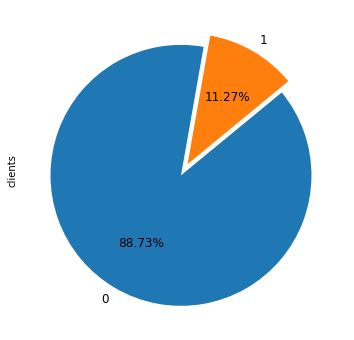

In [19]:
# Converting the target from binary/categoric into binary/numeric
df_banki['target'] = df_banki.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
#df_bank.drop(["y"],axis=1,inplace=True)

absolut = df_banki.target.value_counts().to_frame().rename(columns={"target":"clients"})
percent = (df_banki.target.value_counts(normalize=True)*100).to_frame().rename(columns={"target":"%"})
df_bank_bal = pd.concat([absolut,percent],axis=1).round(decimals=2)
print("")
print(f"[0] Number of clients that haven't subscribed the term deposit: ... {df_banki.target.value_counts()[0]}")
print(f"[1] Number of clients that have subscribed the term deposit: ....... {df_banki.target.value_counts()[1]}")
print("")
display(df_bank_bal)
absolut.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

From the above information we can clearly state that the dataset is absolutely embalanced with the 0:'no' aproximately 8 times higher than 1:'yes'.

#Numeric variables Analysis

In [20]:
df_bankn = bank.select_dtypes(include = np.number)
df_bankn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [21]:
# View the number of unique elements in each feature
df_bankn.nunique()

age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

In [22]:
# Check global outliers using 0.05 quantile and 0.95 quantile
min_p = df_bankn.quantile(0.05)
max_p = df_bankn.quantile(0.95)

# Column vs Number of Outliers
((df_bankn <= min_p) | (df_bankn >= max_p)).sum()

age                4596
duration           4152
campaign          20048
pdays             41188
previous          41188
emp.var.rate      19140
cons.price.idx     6897
cons.conf.idx      5263
euribor3m          4530
nr.employed       19363
dtype: int64

In [23]:
def plotting_kd(df_bank,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(df_bank,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(df_bank,hue=hue,size=10).map(sns.distplot,columns)
        plt.legend()


def violinplot_columns(columns,y='y'):
    figure(figsize=(15,10))
    sns.violinplot(x=df_bank[y],y=df_bankn[columns],hue=df_bank['y'],showfliers=False)
    plt.title(columns.upper())

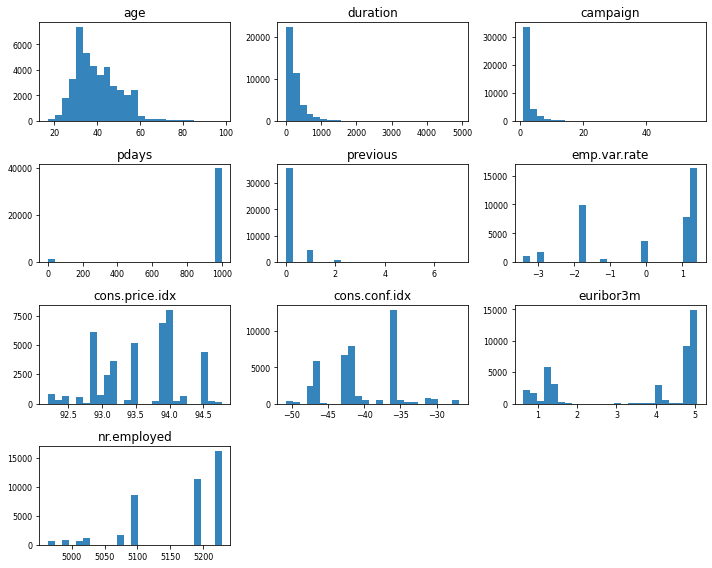

In [24]:
# Visualization of the numeric distribution
df_bank[num_features].hist(figsize=(10,8), bins=25, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False) 
plt.tight_layout();

###1. **Age Analysis**

*   Personal Attributes
*   age of customer



In [25]:
#df_bankn['age'].unique()

In [26]:
# General stats description of AGE
print (df_bankn.iloc[:,0].describe())
print(f"the median age is :", (statistics.median(df_bankn.iloc[:,0])))
print(f"the varaince of age is:",df_bankn.age.var())
print(f"the Skewness of age is:",scipy.stats.skew(df_bankn.age))
print(f"the Kurtosis of age is:",scipy.stats.kurtosis(df_bankn.age))

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
the median age is : 38.0
the varaince of age is: 108.60245116512178
the Skewness of age is: 0.7846682380932289
the Kurtosis of age is: 0.7910698035273853


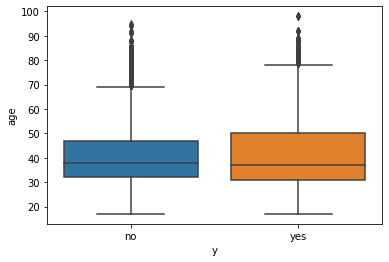

In [27]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="age")


From the above boxplot  it is clearly visible that there are outliers present for both the class. We know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

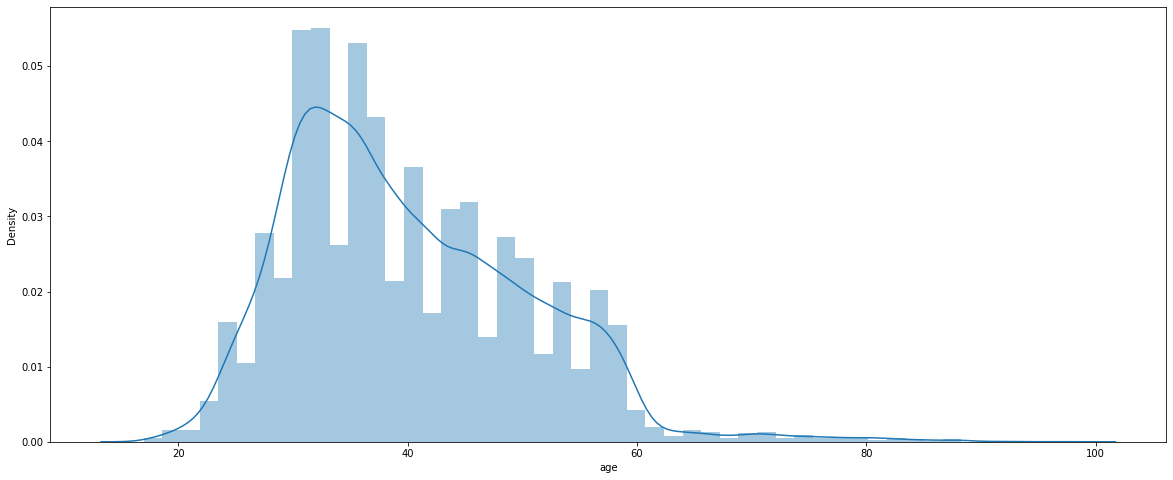

In [28]:
plt.figure(figsize=(20,8))
sns.distplot(df_bankn["age"])

1. As we can see in the above distribution also, that most of the customers are in the age range of 30-40

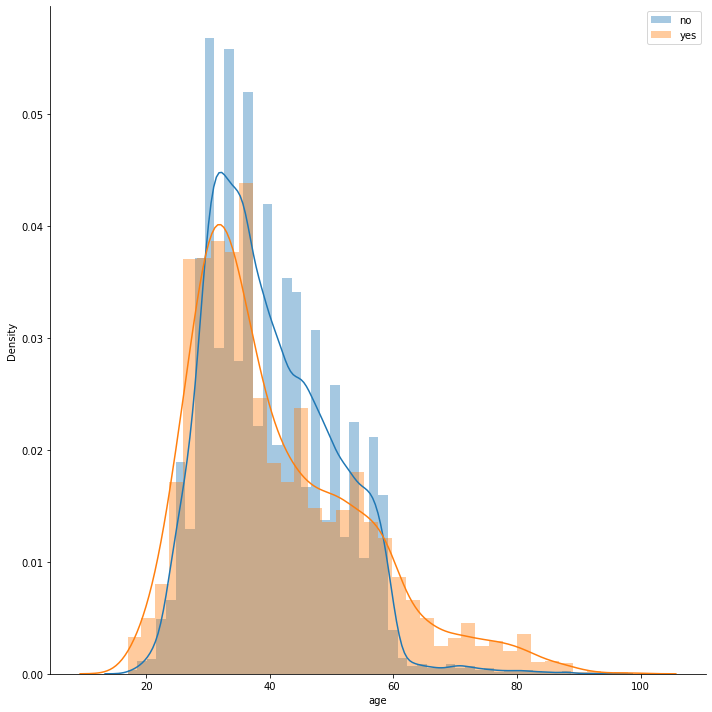

In [29]:
plotting_kd(df_bank,'age',hue='y')

Plotting kdeplot with hue as classes it is more clear that age might not be very helpful in prediction of class labels because there is so much of overlapping.

age_bins
Young     15.207373
Adult      9.430005
Senior    45.494505
Name: target, dtype: float64

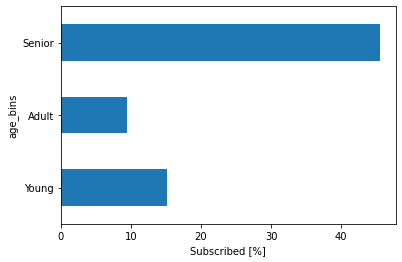

In [30]:
# Converting the target from binary/categoric into binary/numeric
df_bank['target'] = df_bank.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)

df_bank['age_bins'] = pd.cut(df_bank['age'], bins = [df_bank['age'].min(), 30, 60, df_bank['age'].max()], 
                  labels=['Young', 'Adult', 'Senior'])

group_age_target = df_bank.groupby(['age_bins'])['target'].mean().multiply(100)

display(group_age_target)
print("")

# Display graph
group_age_target.plot.barh()
plt.xlabel('Subscribed [%]');

It is very clear the relation betweem the subscription rate and age of customers:

1. 45.5% of Seniors (+60 years old) subscribed to the term deposit
2. less than 10% Adults (>30 and <=60 years old) subscribed
3. Young people were the 2nd group that subscribed the deposit corresponding to 1/6 of all young people


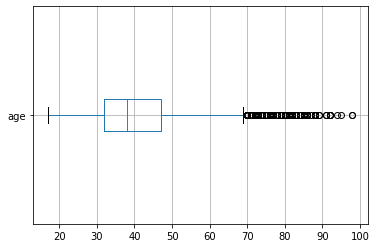

In [31]:
# boxplot for age for Outliiers
df_bankn.boxplot(column=['age'],vert = False)

Min age in 17 and Max age is 98, so there is no contextual outliers 

###2. **Duration**

*   related with the last contact of the current campaign:
*   last contact duration, in seconds 



In [32]:
#df_bankn['duration'].unique()
#df_bank["duration"].value_counts()

In [33]:
# General stats description of DURATION
print (df_bankn.iloc[:,1].describe())
print(f"the median duration is :", (statistics.median(df_bankn.iloc[:,0])))
print(f"the varaince of duration is:",df_bankn.duration.var())
print(f"the Skewness of duration is:",scipy.stats.skew(df_bankn.duration))
print(f"the Kurtosis of duration is:",scipy.stats.kurtosis(df_bankn.duration))

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
the median duration is : 38.0
the varaince of duration is: 67225.72887720143
the Skewness of duration is: 3.2630224157610432
the Kurtosis of duration is: 20.245334438614844


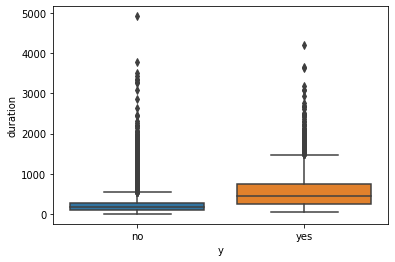

In [34]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="duration")


From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

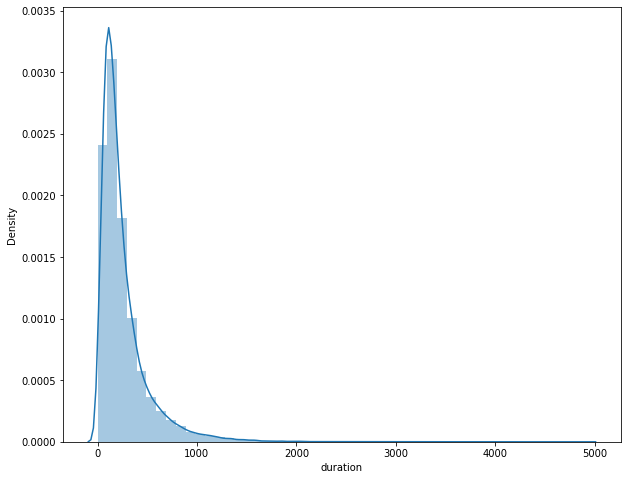

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(df_bank["duration"])


This seems like a powerlaw distribution where most the values are very low and very few have high values.

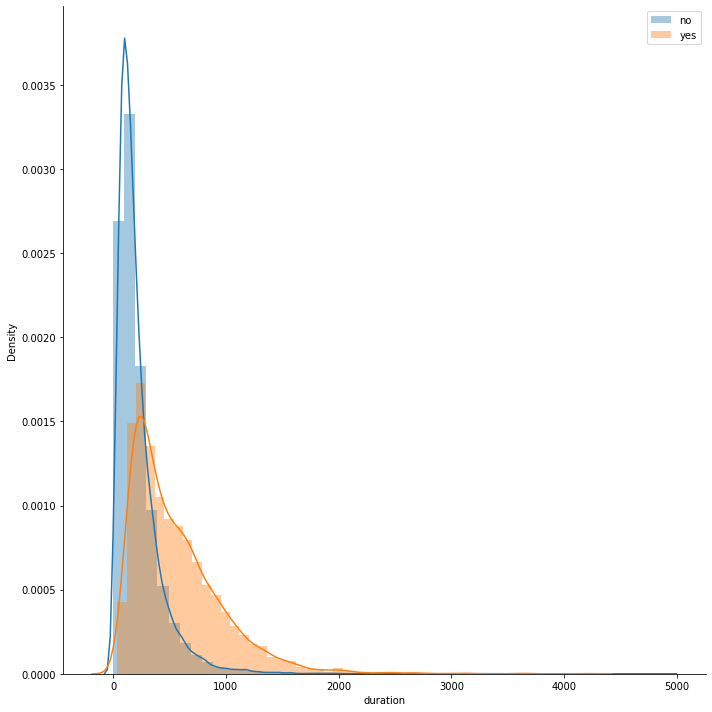

In [36]:
plotting_kd(df_bank,'duration',hue='y')

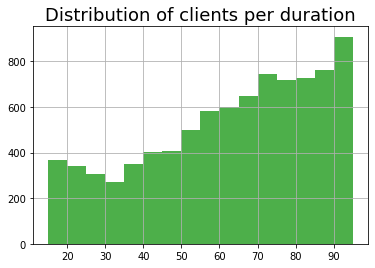

In [37]:
base_color = sns.color_palette('Set1')[2]

duration_bins = np.arange(15, 100, 5)
plt.hist(data = df_bank, x = 'duration', bins = duration_bins, color = base_color);
plt.title("Distribution of clients per duration", fontsize=18)
plt.grid();

###3. **Campaign**

*   other campaign attributes:
*   number of contacts performed during this campaign and for this client 



In [38]:
# General stats description of CAMPAIGN
print (df_bankn.iloc[:,2].describe())
print(f"the median campaign is :", (statistics.median(df_bankn.iloc[:,0])))
print(f"the varaince of campaign is:",df_bankn.campaign.var())
print(f"the Skewness of campaign is:",scipy.stats.skew(df_bankn.campaign))
print(f"the Kurtosis of campaign is:",scipy.stats.kurtosis(df_bankn.campaign))

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
the median campaign is : 38.0
the varaince of campaign is: 7.672975027861115
the Skewness of campaign is: 4.762333252560971
the Kurtosis of campaign is: 36.97516047878921


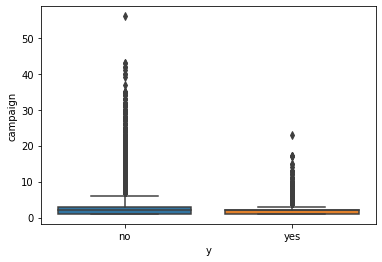

In [39]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="campaign")
plt.show()

From the above plot there are so many outliers are present for No class than yes class. Also it seems like this plot maynot be very helpful in predicting class variables. Lets plot kdplot with hue

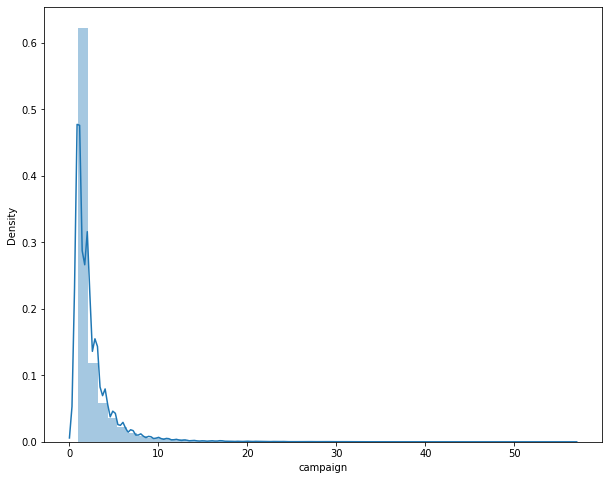

In [40]:
#%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_bank["campaign"])
plt.show()

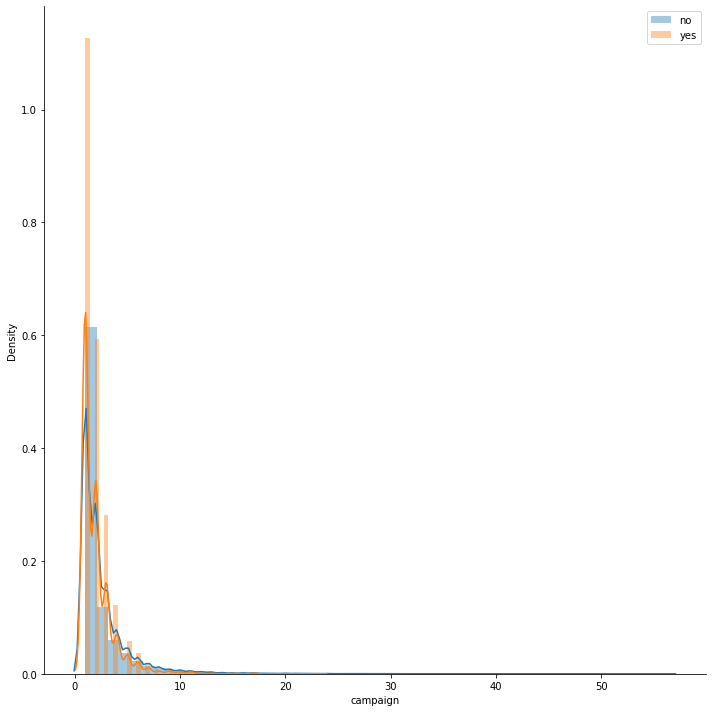

In [41]:
plotting_kd(df_bank,'campaign',hue='y')

 There is very much overlapping for both the classes.

###4. **pdays** 

1.   other campaign attributes:
2.    number of days that passed by after the client was last contacted from a previous campaign 


In [42]:
df_bankn['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [43]:
# General stats description of PDAYS
print (df_bankn.iloc[:,3].describe())
print(f"the median pdays is :", (statistics.median(df_bankn.iloc[:,3])))
print(f"the varaince of pdays is:",df_bankn.pdays.var())
print(f"the Skewness of pdays is:",scipy.stats.skew(df_bankn.pdays))
print(f"the Kurtosis of pdays is:",scipy.stats.kurtosis(df_bankn.pdays))

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
the median pdays is : 999.0
the varaince of pdays is: 34935.68728443533
the Skewness of pdays is: -4.922010656450045
the Kurtosis of pdays is: 22.2266185118177


In [44]:
df_bank["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Most of the values are 999, which means that the most of the customers have never been contacted before.

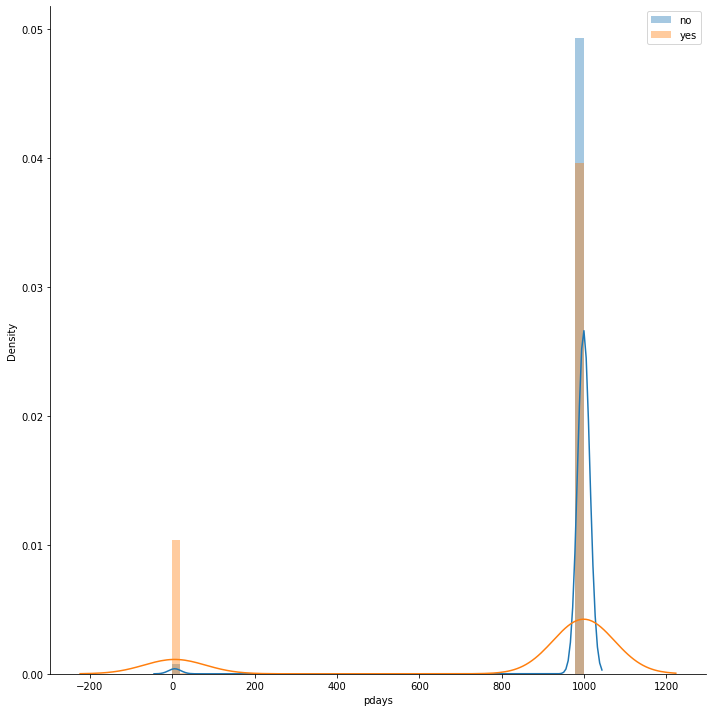

In [45]:
plotting_kd(df_bank,'pdays',hue='y')

Median: 6.0


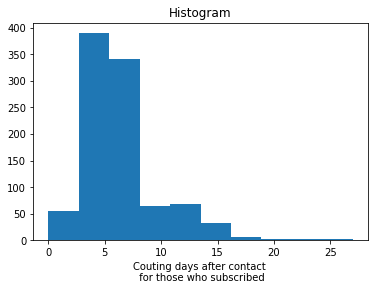

In [46]:
dummy = df_bank.loc[(df_bank['pdays']!=999) & (df_bank['target'] == 1), 'pdays']
print('Median: {:.2}'.format(dummy.median()))
dummy.hist().grid(False)
plt.title('Histogram')
plt.xlabel('Couting days after contact \n for those who subscribed');

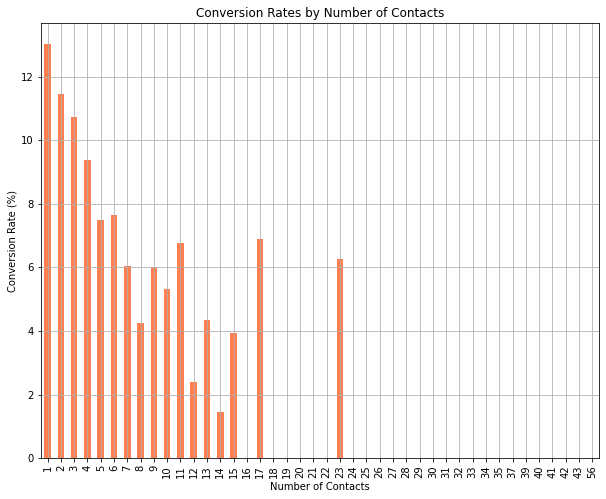

In [47]:
# Conversion rate by campaign
conversions_by_contacts = df_bankc.groupby('campaign')['converted'].sum() / df_bankc.groupby('campaign')['converted'].count() * 100.0
# Let's see the top ten campaigns in terms of % converted
conversions_by_contacts.head(10)
ax = conversions_by_contacts.plot(
    kind='bar',
    figsize=(10, 8),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='coral'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

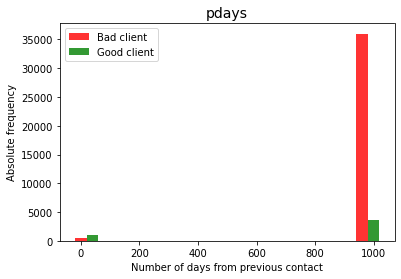

In [48]:
# Visualization variable vs. target
pdays_0 = df_bank[df_bank.target == 0].iloc[:,12:13]
pdays_1 = df_bank[df_bank.target == 1].iloc[:,12:13]

a = np.array(pdays_0)
b = np.array(pdays_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=False, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=False, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper left')
plt.title('pdays', fontsize=14)
plt.xlabel('Number of days from previous contact')
plt.ylabel('Absolute frequency')
plt.show()

Considering only the clients who had subscribed let's count the days that passed by after contact from a previous campaign. Most of the people will respond by first 6th days.

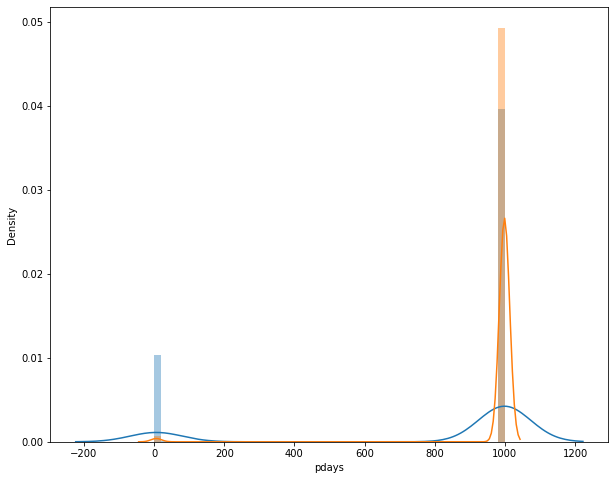

In [49]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_bank[df_bank["y"]=="yes"]["pdays"])
sns.distplot(df_bank[df_bank["y"]=="no"]["pdays"])
plt.show()

###4. **previous**

*   other campaign attributes:
*   number of contacts performed before this campaign and for this client 



In [50]:
# General stats description of PREVIOUS
print (f"Key Stats of emp.var.rate:\n",df_bankn.iloc[:,4].describe(include='all'))
print(f"the median previous is :", (statistics.median(df_bankn.iloc[:,4])))
print(f"the varaince of previous is:",df_bankn.previous.var())
print(f"the Skewness of previous is:",scipy.stats.skew(df_bankn.previous))
print(f"the Kurtosis of previous is:",scipy.stats.kurtosis(df_bankn.previous))


Key Stats of emp.var.rate:
 count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
the median previous is : 0.0
the varaince of previous is: 0.24492707882612333
the Skewness of previous is: 3.8319026847007014
the Kurtosis of previous is: 20.106229526902816


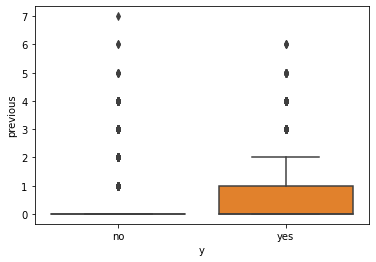

In [51]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="previous")
plt.show()

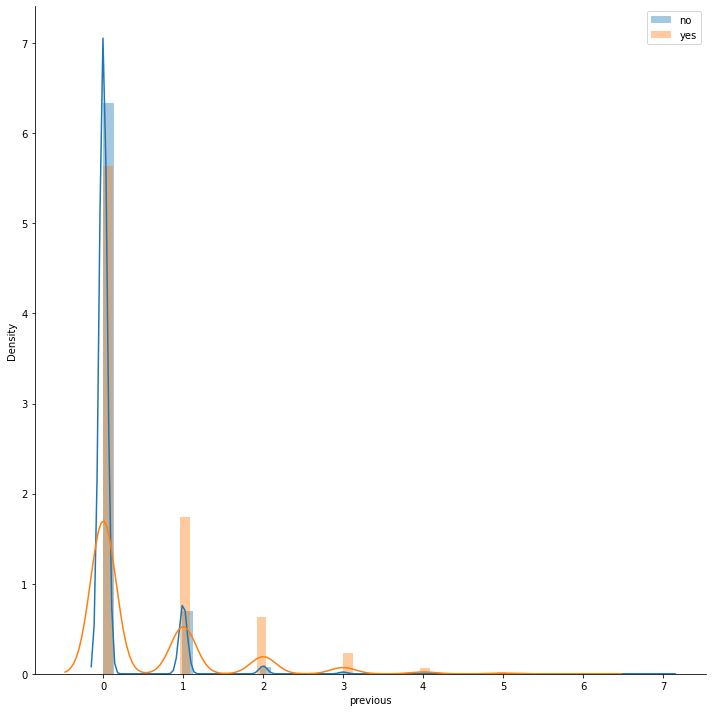

In [52]:
plotting_kd(df_bank,'previous',hue='y')

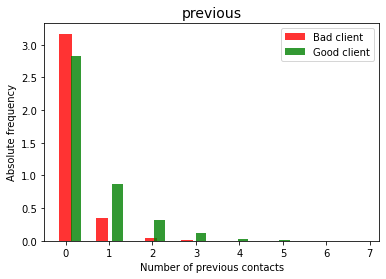

In [53]:
# Visualization variable vs. target
previous_0 = df_bank[df_bank.target == 0].iloc[:,13:14]
previous_1 = df_bank[df_bank.target == 1].iloc[:,13:14]

a = np.array(previous_0)
b = np.array(previous_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=True, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('previous', fontsize=14)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

How many people were previously contacted? ................. 5625
How many people were never re-contacted 1 times? .................... 35563
How many people were contacted atleast 1 times? .................... 4561
How many people were previously contacted with sucess? ..... 4252
How many people were previously contacted with failure? .... 1373


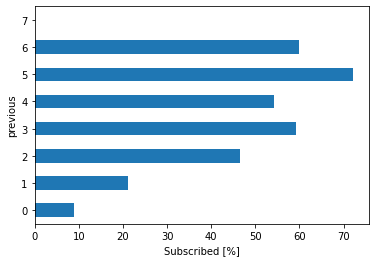

In [54]:
group = df_bank.groupby(['previous'])['target'].mean().multiply(100)
group.plot.barh()
plt.xlabel('Subscribed [%]');

print('How many people were previously contacted? ................. {}'.format(df_bank.loc[df_bank['previous']!=0].shape[0]))
print('How many people were never re-contacted 1 times? .................... {}'.format(df_bank.loc[df_bank['previous']==0, 'previous'].count()))
print('How many people were contacted atleast 1 times? .................... {}'.format(df_bank.loc[df_bank['previous']==1, 'previous'].count()))
print('How many people were previously contacted with sucess? ..... {}'.format(df_bank.poutcome.value_counts()[1]))
print('How many people were previously contacted with failure? .... {}'.format(df_bank.poutcome.value_counts()[2]))

People that were previously contacted subscribed in a much higher rate to the term deposit.

While in people never contacted only 10% subscribed to the deposit, for people that was previously contacted more than twice the campaign success increases to >45%.

## **Indexes variables**

There are 4 macro rating variables, or economic indexes, present in the dataset. Let's digg a bit further and breafly investigate their correlation and check if there are any trends of patterns between those indexes and also with each other against the target. Let's create a list only with these specific variables and display them side by side (pairplot method).

In [55]:
# creating numeric indexes

idx_list = ["cons.price.idx","cons.conf.idx","euribor3m","emp.var.rate","nr.employed","target"]
df_bank[idx_list].corr()

cons.price.idx  cons.conf.idx  euribor3m  emp.var.rate  \
cons.price.idx        1.000000       0.058986   0.688230      0.775334   
cons.conf.idx         0.058986       1.000000   0.277686      0.196041   
euribor3m             0.688230       0.277686   1.000000      0.972245   
emp.var.rate          0.775334       0.196041   0.972245      1.000000   
nr.employed           0.522034       0.100513   0.945154      0.906970   
target               -0.136211       0.054878  -0.307771     -0.298334   

                nr.employed    target  
cons.price.idx     0.522034 -0.136211  
cons.conf.idx      0.100513  0.054878  
euribor3m          0.945154 -0.307771  
emp.var.rate       0.906970 -0.298334  
nr.employed        1.000000 -0.354678  
target            -0.354678  1.000000

###10. **nr.employed** 

*   social and economic context attributes
*   number of employees - quarterly indicator

###10. **nr.employed** 

*   social and economic context attributes
*   number of employees - quarterly indicator

We can clearly see that euribor3m,cons_price_idx, nr.employed and emp_Var_rate are highly correlated.

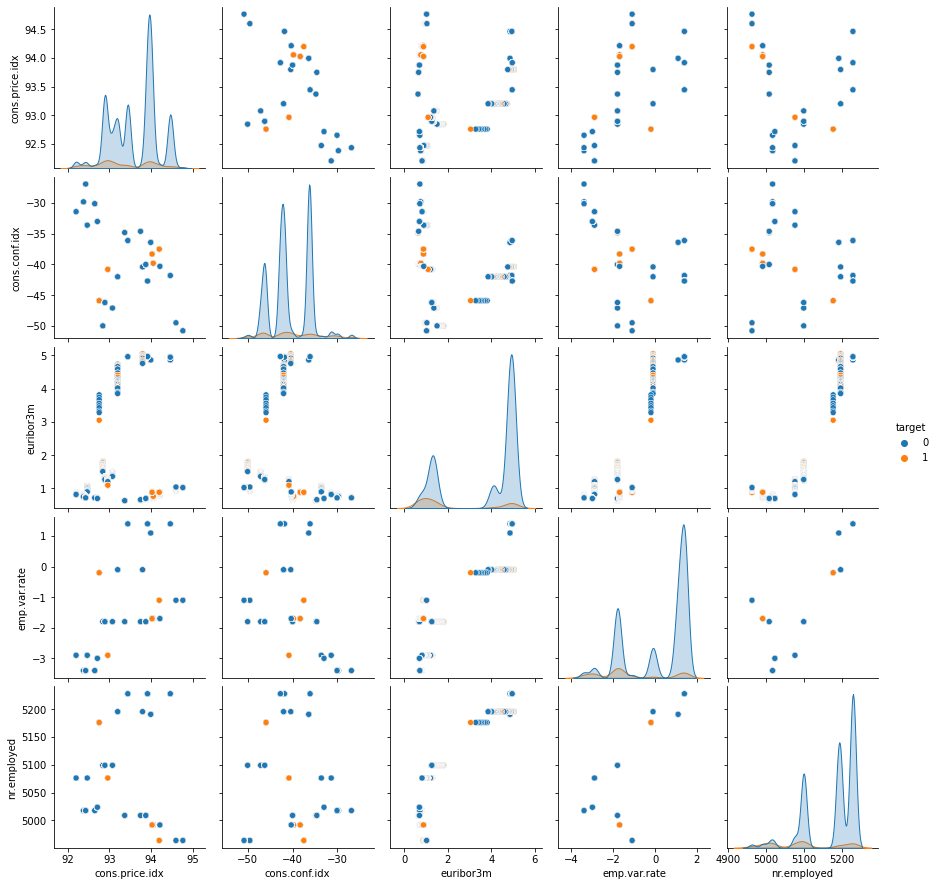

In [56]:
# Visualization of indexes variables' correlations (pairplot)
sns.pairplot(df_bank[idx_list], hue="target")
plt.show()

What can we observe from the scatter plots? Please keep in mind that (blue) 0=NO and (orange) 1=YES

* euribor3m increases when there is a positive variation of emp_var_rate 
* cons_conf_idxvarys linearly with cons_price_idx and emp_var_rate: the higher the prices and rate of employment gets, the lower the confidance level index becomes;
* when emp_var_rate (employment rate) increases, cons_price_idx (price index) increases as well

Can the output of the campaign be affected by the indexes variables? The answer comes from the observation of the distribution plots.

* the lower the euribor3mis, the higher the amount of subscriptions
* when the cons_price_idx(consumer price index) increases there is a strong negative response from the clients' subscriptions
* when the emp_var_rate (employment rate) is negative, there is a higher positive response to the campaign. Feature importance will be study later and we'll have the opportunity to clarify these apparent inconsistences

###6. **emp.var.rate**        

1.   social and economic context attributes
2.   employment variation rate - quarterly indicator 



In [57]:
# General stats description of EMP.VAR.RATE
print (f"Key Stats of emp.var.rate:\n",df_bankn.iloc[:,5].describe(include='all'))
print(f"the median emp.var.rate is :", (statistics.median(df_bankn.iloc[:,5])))
print(f"the varaince of emp.var.rate is:",(statistics.variance(df_bankn.iloc[:,5])))
print(f"the Std Var of emp.var.rate is:",(statistics.stdev(df_bankn.iloc[:,5])))
print(f"the Skewness of emp.var.rate is:",(scipy.stats.skew(df_bankn.iloc[:,5])))
print(f"the Kurtosis of emp.var.rate is:",(scipy.stats.skew(df_bankn.iloc[:,5])))


Key Stats of emp.var.rate:
 count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64
the median emp.var.rate is : 1.1
the varaince of emp.var.rate is: 2.4679145063253203
the Std Var of emp.var.rate is: 1.5709597405170255
the Skewness of emp.var.rate is: -0.7240691785977529
the Kurtosis of emp.var.rate is: -0.7240691785977529


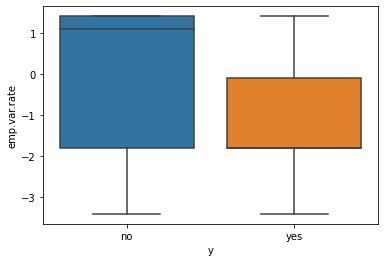

In [58]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="emp.var.rate")
plt.show()

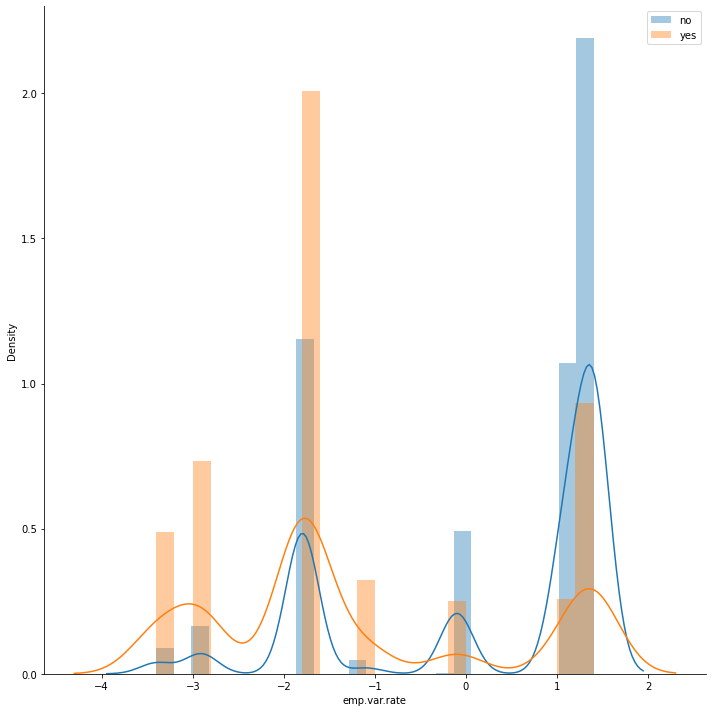

In [59]:
plotting_kd(df_bank,'emp.var.rate',hue='y')

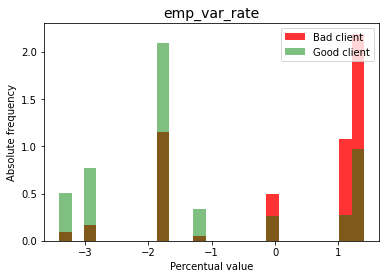

In [60]:
# Visualization of variable vs. target
emp_var_rate_0 = df_bank[df_bank.target == 0].iloc[:,15:16]
emp_var_rate_1 = df_bank[df_bank.target == 1].iloc[:,15:16]

a = np.array(emp_var_rate_0)
b = np.array(emp_var_rate_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('emp_var_rate', fontsize=14)
plt.xlabel('Percentual value')
plt.ylabel('Absolute frequency');

###7. **cons.price.idx**     

*   social and economic context attributes
*   consumer price index - monthly indicator 



In [61]:
# General stats description of cons.price.idx
print (f"Key Stats cons.price.idx:\n",df_bankn.iloc[:,6].describe(include='all'))
print(f"the median cons.price.idx is :", (statistics.median(df_bankn.iloc[:,6])))
print(f"the varaince of cons.price.idx is:",(statistics.variance(df_bankn.iloc[:,6])))
print(f"the Std Var of cons.price.idx is:",(statistics.stdev(df_bankn.iloc[:,6])))
print(f"the Skewness of cons.price.idx is:",(scipy.stats.skew(df_bankn.iloc[:,6])))
print(f"the Kurtosis of cons.price.idx is:",(scipy.stats.skew(df_bankn.iloc[:,6])))

Key Stats cons.price.idx:
 count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64
the median cons.price.idx is : 93.749
the varaince of cons.price.idx is: 0.3350558022732152
the Std Var of cons.price.idx is: 0.5788400489541262
the Skewness of cons.price.idx is: -0.23087924271991117
the Kurtosis of cons.price.idx is: -0.23087924271991117


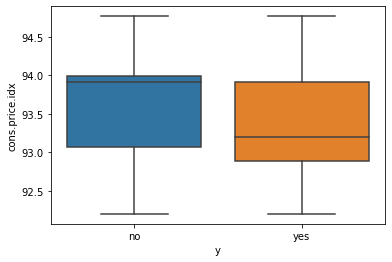

In [62]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="cons.price.idx")
plt.show()

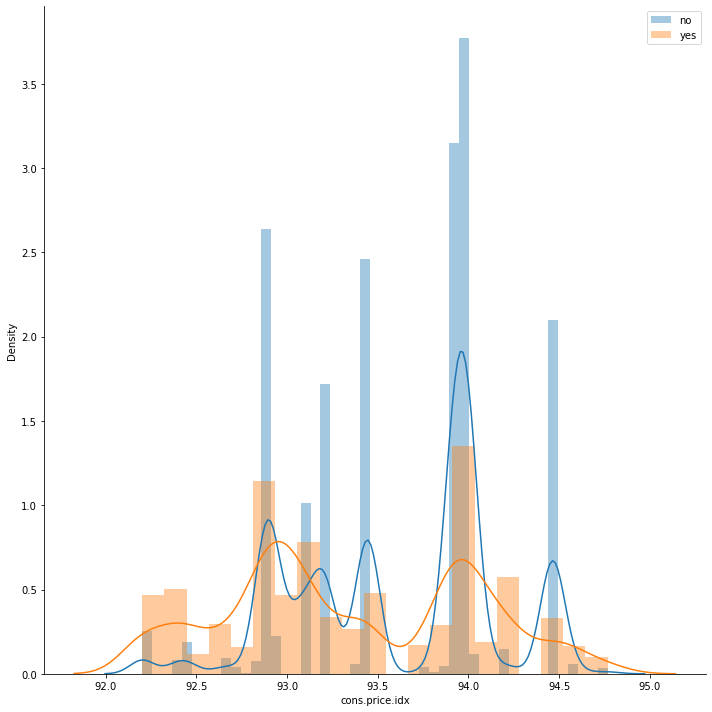

In [63]:
plotting_kd(df_bank,'cons.price.idx',hue='y')

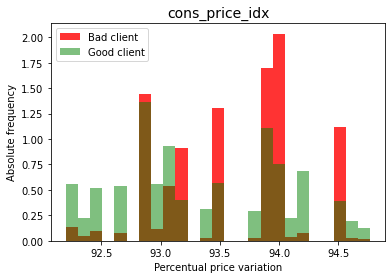

In [64]:
# Visualization of variable vs. target
cons_price_idx_0 = df_bank[df_bank.target == 0].iloc[:,16:17]
cons_price_idx_1 = df_bank[df_bank.target == 1].iloc[:,16:17]

a = np.array(cons_price_idx_0)
b = np.array(cons_price_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('cons_price_idx', fontsize=14)
plt.xlabel('Percentual price variation')
plt.ylabel('Absolute frequency');

###8. **cons.conf.idx**      

*   social and economic context attributes
*   consumer confidence index - monthly indicator 



In [65]:
# General stats description of cons.conf.idx
print (f"Key Stats of cons.conf.idx:\n",df_bankn.iloc[:,7].describe(include='all'))
print(f"the median cons.conf.idx is :", (statistics.median(df_bankn.iloc[:,7])))
print(f"the varaince of cons.conf.idx is:",(statistics.variance(df_bankn.iloc[:,7])))
print(f"the Std Var of cons.conf.idx is:",(statistics.stdev(df_bankn.iloc[:,7])))
print(f"the Skewness of cons.conf.idx is:",(scipy.stats.skew(df_bankn.iloc[:,7])))
print(f"the Kurtosis of cons.conf.idx is:",(scipy.stats.skew(df_bankn.iloc[:,7])))

Key Stats of cons.conf.idx:
 count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64
the median cons.conf.idx is : -41.8
the varaince of cons.conf.idx is: 21.42021539589864
the Std Var of cons.conf.idx is: 4.628197856174544
the Skewness of cons.conf.idx is: 0.3031688173189229
the Kurtosis of cons.conf.idx is: 0.3031688173189229


In [66]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=df_bank["cons.conf.idx"], columns=df_bank["y"])

y                no  yes
cons.conf.idx           
-50.8            70   58
-50.0           156  126
-49.5           111   93
-47.1          2016  442
-46.2          5270  524
-45.9             9    1
-42.7          6278  407
-42.0          3426  190
-41.8          4186  188
-40.8           451  264
-40.4            25   42
-40.3           135  176
-40.0            90  122
-39.8           122  107
-38.3           113  120
-37.5           153  150
-36.4          7523  240
-36.1          4904  271
-34.8           114  150
-34.6            77   97
-33.6           112   66
-33.0            84   88
-31.4           506  264
-30.1           189  168
-29.8           161  106
-26.9           267  180

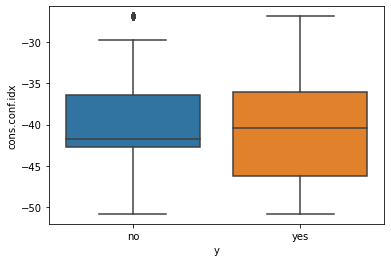

In [67]:
sns.boxplot(data=df_bank, x="y", y="cons.conf.idx")

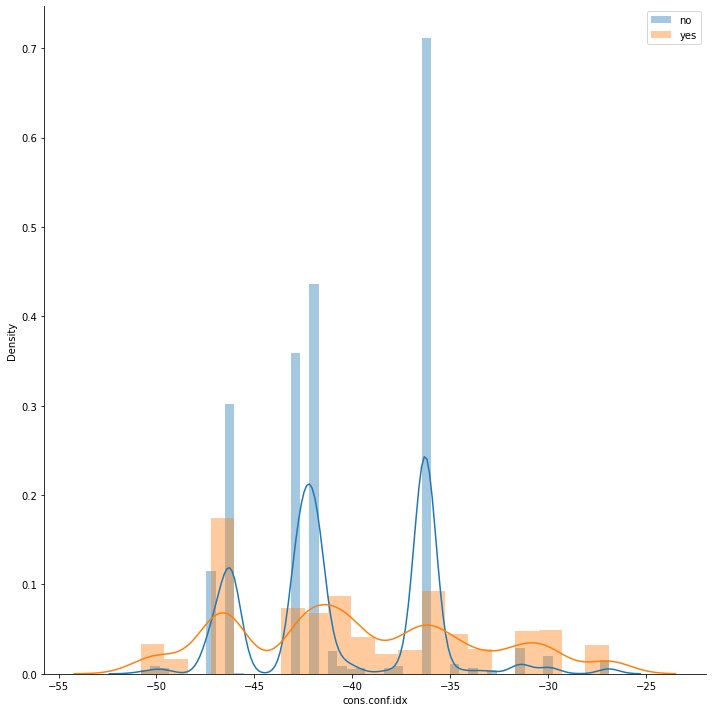

In [68]:
plotting_kd(df_bank,'cons.conf.idx',hue='y')

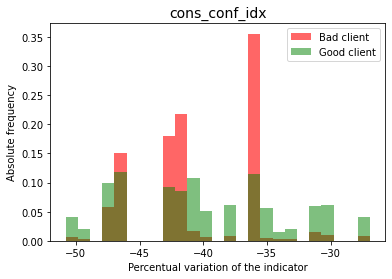

In [69]:
# Visualization of variable vs. target
cons_conf_idx_0 = df_bank[df_bank.target == 0].iloc[:,17:18]
cons_conf_idx_1 = df_bank[df_bank.target == 1].iloc[:,17:18]

a = np.array(cons_conf_idx_0)
b = np.array(cons_conf_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('cons_conf_idx', fontsize=14)
plt.xlabel('Percentual variation of the indicator')
plt.ylabel('Absolute frequency');

###9. **euribor3m**

*   social and economic context attributes
*   euribor 3 month rate - daily indicator





In [70]:
# General stats description of nr.employed
print (f"Key Stats of euribor3m:\n",df_bankn.iloc[:,8].describe(include='all'))
print(f"the median euribor3m is :", (statistics.median(df_bankn.iloc[:,8])))
print(f"the varaince of euribor3m is:",(statistics.variance(df_bankn.iloc[:,8])))
print(f"the Std Var of euribor3m is:",(statistics.stdev(df_bankn.iloc[:,8])))
print(f"the Skewness of euribor3m is:",(scipy.stats.skew(df_bankn.iloc[:,8])))
print(f"the Kurtosis of euribor3m is:",(scipy.stats.skew(df_bankn.iloc[:,8])))

Key Stats of euribor3m:
 count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
the median euribor3m is : 4.857
the varaince of euribor3m is: 3.0083078001952943
the Std Var of euribor3m is: 1.7344474048512668
the Skewness of euribor3m is: -0.7091621286441162
the Kurtosis of euribor3m is: -0.7091621286441162


In [71]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=df_bank["euribor3m"], columns=df_bank["y"])

y           no  yes
euribor3m          
0.634        2    6
0.635       21   22
0.636       11    3
0.637        1    5
0.638        2    5
...        ...  ...
4.967      610   33
4.968      935   57
4.970      168    4
5.000        4    3
5.045        4    5

[316 rows x 2 columns]

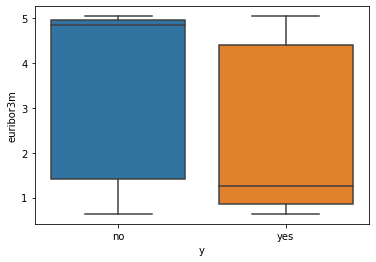

In [72]:
sns.boxplot(data=df_bank, x="y", y="euribor3m")

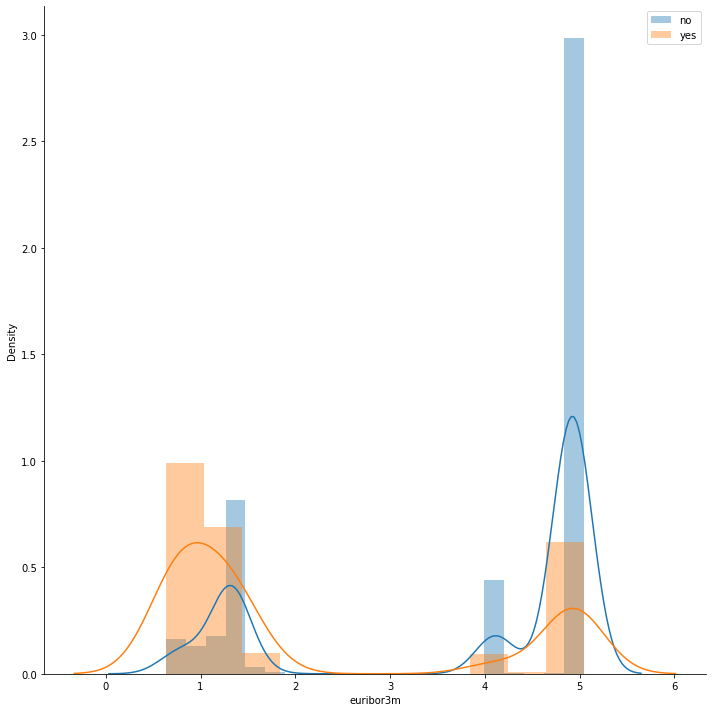

In [73]:
plotting_kd(df_bank,'euribor3m',hue='y')

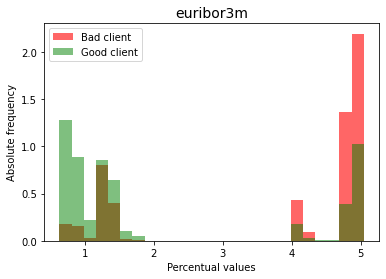

In [74]:
# Visualization of variable vs. target
euribor3m_0 = df_bank[df_bank.target == 0].iloc[:,18:19]
euribor3m_1 = df_bank[df_bank.target == 1].iloc[:,18:19]

a = np.array(euribor3m_0)
b = np.array(euribor3m_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('euribor3m', fontsize=14)
plt.xlabel('Percentual values')
plt.ylabel('Absolute frequency');

###10. **nr.employed** 

*   social and economic context attributes
*   number of employees - quarterly indicator

In [75]:
print (f"Key Stats:\n",df_bankn.iloc[:,9].describe(include='all'))
print(f"the median nr.employed is :", (statistics.median(df_bankn.iloc[:,9])))
print(f"the varaince of nr.employed is:",(statistics.variance(df_bankn.iloc[:,9])))
print(f"the Std Var of nr.employed is:",(statistics.stdev(df_bankn.iloc[:,9])))
print(f"the Skewness of nr.employed is:",(scipy.stats.skew(df_bankn.iloc[:,9])))
print(f"the Kurtosis of nr.employed is:",(scipy.stats.skew(df_bankn.iloc[:,9])))


Key Stats:
 count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64
the median nr.employed is : 5191.0
the varaince of nr.employed is: 5220.283250397494
the Std Var of nr.employed is: 72.25152766826106
the Skewness of nr.employed is: -1.0442243763652297
the Kurtosis of nr.employed is: -1.0442243763652297


In [76]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=df_bank["nr.employed"], columns=df_bank["y"])

y               no   yes
nr.employed             
4963.6         334   301
4991.6         370   403
5008.7         281   369
5017.5         617   454
5023.5          84    88
5076.2        1069   594
5099.1        7442  1092
5176.3           9     1
5191.0        7523   240
5195.8        3451   232
5228.1       15368   866

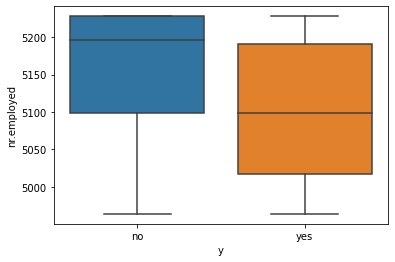

In [77]:
sns.boxplot(data=df_bank, x="y", y="nr.employed")
     

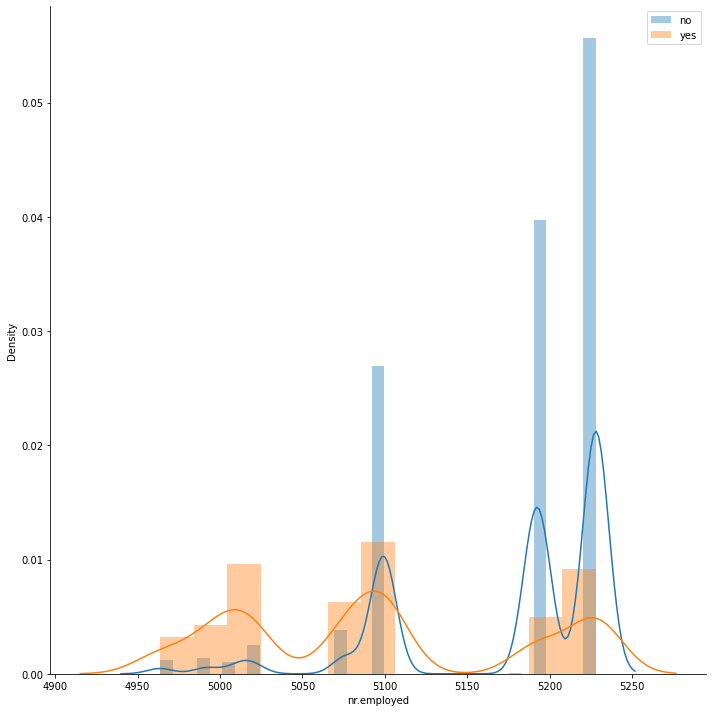

In [78]:
plotting_kd(df_bank,'nr.employed',hue='y')

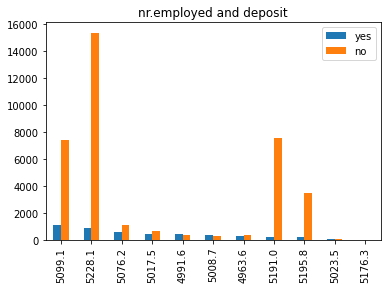

In [79]:
#Visualization of relationship between feature category vs dependent variable y
#nr.employed and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = df_bank[df_bank['y'] == 'yes']['nr.employed'].value_counts()
j_bank['no'] = df_bank[df_bank['y'] == 'no']['nr.employed'].value_counts()

j_bank.plot.bar(title = 'nr.employed and deposit')

From this plot nr.employed would also be very much helpful in predicting class labels.

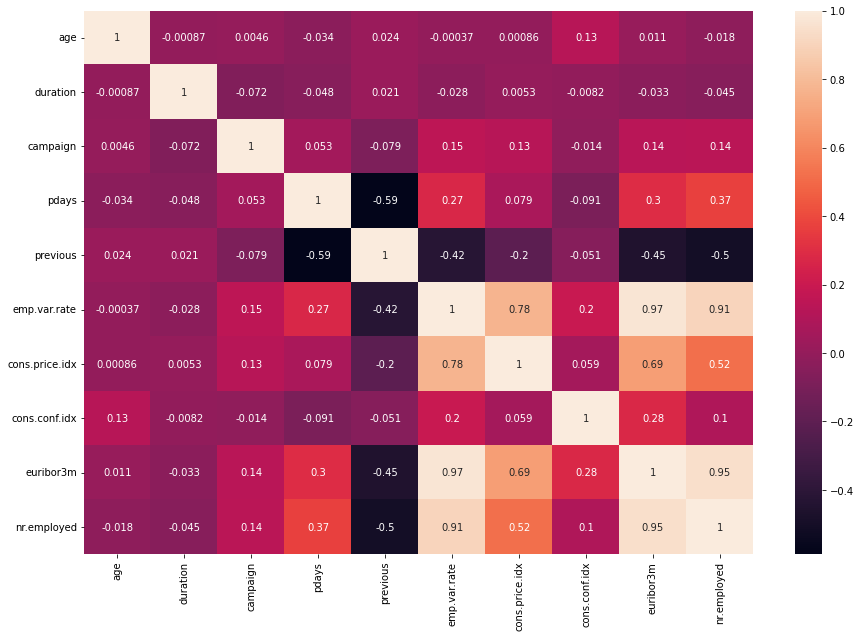

In [80]:
def plotting_heatmap(df_bank):
    correlation=df_bankn.corr()
    figure(figsize=(15,10))
        
        
    sns.heatmap(correlation, annot=True)
    
plotting_heatmap(df_bank)

**The emp.var.rate, euribor3m, nr.employed and cons.price.index have very high correlation. Euribor3m with nr.employed and emp.var.rate with nr.employed with the highest correlation with more than 0.9 value.**

#**Categorical Varaiable**

In [81]:
df_label = df_bank.select_dtypes(include = np.object)
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [82]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df_bank[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [83]:
%matplotlib inline

def countplot_withY(label, dataset ):
  plt.figure(figsize=(20,10))
  Y = df_bank[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bank, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [84]:
#def countplot(label, dataset):
#  plt.figure(figsize=(15,10))
#  Y = df_bank[label]
#  total = len(Y)*1.
#  ax=sns.countplot(x=label, data=df_bank)
#  for p in ax.patches:
#    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
#  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
#  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
#  plt.show()

###Check number of unique values for each feature

In [85]:
df_label.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

### What are the most common categories?

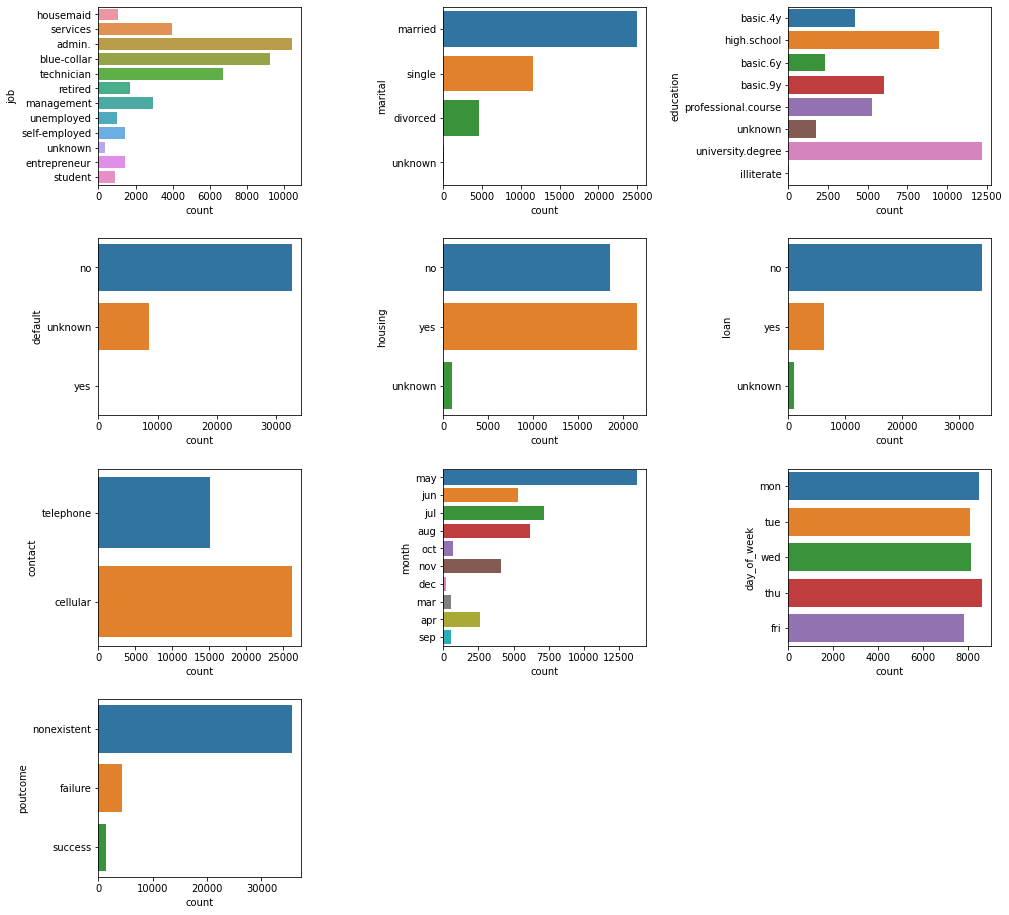

In [86]:
categorical_vars = df_bank.describe(include=["object"]).columns
# Count plots of categorical variables

fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df_bank, ax=ax)

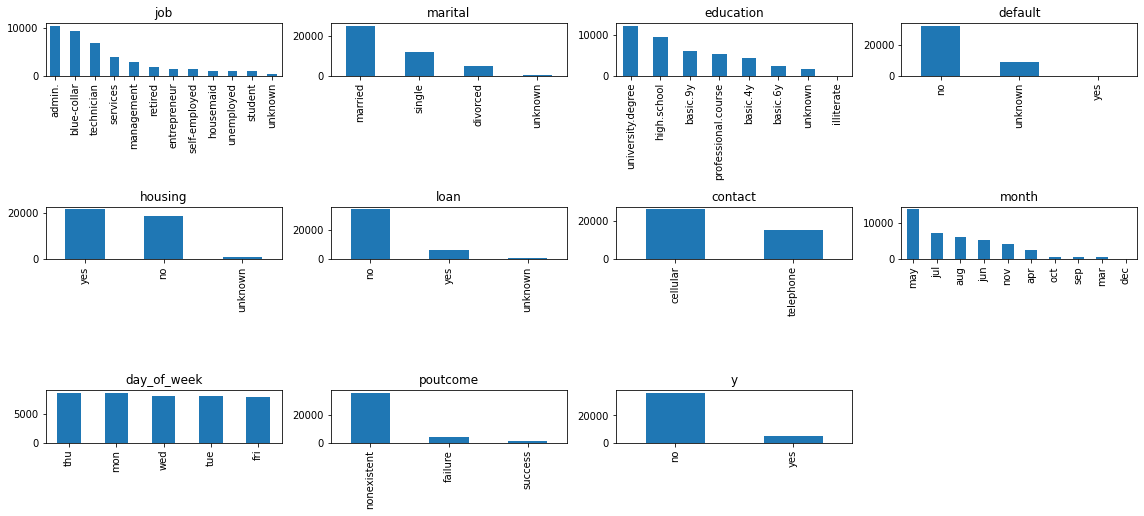

In [87]:
n = len(cat_features)
i=1
plt.figure(figsize=(16,14))

for feature in df_bank[cat_features]:
    plt.subplot(round(n/2),round(n/3), i)
    df_bank[feature].value_counts().plot.bar()
    plt.xticks(rotation=90)
    plt.title(feature)
    i+=1

plt.tight_layout();


Most common:

* job: administrative
* marital state: married
* education: university degree
* credit in defaut: no
* housing: yes, however does not have house is very close
* loan: no
* poutcome: did not participate in previous campaign

Notice that all the feature includes that category 'unknown' except for the * 'poutcome' variable.

### How these categories influence the target variable?

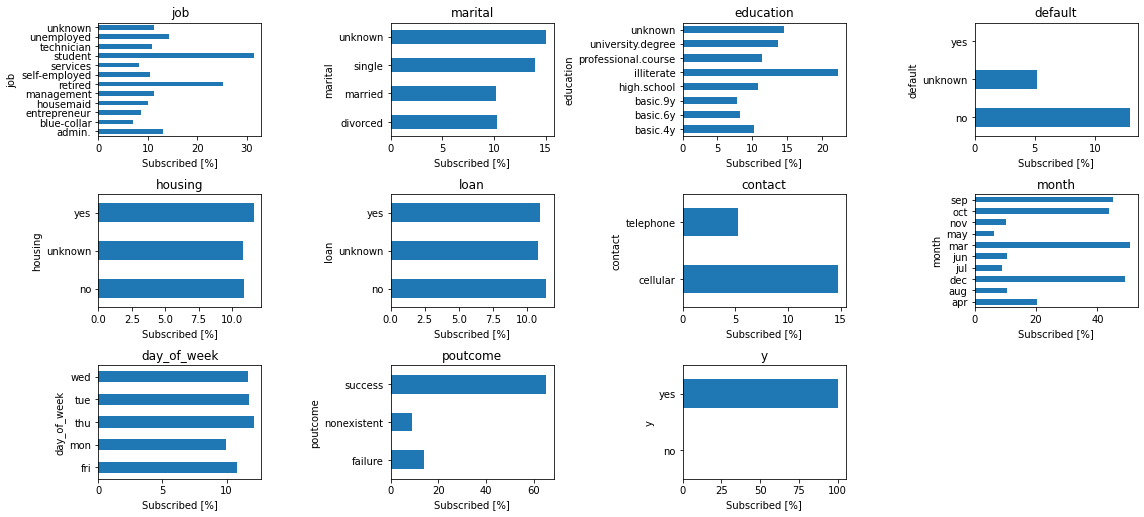

In [88]:
# How these categories influence the target variable?

n = len(cat_features)
i=1
plt.figure(figsize=(16,14))

for feature in df_bank[cat_features]:
    plt.subplot(round(n/2),round(n/3), i)
    df_bank.groupby([feature])['target'].mean().multiply(100).plot.barh()
    plt.xlabel('Subscribed [%]')
    plt.title(feature)
    i+=1

plt.tight_layout()
plt.show()

###  **JOB**

*    Personal Attributes
*    type of job 

In [89]:
print(f"List of unique values: {df_bank.job.unique()}")

List of unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [90]:
#Count of Job,
for x in ["job"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

                 job
admin.         10422
blue-collar     9254
entrepreneur    1456
housemaid       1060
management      2924
retired         1720
self-employed   1421
services        3969
student          875
technician      6743
unemployed      1014
unknown          330


In [91]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=df_bank["job"], columns=df_bank["y"])

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37

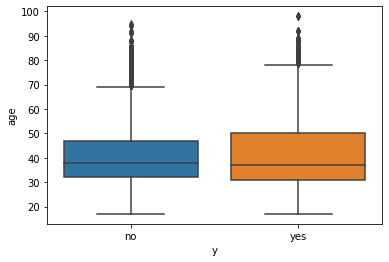

In [92]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="age")
plt.show()

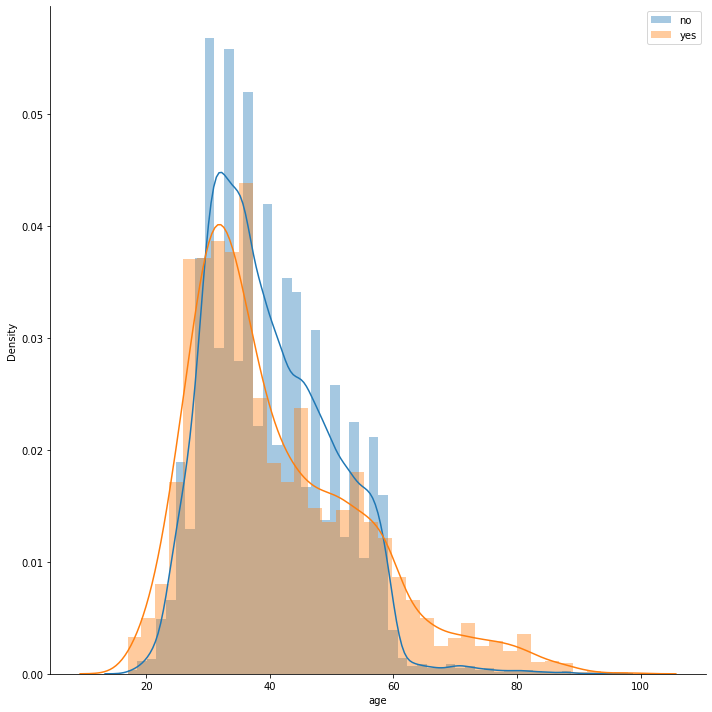

In [93]:
plotting_kd(df_bank,'age',hue='y')

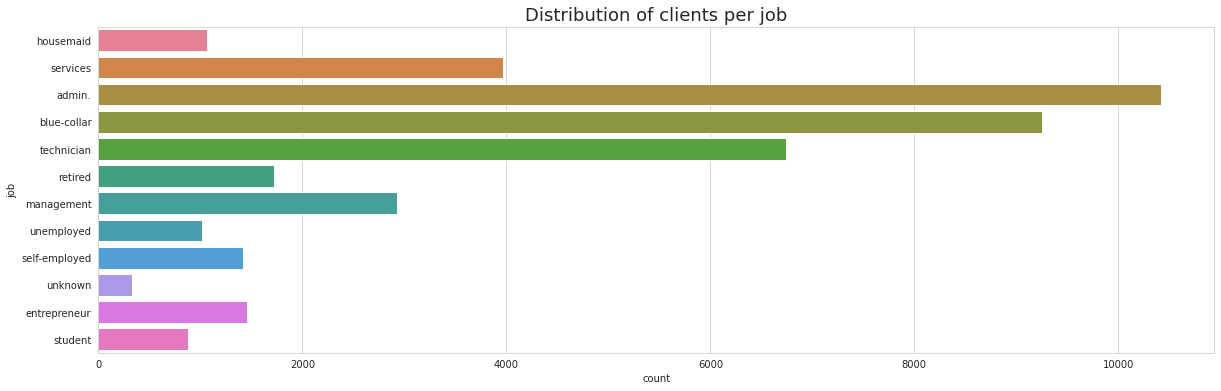

In [94]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(20, 6))
plt.title("Distribution of clients per job", fontsize=18)
sns.countplot(y="job", data=df_bank, palette='husl')
#countplot_withY("job", df_bank);

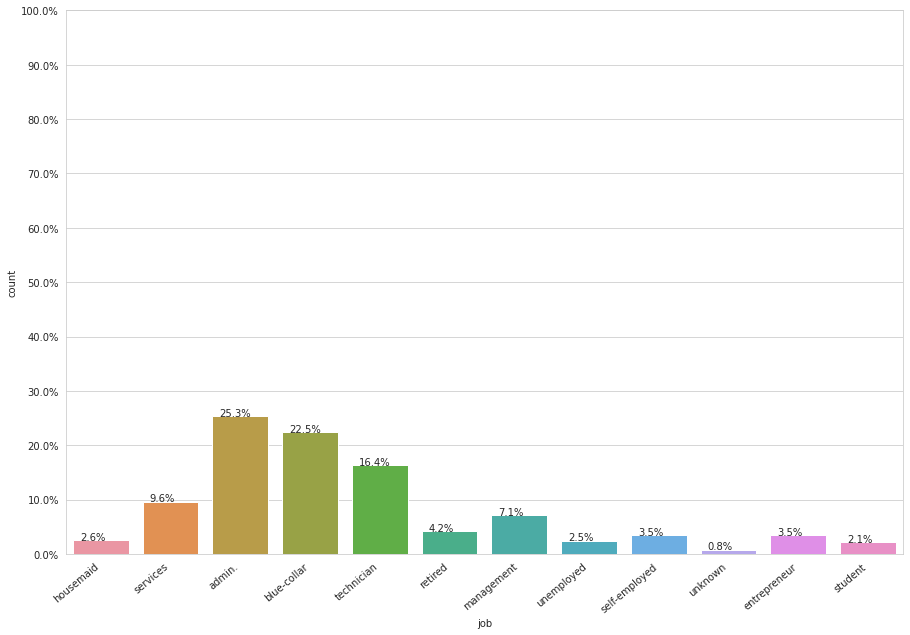

In [95]:
countplot("job", df_bank)

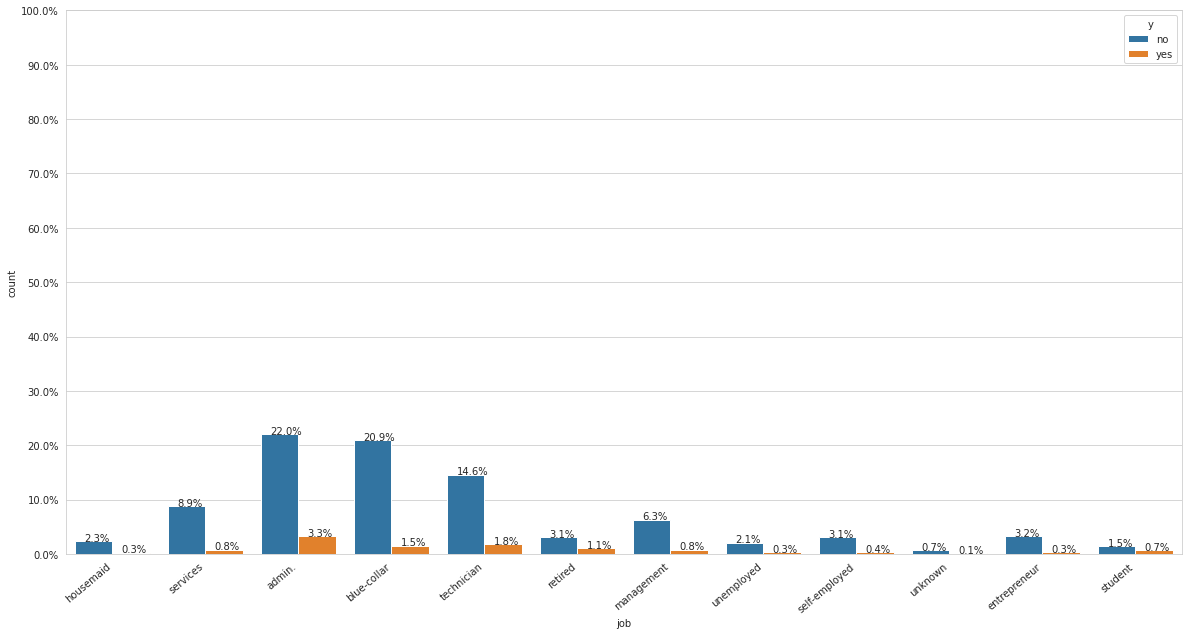

In [96]:
#countplot("job", df_bank)
countplot_withY("job",  df_bank)

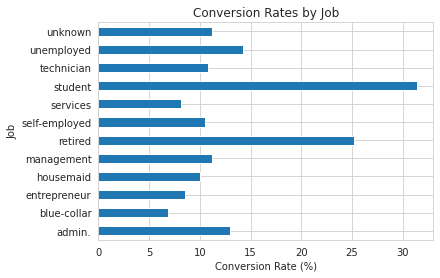

In [97]:
# How about conversion rate by job?
conversion_rate_by_job = df_bankc.groupby(by='job')['converted'].sum() / df_bankc.groupby(by='job')['converted'].count() * 100.0
ax = conversion_rate_by_job.plot(kind='barh', grid=True, title='Conversion Rates by Job')

ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')

plt.show()

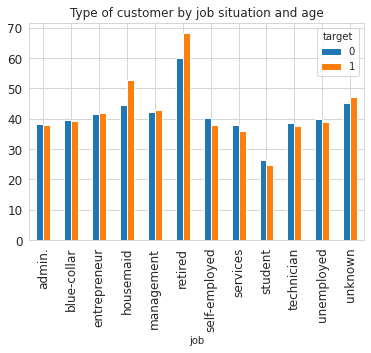

In [98]:
# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df_bank.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["job"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by job situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.

### **Marital**

*   Personal Attributes
*    marital status 



In [99]:
#Count of Marital
for x in ["marital"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

          marital
divorced     4612
married     24928
single      11568
unknown        80


In [100]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["marital"], columns=df_bank["y"])

y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12

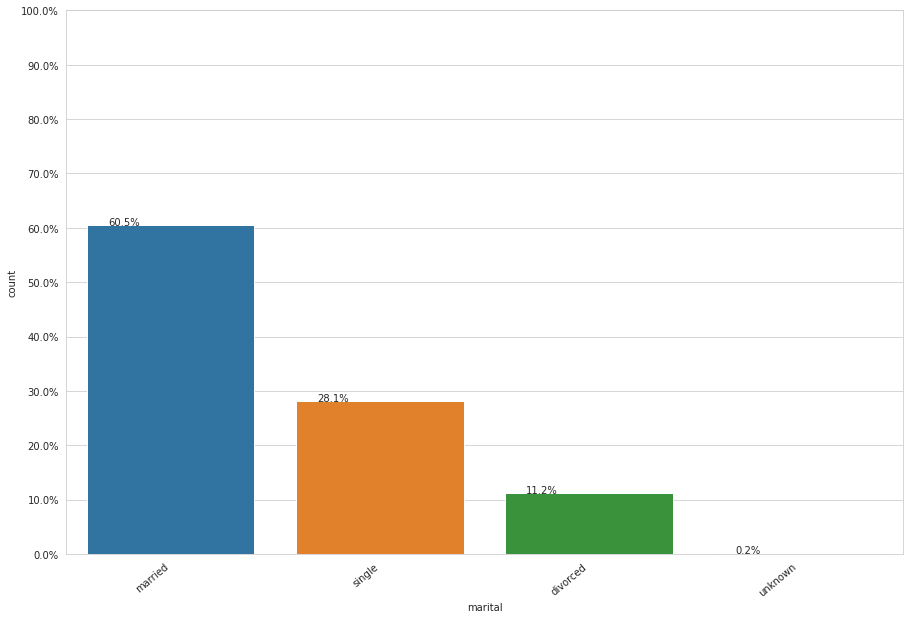

In [101]:
countplot("marital", df_bank)

From the above plot customer who has been contacted most are married. About 0.2% of marital status of customer is unknown.

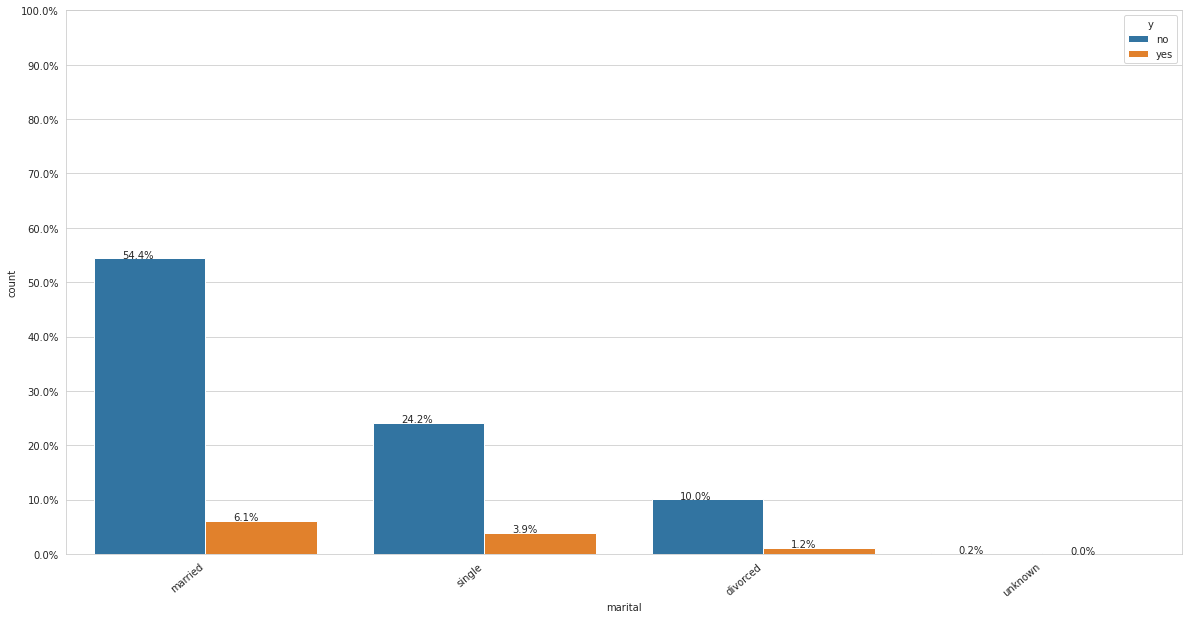

In [102]:
countplot_withY("marital",  df_bank)

From the above plot we can see that married people has subscribed to long term deposits more than any other. People whose status is unknown has not subscribed to the long term deposits at all

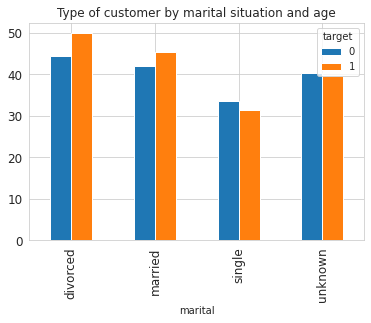

In [103]:
# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df_bank.pivot_table(
    columns="target",
    index="marital",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["marital"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by marital situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

### **Education**

*   Personal Attributes
*   level of education



In [104]:
#Count of Default
for x in ["education"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

                     education
basic.4y                  4176
basic.6y                  2292
basic.9y                  6045
high.school               9515
illiterate                  18
professional.course       5243
university.degree        12168
unknown                   1731


In [105]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["education"], columns=df_bank["y"])

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251

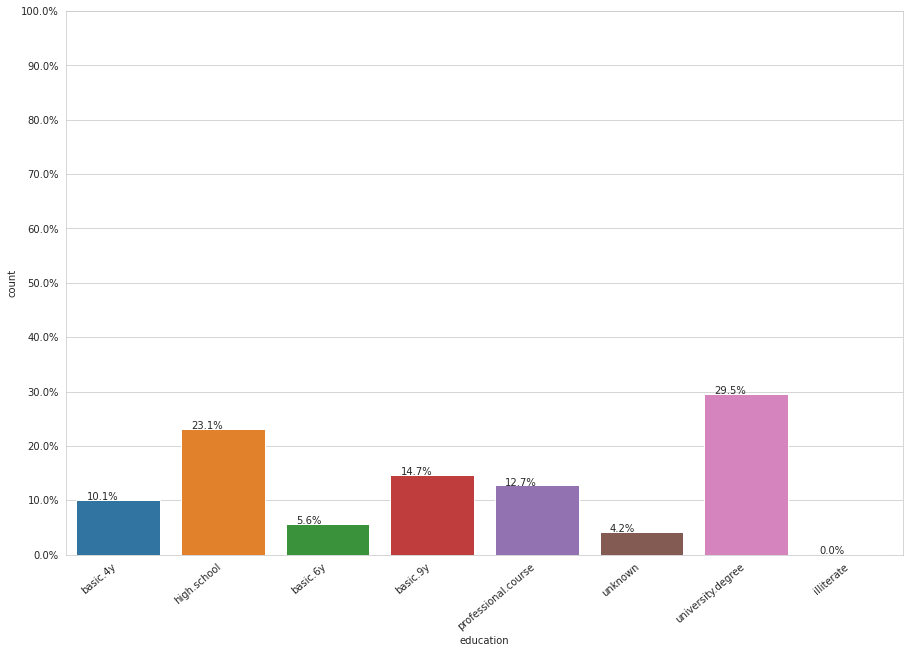

In [106]:
countplot("education", df_bank)

Customers who has been contacted are mostly completed university degree then followed by high school.They have not contacted to any person who are illiterate.

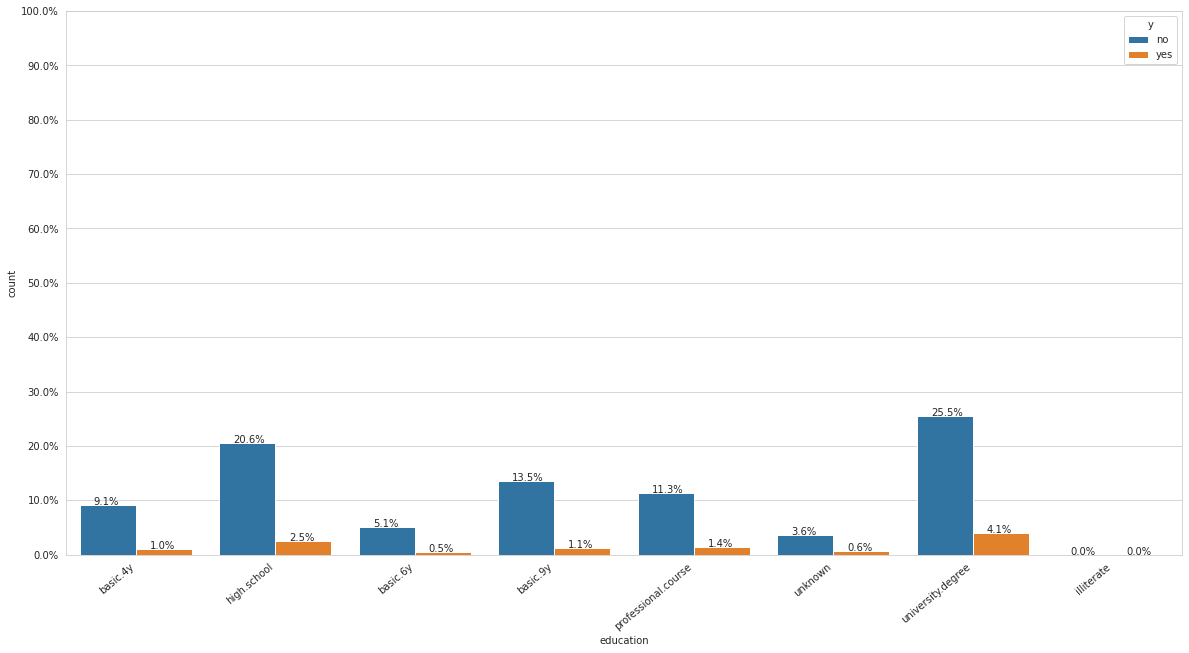

In [107]:
countplot_withY("education",  df_bank)

People with education qualifications, univeristy has subscribed more for long term deposits, followed by high school, basic 9Y and professional course

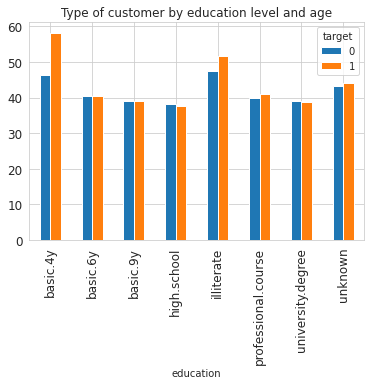

In [108]:
# Graph: Type of customer by education level and age
# Pivot_table
type_pivot = df_bank.pivot_table(
    columns="target",
    index="education",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["education"], 
                       ascending=True).plot(kind="bar",
                                             title=("Type of customer by education level and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

### **Default**

*    Personal Attributes
*   has credit in default?

In [109]:
#Count of Default
for x in ["default"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

         default
no         32588
unknown     8597
yes            3


In [110]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["default"], columns=df_bank["y"])

y           no   yes
default             
no       28391  4197
unknown   8154   443
yes          3     0

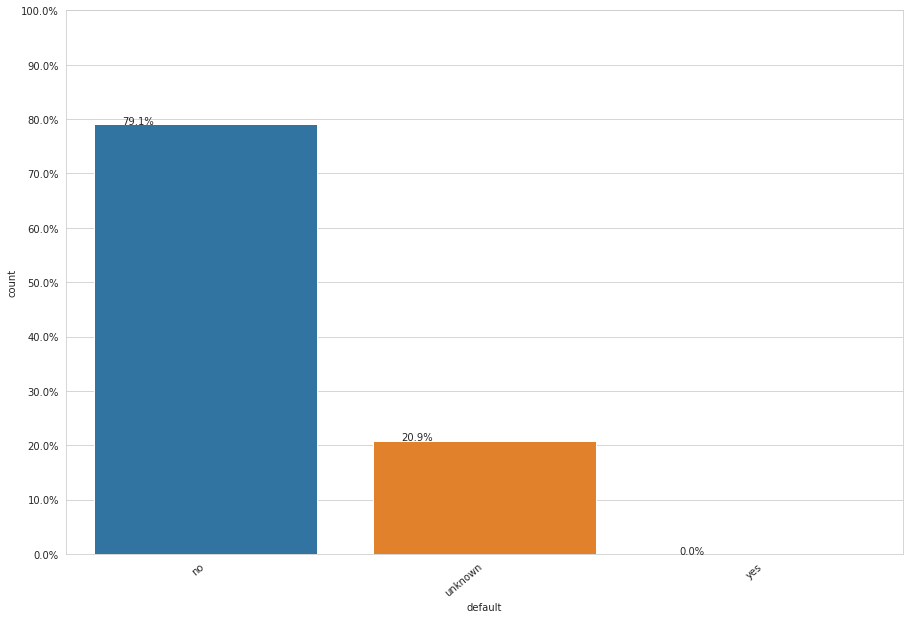

In [111]:
countplot("default", df_bank)

From the above plot we can see that bank has contacted to the person more who has no status in default and there no person whose default status is yes. Very few of them are there whose status is unknown.

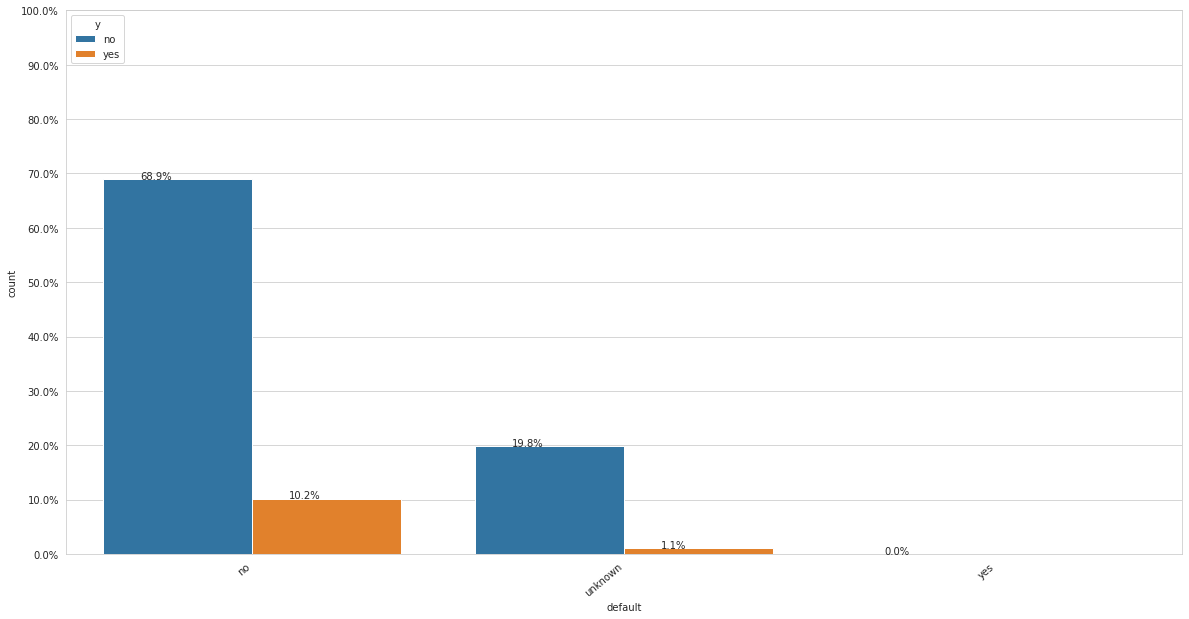

In [112]:
countplot_withY("default",  df_bank)

From the above plot we can observe that people who has no defult has subscribed to the long term deposits. They are most one's who has not subscribed for the deposits as well.

###    **Housing**

*    Personal Attributes
*    has housing loan? 



In [113]:
#Count of Default
for x in ["housing"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

         housing
no         18622
unknown      990
yes        21576


In [114]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["housing"], columns=df_bank["y"])

y           no   yes
housing             
no       16596  2026
unknown    883   107
yes      19069  2507

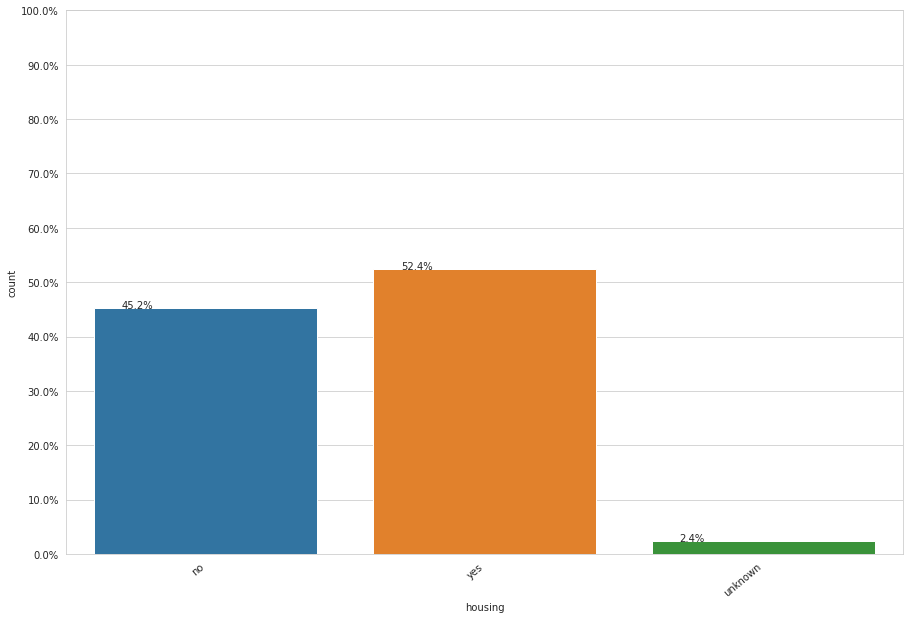

In [115]:
countplot("housing", df_bank)

People who have housing loan has been contacted more by the bank. People who has no housing has also been contacted pretty much. People who has status unknown has been least contacted.

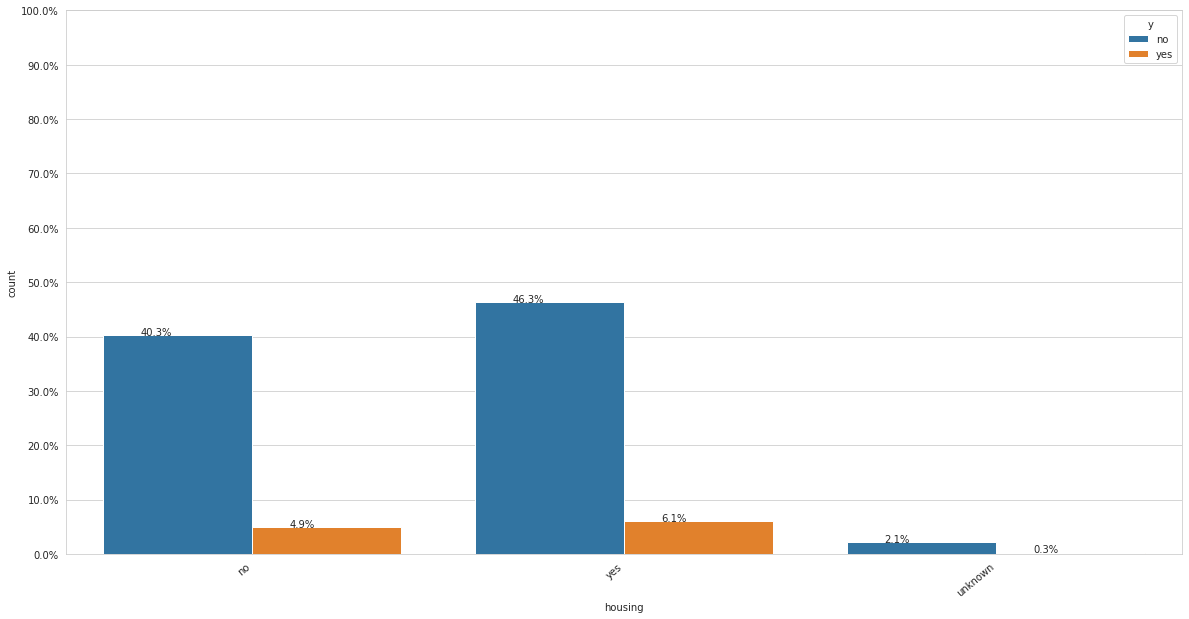

In [116]:
countplot_withY("housing",  df_bank)

People who has housing loan has subscribed more for long term deposits followed by who does not have.

###   **Loan**

*   Personal Attributes
*    has personal loan? 



In [117]:
#Count of Default
for x in ["loan"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

          loan
no       33950
unknown    990
yes       6248


In [118]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["loan"], columns=df_bank["y"])

y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683

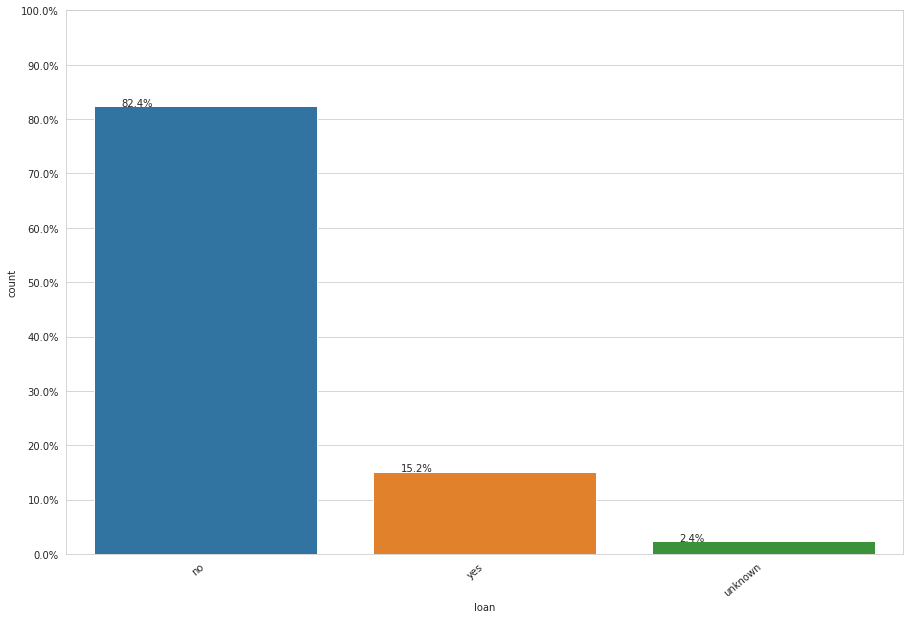

In [119]:
countplot("loan", df_bank)

People who doesnot have loan has been more contacted for longer term deposits than who does have

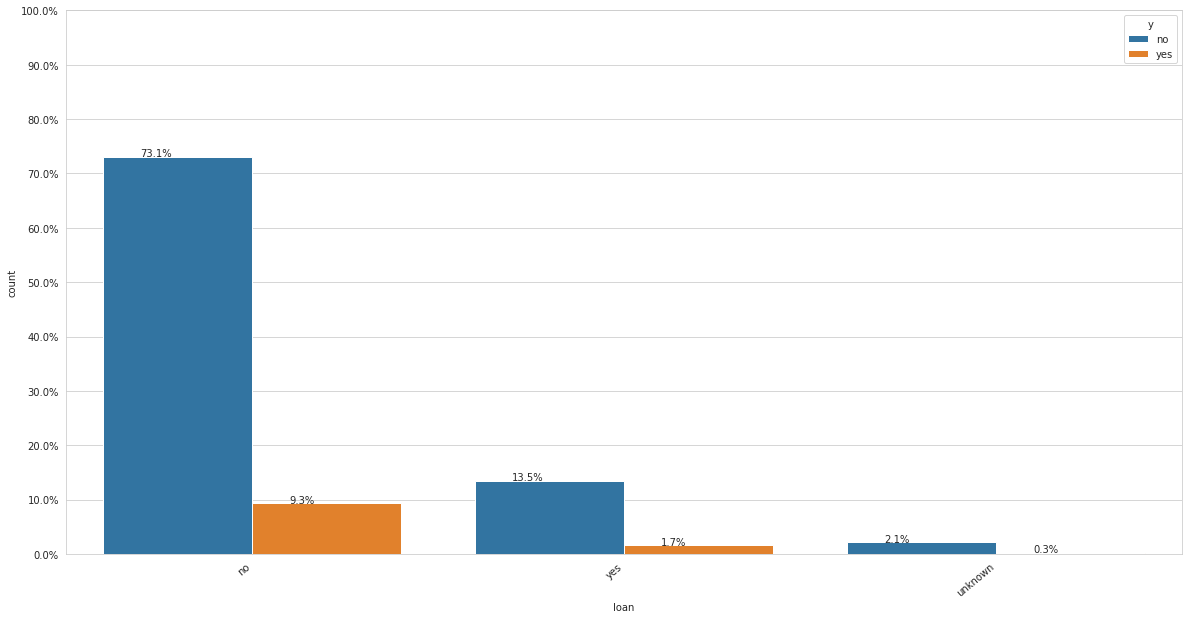

In [120]:
countplot_withY("loan",  df_bank)

People with no personal loan has subscribed more for long term deposits. They are also the ones who has not subscribed for long term deposits

###   **Contact**

*   related with the last contact of the current campaign:
*   contact communication type 



In [121]:
#Count of Default
for x in ["contact"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

           contact
cellular     26144
telephone    15044


In [122]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["contact"], columns=df_bank["y"])

y             no   yes
contact               
cellular   22291  3853
telephone  14257   787

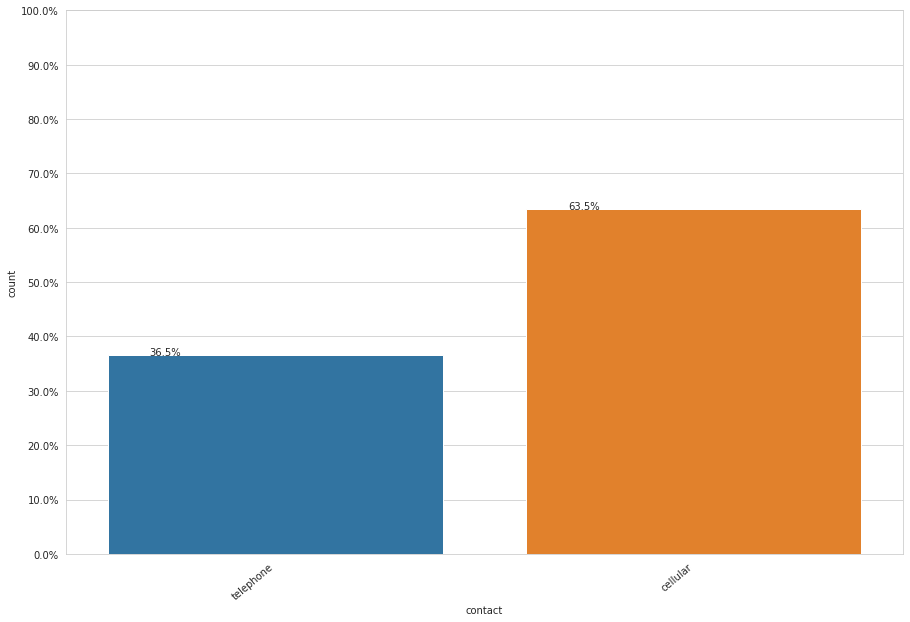

In [123]:
countplot("contact", df_bank)

People with contact type cellular has been contacted more than with telephone for long term deposits.

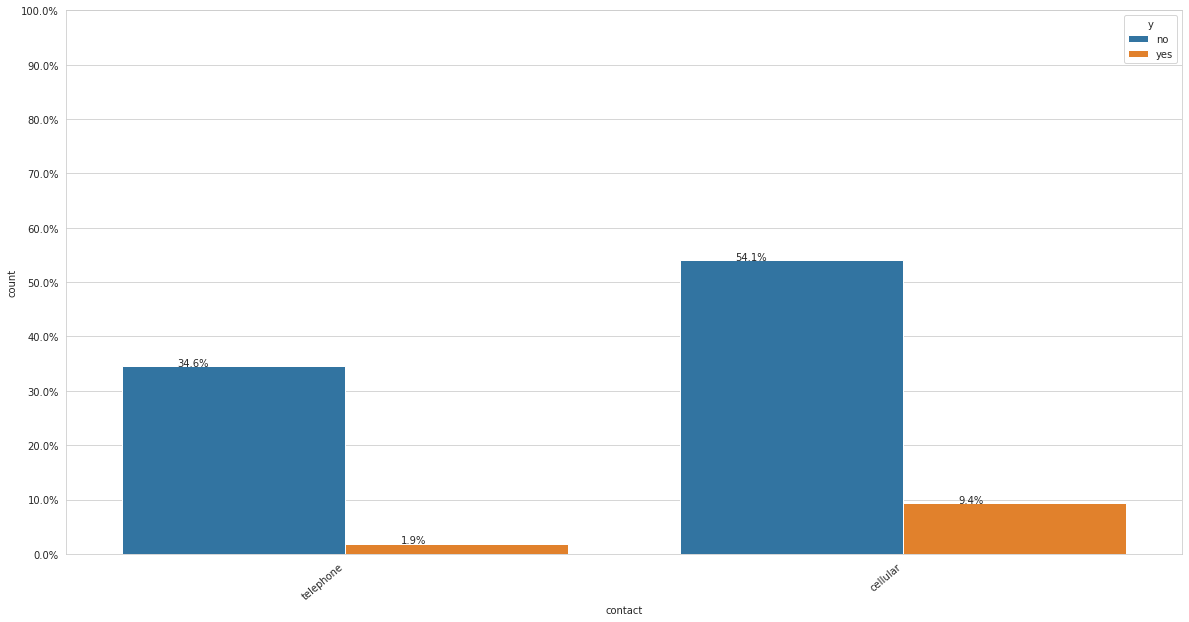

In [124]:
countplot_withY("contact",  df_bank)

from the above it appear that Cellular is the preferred contact type and higher percentage of subscriber. People with contact type cellular has subscribed more for long term deposits than telephone

### **Month**

*   related with the last contact of the current campaign:
*   last contact month of year 



In [125]:
#Count of Default
for x in ["month"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

     month
apr   2632
aug   6178
dec    182
jul   7174
jun   5318
mar    546
may  13769
nov   4101
oct    718
sep    570


In [126]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["month"], columns=df_bank["y"])

y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256

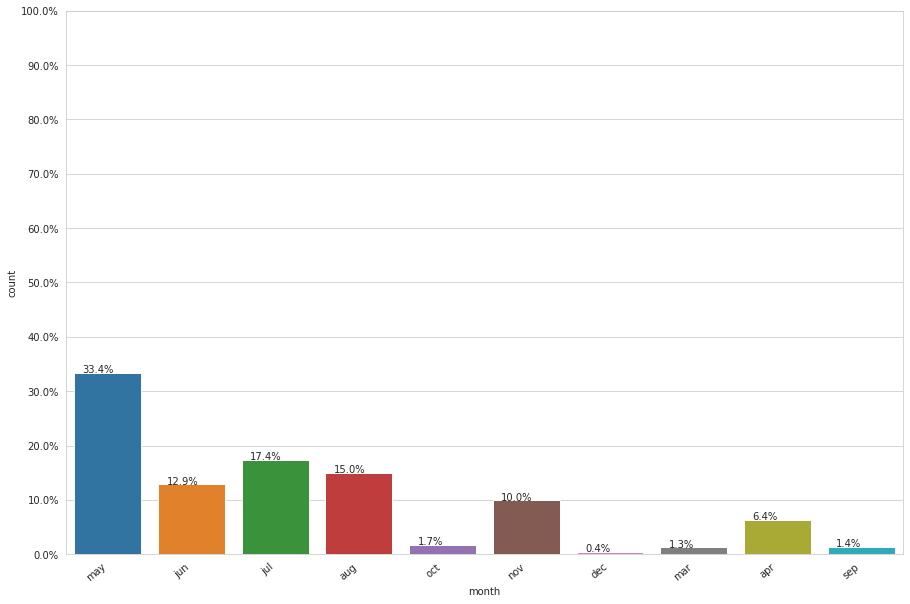

In [127]:
countplot("month", df_bank)

People are contacted more in the month of May than anyother months. It is followed by July,August, June

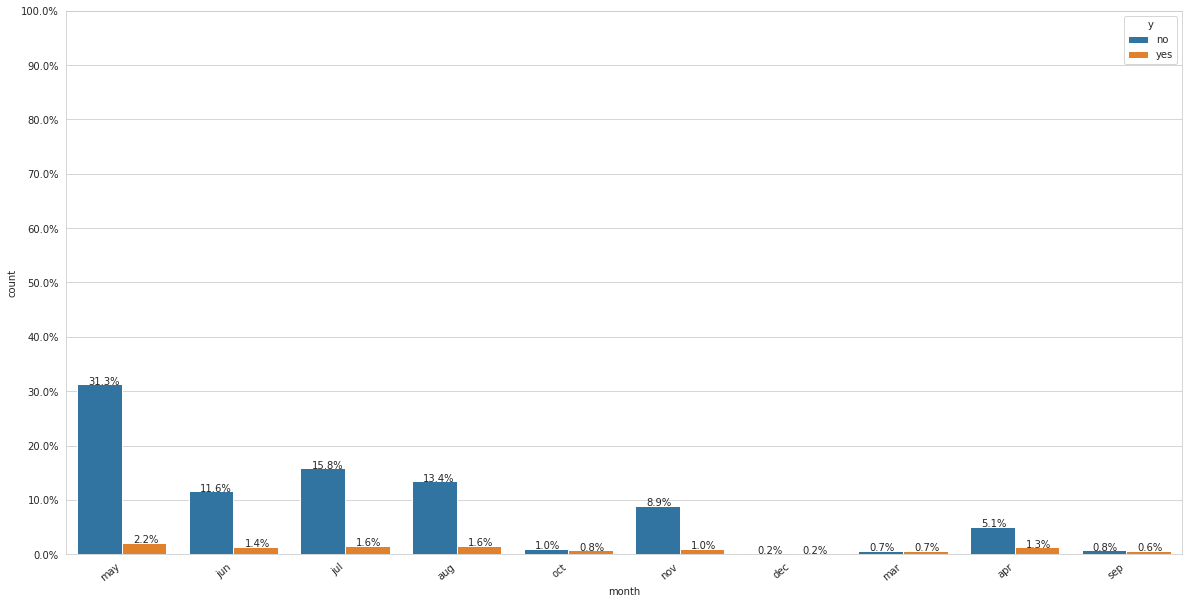

In [128]:
#countplot("marital", df_bank)
countplot_withY("month",  df_bank)

It is very interesting from the above query that people are not contacted in the month of January, Februrary. 

We can also see a pattern or some form of seasonality from Sep till Mar very few contacts are made, but more from Apr till Aug 

People who have contacted in May have higher chances to subscribe for longer term deposits but have also higher chances for not subscribing the long term deposits. Very few people are contacted in the month of December,March,September and October and have almost equal chances for subscribing the deposits or not.

From the above it appear most contact were made in the month of May

### **Days of the Week**

*   related with the last contact of the current campaign:
*   last contact day of the week 



In [129]:
#Count of Default
for x in ["day_of_week"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

     day_of_week
fri         7827
mon         8514
thu         8623
tue         8090
wed         8134


In [130]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["day_of_week"], columns=df_bank["y"])

y              no   yes
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949

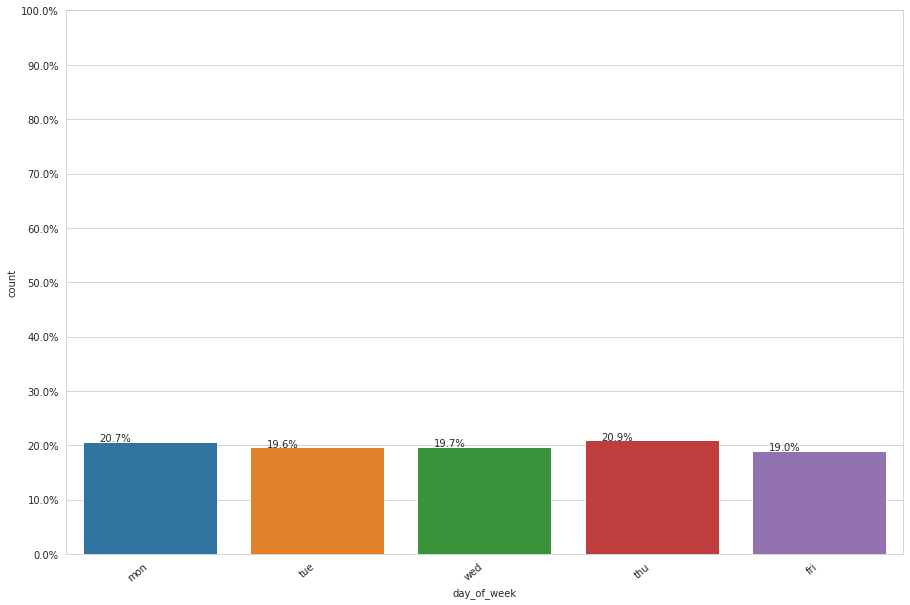

In [131]:
countplot("day_of_week", df_bank)

From the above plot we can see that people are contacted from Monday to Friday but not on Saturday and Sunday. In all the day people are contacted with the same percentage.

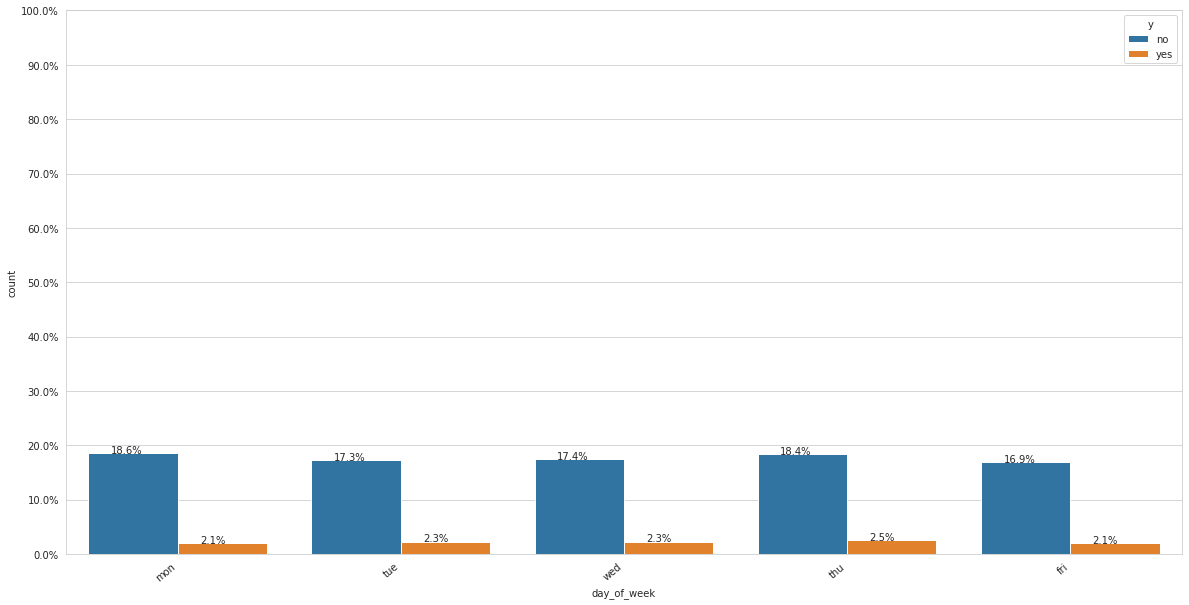

In [132]:
countplot_withY("day_of_week",  df_bank)

In all the days they have equal chances for subscribing and not subscribing the term deposits. Day_of_week maynot be very helpful in predciting whether the customer will subscribe for long term deposits or not.

### **poutcome**

*   other campaign attributes:
*   outcome of the previous marketing campaign 



In [133]:
df_bank["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [134]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["poutcome"], columns=df_bank["y"])

y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894

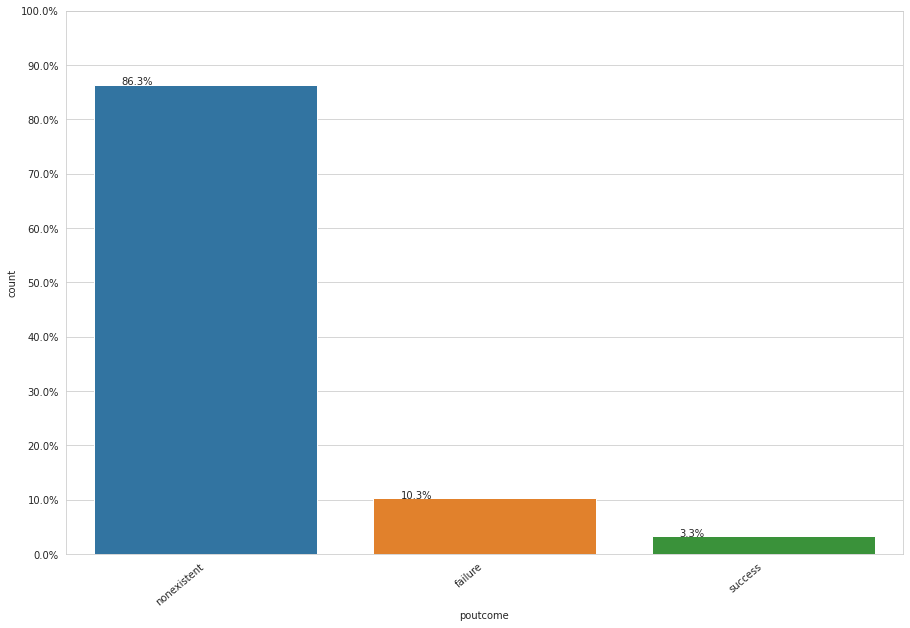

In [135]:
countplot("poutcome", df_bank)

From this plot it is evident that majority of outcome of previous campaigns are non existent. Very few people from previous marketing campaign has subscribed for long term deposits. This make sense as term deposit are long term investment and bank existing customer will not frequently make  such deposit or respond to campaign each time. 

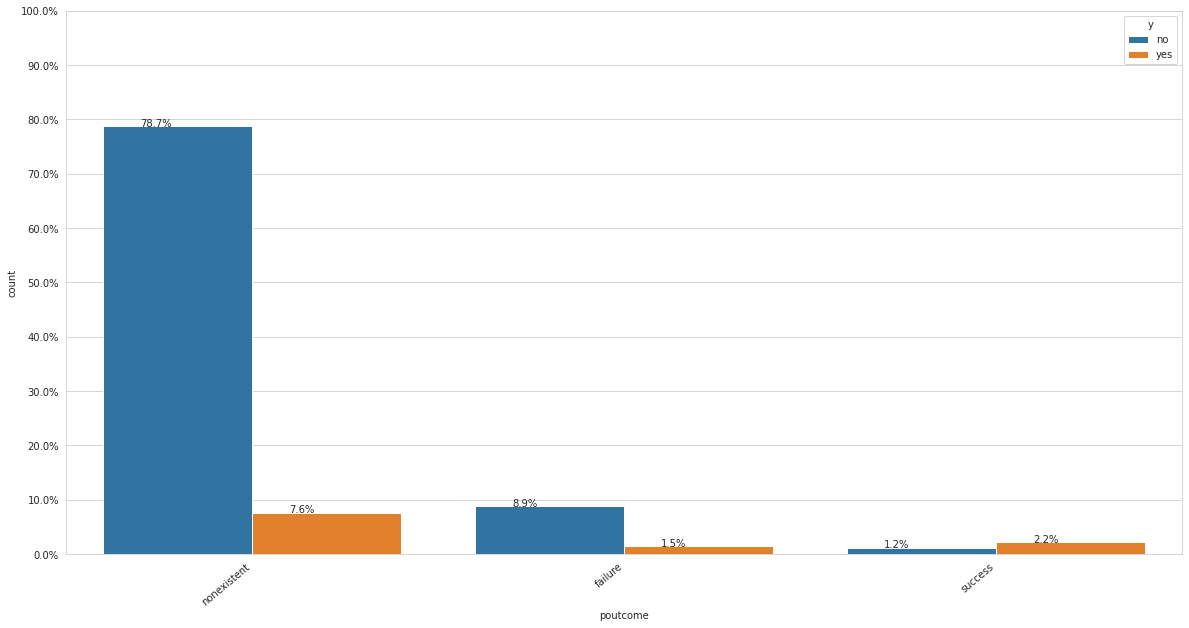

In [136]:
#countplot("marital", df_bank)
countplot_withY("poutcome",  df_bank)

From the above plot, whose previous outcome is non-existent has actually subscribed more than any other people belonging to previous outcome. It is also clear that people belonging to success category of previous outcome has turned down for longer deposits. But if ratio is considered,people with previous outcome as success has subscribed to long term deposits from the current marketing strategy more than people with previous outcome as success who turned down the long term deposits from the current marketing strategy

Text(0.5, 1.05, 'Pearson correlation of Features')

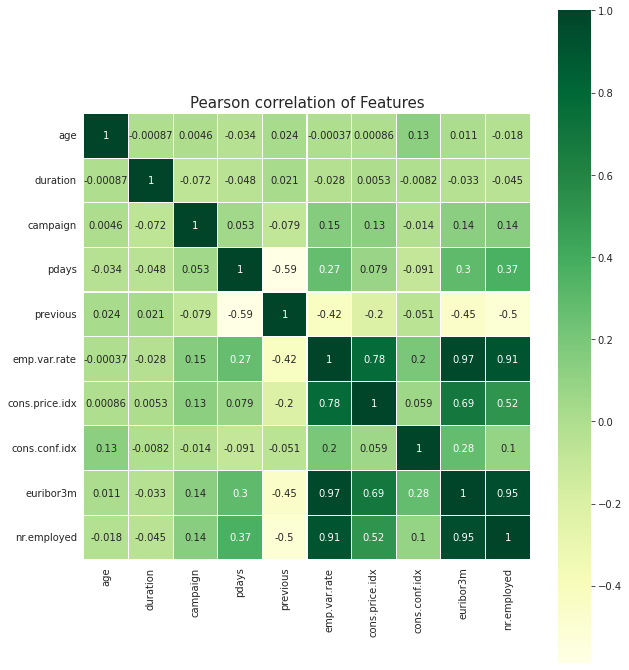

In [137]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = df_bankn.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

#Observations:

1. 'Student' and 'retired' have the highest percentage of subscriptions (>25%) whereas 'bue-collar' and 'services' have the lowest.
2. 'Iliterate' people have the highest percentage of subscriptions (>20%), on the other hand 'basic 9y', 'basic 6y' and 'basic 4y' have the lowest.
3. People with credit in default did not subscribed.
4. More than 60% of the people previously contacted to other campaigns subscribed.
5. Marital state, existance of loans and housing does not influence much the subscription rate.

#**Correlation with Class variable 'y'**
One Hot Encodig on Pre-processed data



In [138]:
df_bank_hot = pd.read_csv(file_name, sep=';')

In [139]:
df_bank_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [140]:
# replacing yes and no from y column by 1 and 0 to convert categorical feature to numerical feature
df_bank_hot['y'].replace(to_replace='yes', value=1, inplace=True)
df_bank_hot['y'].replace(to_replace='no',  value=0, inplace=True)
df_bank_hot['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [141]:
# Categorical boolean mask
categorical_feature_mask = df_bank_hot.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df_bank_hot.columns[categorical_feature_mask].tolist()

In [142]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [143]:


from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df_bank_hot, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    
    df_bank_hot[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df_bank_hot

def OneHotEncoder(categorical_cols, df_bank_hot, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(df_bank_hot[i])
    df_bank_hot = add_onehot_to_dataframe(temp_cols, df_bank_hot, Vectorizer, i)

    
   

In [144]:
OneHotEncoder(categorical_cols, df_bank_hot, True)

# Drop the categorical features as the one hot encoded representation is present
df_bank_hot = df_bank_hot.drop(categorical_cols, axis=1)
print("Shape of train: ", df_bank_hot.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (41188, 64)


In [145]:
df_bank_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  int64  
 12  job_blue-collar                41188 non-null 

In [146]:
CorrBank=df_bank_hot.drop("y", axis=1).apply(lambda x: x.corr(df_bank_hot.y))

In [147]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

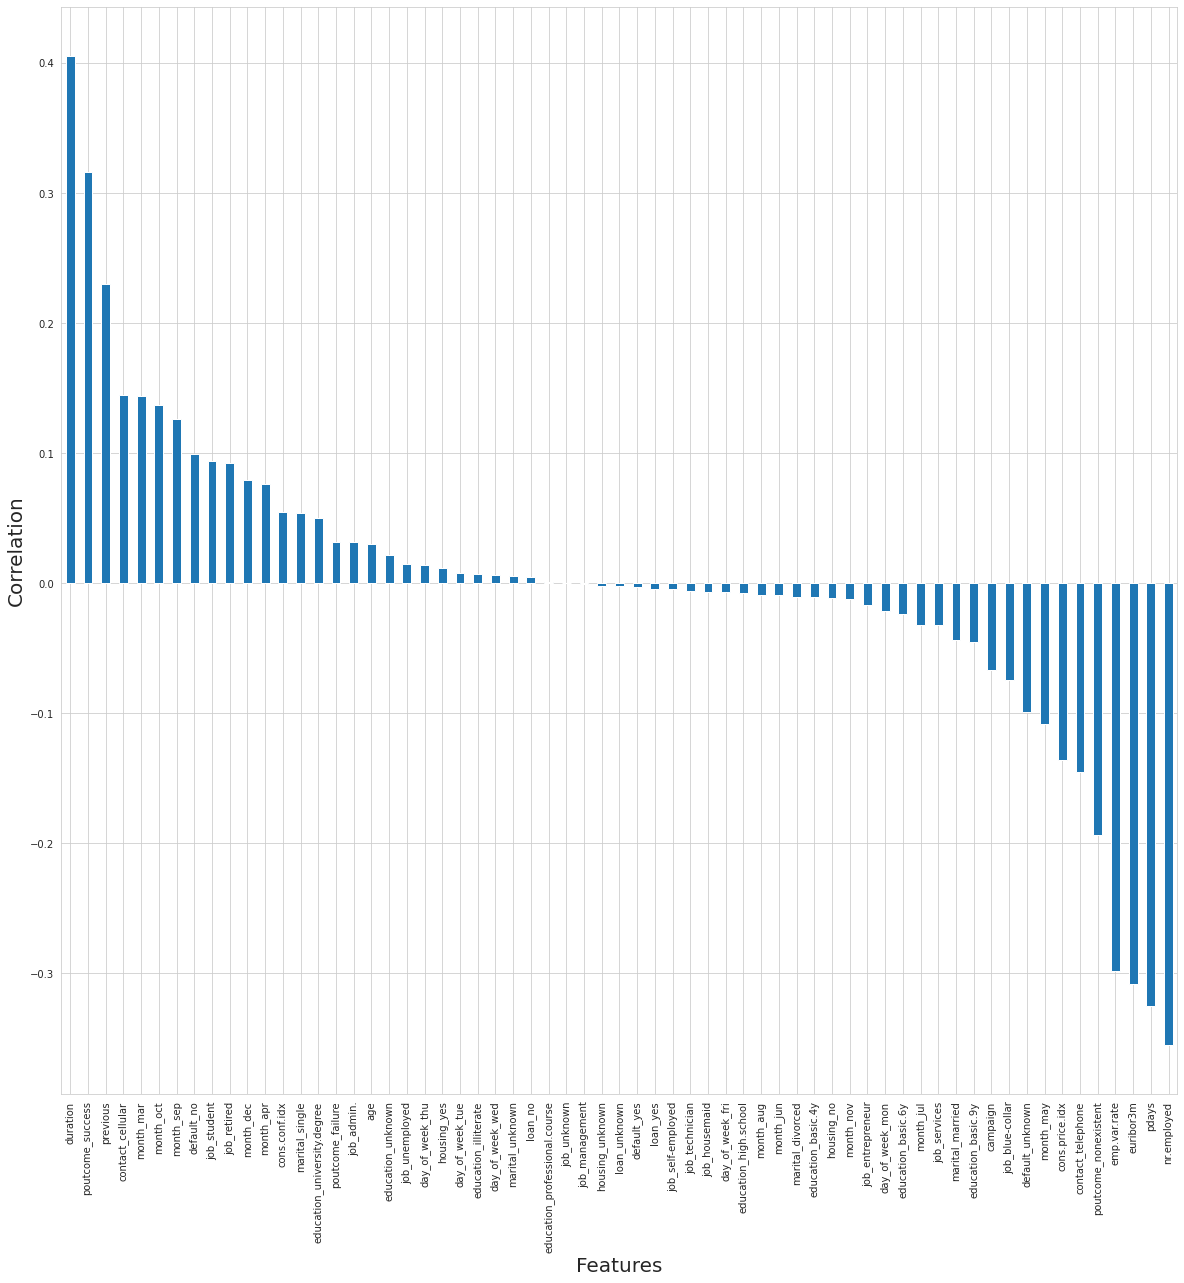

In [148]:
import matplotlib.pyplot as plt
Corr2.plot.bar(figsize=(20,20))
plt.xticks(rotation=90)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Correlation", fontsize=20)

plt.show()

Notes :

1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2. If the call duration is more , there are higher chances of getting a yes from the client.
4. Other than duration as we have seens above, cellular contats, month of March Oct, Sep, having no default and student and retired,  are also highly correlated

Text(0.5, 1.05, 'Pearson correlation of Features')

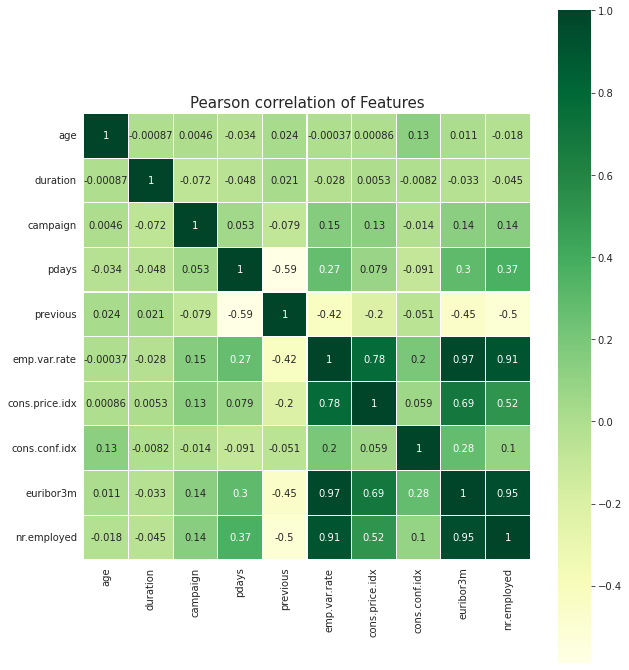

In [149]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = bank.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

#**Data Preprocessing for Model Building**

##**Liabraries to load**

In [150]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

# Validation
import itertools
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import brier_score_loss 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import calinski_harabaz_score


## Load Data

In [151]:
#Load dataset
file_name = "https://raw.githubusercontent.com/omerbmk/CIND-820-OmerMirza/main/bank-additional-full.csv"
data = pd.read_csv(file_name, sep=';')


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##Dealing with Missing data

In [153]:
# To Check for Missing Value
print (f"\nMissing values :  ", data.isnull().sum().values.sum())


Missing values :   0


##Dealing with duplicate data

In [154]:
print(data[data.duplicated(keep="last")])
#print(f"the number of dublicates are (row,column):",data[data.duplicated(keep="last")].shape)

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    uni

In [155]:
data = data.drop_duplicates()
data.shape

(41176, 21)

In [156]:
cvd = cvd.drop_duplicates()
cvd.shape

(41176, 21)

In [157]:
data.head(-100)

age          job   marital            education  default housing loan  \
0       56    housemaid   married             basic.4y       no      no   no   
1       57     services   married          high.school  unknown      no   no   
2       37     services   married          high.school       no     yes   no   
3       40       admin.   married             basic.6y       no      no   no   
4       56     services   married          high.school       no      no  yes   
...    ...          ...       ...                  ...      ...     ...  ...   
41083   24   technician    single    university.degree       no     yes  yes   
41084   18      student    single              unknown       no     yes   no   
41085   51       admin.  divorced          high.school       no     yes  yes   
41086   50  blue-collar  divorced  professional.course       no     yes   no   
41087   30  blue-collar    single  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41083   cellular   nov         tue  ...         3      6         3   
41084   cellular   nov         tue  ...         2    999         3   
41085   cellular   nov         tue  ...         2      6         4   
41086   cellular   nov         tue  ...         2      9         3   
41087   cellular   nov         tue  ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41083      failure         -1.1          94.767          -50.8      1.049   
41084      failure         -1.1          94.767          -50.8      1.049   
41085      failure         -1.1          94.767          -50.8      1.049   
41086      success         -1.1          94.767          -50.8      1.049   
41087  nonexistent         -1.1          94.767          -50.8      1.049   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41083       4963.6  yes  
41084       4963.6   no  
41085       4963.6  yes  
41086       4963.6   no  
41087       4963.6   no  

[41076 rows x 21 columns]

## Outlier Handling

We check for outliers only in the features that contain numerical values.

In [158]:
df_num = data.select_dtypes(include = np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   duration        41176 non-null  int64  
 2   campaign        41176 non-null  int64  
 3   pdays           41176 non-null  int64  
 4   previous        41176 non-null  int64  
 5   emp.var.rate    41176 non-null  float64
 6   cons.price.idx  41176 non-null  float64
 7   cons.conf.idx   41176 non-null  float64
 8   euribor3m       41176 non-null  float64
 9   nr.employed     41176 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.5 MB


In [159]:
# Check global outliers using 0.05 quantile and 0.95 quantile
min_p = df_num.quantile(0.05)
max_p = df_num.quantile(0.95)

# Column vs Number of Outliers
((df_num <= min_p) | (df_num >= max_p)).sum()

age                4594
duration           4151
campaign          20040
pdays             41176
previous          41176
emp.var.rate      19132
cons.price.idx     6895
cons.conf.idx      5260
euribor3m          4526
nr.employed       19356
dtype: int64

In [160]:
#We need to install cufflinks to link plotly to pandas and add the iplot method:

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

<IPython.core.display.Javascript object>

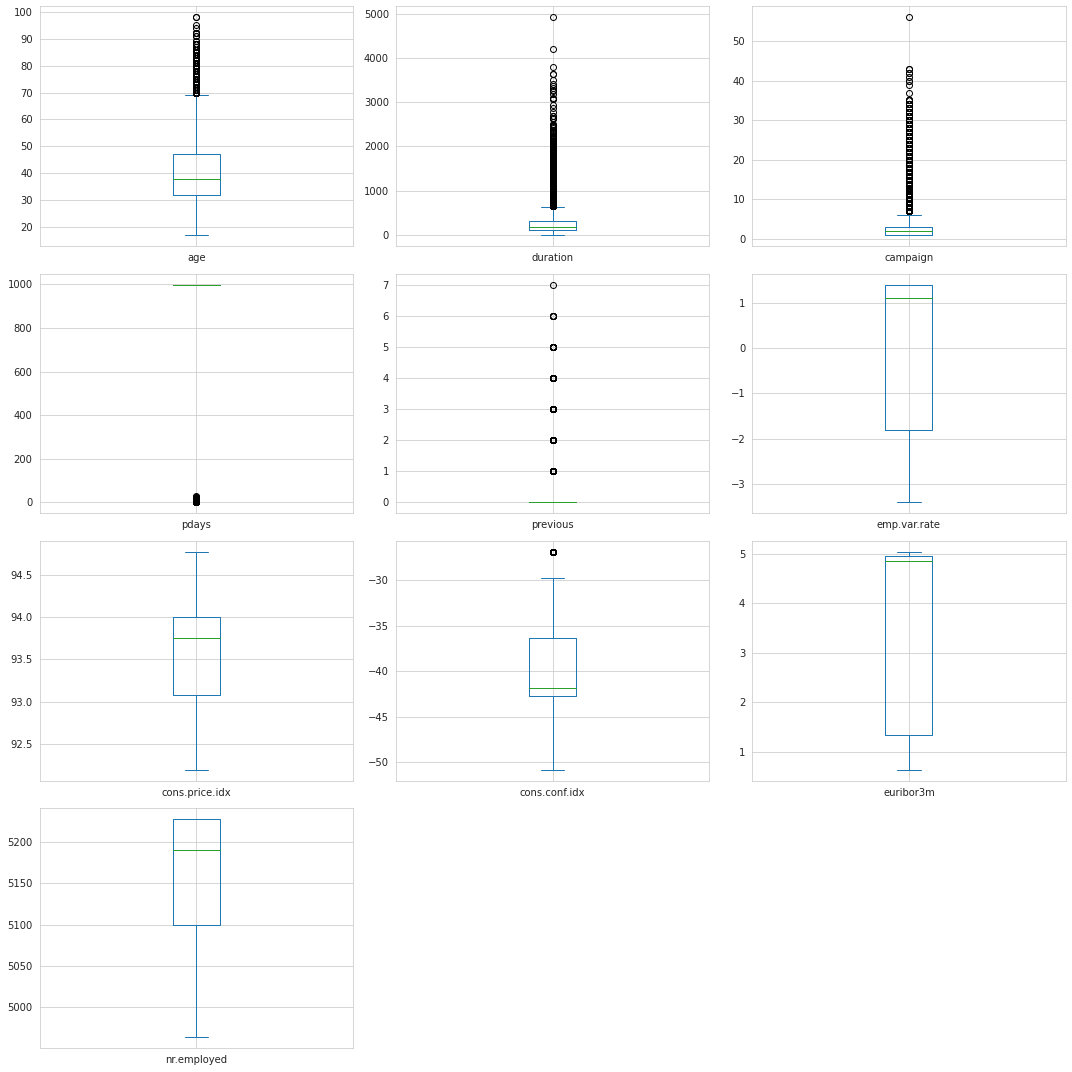

In [161]:
df_num.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))
plt.tight_layout()

###Summary of Outlier

* age = there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers
* campaign = column has anomaly data point when compare to the other points (Try to remove it)
* pdays = Cannot remove any points, because it having lot of data points same place
* previous =  we cannot see any anomaly
* df_cont = we cannot see any anomaly
* cons.conf.idx  = has one outlier point and that can be visible  that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers
* euribor3m = we cannot see any anomaly
* nr.employed = we cannot see any anomaly




<IPython.core.display.Javascript object>

Before Shape: (41176, 21)
After Shape: (41175, 21)


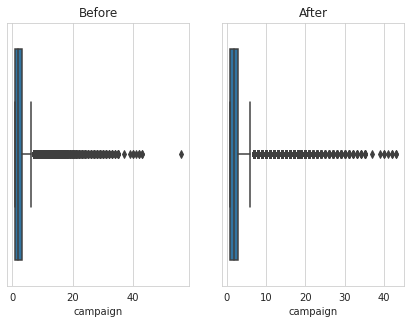

In [162]:
# Campaign Outlier removal
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",data.shape)

# Removing all the outliers
df2 = data[(data['campaign'] < 50)]

#Visulization
print("After Shape:",df2.shape)

sns.boxplot(data['campaign'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['campaign'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

data = df2

The above operation only removed the one row and it is better

<IPython.core.display.Javascript object>

Before Shape: (41175, 21)
After Shape: (41175, 21)


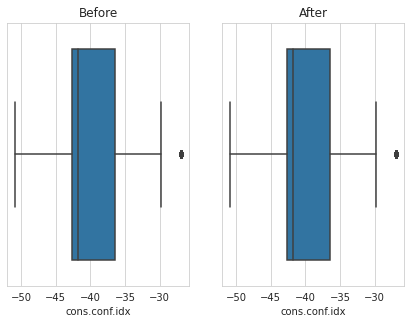

In [163]:
# cons.conf.idx Outlier removal
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",data.shape)

# Removing all the outliers
df2 = data[(data['cons.conf.idx'] < 50)]

#Visulization
print("After Shape:",df2.shape)

sns.boxplot(data['cons.conf.idx'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['cons.conf.idx'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

data = df2

## **Droping Columns**

In [164]:
#How many o values in every attribute

df_bank.isin([0]).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
target            36548
age_bins              0
dtype: int64

In [165]:
#Drop duration
data = data.drop(['duration'], axis=1)

In [166]:
#Drop duration cross_validation dataset
cvd = cvd.drop(['duration'], axis=1)

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [167]:
#previous 35563 is "0" (35563/41188 no data in this attribute ,I will drop this attribute)
data = data.drop(['previous'], axis=1)

In [168]:
#Drop previous cross_validation dataset
cvd = cvd.drop(['previous'], axis=1)

In [169]:
#999 means client was not previously contacted makes 96% of the values of the column.
data = data.drop(['pdays'], axis=1)

In [170]:
#Drop pdays cross_validation dataset
cvd = cvd.drop(['pdays'], axis=1)


In [171]:
data = data.drop(['emp.var.rate'], axis=1)
data = data.drop(['euribor3m'], axis=1)
data = data.drop(['cons.conf.idx'], axis=1)#which has a weak correlation but was deleted because

In [172]:
cvd = cvd.drop(['emp.var.rate'], axis=1)
cvd = cvd.drop(['euribor3m'], axis=1)
cvd = cvd.drop(['cons.conf.idx'], axis=1)#which has a weak correlation but was deleted because

In [173]:
data.isin([0]).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
poutcome          0
cons.price.idx    0
nr.employed       0
y                 0
dtype: int64

The social and economic context attributes have correlation among themselves. All columns with a high correlation will be removed to prevent Multicollinearity, it happens when predictor variable can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. The columns are 'emp.var.rate','euribor3m'.'cons.conf.idx'-which has a weak correlation.

**Normalization of Numerical data**

## Dealing with categorical values

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, I would focus on 2 main methods: One-Hot-Encoding and Label-Encoder. Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

Label Encoding
This approach is very simple and it involves converting each value in a column to a number in a sequence. But depending upon the data values and type of data, label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them.


One-Hot Encoder
Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set. It can cause the number of columns to expand greatly if you have many unique values in a category column


In [174]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


We hava 11 Catagory attributes, which can increase no. of columns to 50+ and considering the size of data I will be using Label encoding. However to eliminate hierarchy/order issue I will perform label encoding to only selected columns where relationship issue do no occur

* job
* marital
* education
* contact
* poutcome
* y

In [175]:
from sklearn.preprocessing import LabelEncoder
LabEn=LabelEncoder()
categorical_var=['job','marital','contact', 'poutcome','y']
for i in categorical_var:
    data[i]=LabEn.fit_transform(data[i])
    
data.head()

age  job  marital    education  default housing loan  contact month  \
0   56    3        1     basic.4y       no      no   no        1   may   
1   57    7        1  high.school  unknown      no   no        1   may   
2   37    7        1  high.school       no     yes   no        1   may   
3   40    0        1     basic.6y       no      no   no        1   may   
4   56    7        1  high.school       no      no  yes        1   may   

  day_of_week  campaign  poutcome  cons.price.idx  nr.employed  y  
0         mon         1         1          93.994       5191.0  0  
1         mon         1         1          93.994       5191.0  0  
2         mon         1         1          93.994       5191.0  0  
3         mon         1         1          93.994       5191.0  0  
4         mon         1         1          93.994       5191.0  0

In [176]:
# Cross Validation Data
from sklearn.preprocessing import LabelEncoder
LabEn=LabelEncoder()
categorical_var=['job','marital', 'contact', 'poutcome','y']
for i in categorical_var:
    cvd[i]=LabEn.fit_transform(cvd[i])
    
cvd.head()

age  job  marital    education  default housing loan  contact month  \
0   56    3        1     basic.4y       no      no   no        1   may   
1   57    7        1  high.school  unknown      no   no        1   may   
2   37    7        1  high.school       no     yes   no        1   may   
3   40    0        1     basic.6y       no      no   no        1   may   
4   56    7        1  high.school       no      no  yes        1   may   

  day_of_week  campaign  poutcome  cons.price.idx  nr.employed  y  
0         mon         1         1          93.994       5191.0  0  
1         mon         1         1          93.994       5191.0  0  
2         mon         1         1          93.994       5191.0  0  
3         mon         1         1          93.994       5191.0  0  
4         mon         1         1          93.994       5191.0  0

In [177]:
#I will be converting the month and day by it's corresponding number  
from sklearn.preprocessing import OrdinalEncoder

# checking the values in Month field
data['month'].value_counts()
education_mapper = {'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
data['month'] = data['month'].replace(education_mapper)
data

age  job  marital            education  default housing loan  contact  \
0       56    3        1             basic.4y       no      no   no        1   
1       57    7        1          high.school  unknown      no   no        1   
2       37    7        1          high.school       no     yes   no        1   
3       40    0        1             basic.6y       no      no   no        1   
4       56    7        1          high.school       no      no  yes        1   
...    ...  ...      ...                  ...      ...     ...  ...      ...   
41183   73    5        1  professional.course       no     yes   no        0   
41184   46    1        1  professional.course       no      no   no        0   
41185   56    5        1    university.degree       no     yes   no        0   
41186   44    9        1  professional.course       no      no   no        0   
41187   74    5        1  professional.course       no     yes   no        0   

       month day_of_week  campaign  poutcome  cons.price.idx  nr.employed  y  
0          5         mon         1         1          93.994       5191.0  0  
1          5         mon         1         1          93.994       5191.0  0  
2          5         mon         1         1          93.994       5191.0  0  
3          5         mon         1         1          93.994       5191.0  0  
4          5         mon         1         1          93.994       5191.0  0  
...      ...         ...       ...       ...             ...          ... ..  
41183     11         fri         1         1          94.767       4963.6  1  
41184     11         fri         1         1          94.767       4963.6  0  
41185     11         fri         2         1          94.767       4963.6  0  
41186     11         fri         1         1          94.767       4963.6  1  
41187     11         fri         3         0          94.767       4963.6  0  

[41175 rows x 15 columns]

In [178]:
# Cross Validation Data
#I will be converting the month and day by it's corresponding number  
from sklearn.preprocessing import OrdinalEncoder

# checking the values in Month field
cvd['month'].value_counts()
education_mapper = {'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
cvd['month'] = data['month'].replace(education_mapper)
cvd

age  job  marital            education  default housing loan  contact  \
0       56    3        1             basic.4y       no      no   no        1   
1       57    7        1          high.school  unknown      no   no        1   
2       37    7        1          high.school       no     yes   no        1   
3       40    0        1             basic.6y       no      no   no        1   
4       56    7        1          high.school       no      no  yes        1   
...    ...  ...      ...                  ...      ...     ...  ...      ...   
41183   73    5        1  professional.course       no     yes   no        0   
41184   46    1        1  professional.course       no      no   no        0   
41185   56    5        1    university.degree       no     yes   no        0   
41186   44    9        1  professional.course       no      no   no        0   
41187   74    5        1  professional.course       no     yes   no        0   

       month day_of_week  campaign  poutcome  cons.price.idx  nr.employed  y  
0        5.0         mon         1         1          93.994       5191.0  0  
1        5.0         mon         1         1          93.994       5191.0  0  
2        5.0         mon         1         1          93.994       5191.0  0  
3        5.0         mon         1         1          93.994       5191.0  0  
4        5.0         mon         1         1          93.994       5191.0  0  
...      ...         ...       ...       ...             ...          ... ..  
41183   11.0         fri         1         1          94.767       4963.6  1  
41184   11.0         fri         1         1          94.767       4963.6  0  
41185   11.0         fri         2         1          94.767       4963.6  0  
41186   11.0         fri         1         1          94.767       4963.6  1  
41187   11.0         fri         3         0          94.767       4963.6  0  

[41176 rows x 15 columns]

In [179]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0, 'unknown':2}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    data.replace({item:bin_dict},inplace=True)
data

age  job  marital            education  default  housing  loan  \
0       56    3        1             basic.4y        0        0     0   
1       57    7        1          high.school        2        0     0   
2       37    7        1          high.school        0        1     0   
3       40    0        1             basic.6y        0        0     0   
4       56    7        1          high.school        0        0     1   
...    ...  ...      ...                  ...      ...      ...   ...   
41183   73    5        1  professional.course        0        1     0   
41184   46    1        1  professional.course        0        0     0   
41185   56    5        1    university.degree        0        1     0   
41186   44    9        1  professional.course        0        0     0   
41187   74    5        1  professional.course        0        1     0   

       contact  month day_of_week  campaign  poutcome  cons.price.idx  \
0            1      5         mon         1         1          93.994   
1            1      5         mon         1         1          93.994   
2            1      5         mon         1         1          93.994   
3            1      5         mon         1         1          93.994   
4            1      5         mon         1         1          93.994   
...        ...    ...         ...       ...       ...             ...   
41183        0     11         fri         1         1          94.767   
41184        0     11         fri         1         1          94.767   
41185        0     11         fri         2         1          94.767   
41186        0     11         fri         1         1          94.767   
41187        0     11         fri         3         0          94.767   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41175 rows x 15 columns]

In [180]:
#Cross Validation data
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0, 'unknown':2}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    cvd.replace({item:bin_dict},inplace=True)
cvd

age  job  marital            education  default  housing  loan  \
0       56    3        1             basic.4y        0        0     0   
1       57    7        1          high.school        2        0     0   
2       37    7        1          high.school        0        1     0   
3       40    0        1             basic.6y        0        0     0   
4       56    7        1          high.school        0        0     1   
...    ...  ...      ...                  ...      ...      ...   ...   
41183   73    5        1  professional.course        0        1     0   
41184   46    1        1  professional.course        0        0     0   
41185   56    5        1    university.degree        0        1     0   
41186   44    9        1  professional.course        0        0     0   
41187   74    5        1  professional.course        0        1     0   

       contact  month day_of_week  campaign  poutcome  cons.price.idx  \
0            1    5.0         mon         1         1          93.994   
1            1    5.0         mon         1         1          93.994   
2            1    5.0         mon         1         1          93.994   
3            1    5.0         mon         1         1          93.994   
4            1    5.0         mon         1         1          93.994   
...        ...    ...         ...       ...       ...             ...   
41183        0   11.0         fri         1         1          94.767   
41184        0   11.0         fri         1         1          94.767   
41185        0   11.0         fri         2         1          94.767   
41186        0   11.0         fri         1         1          94.767   
41187        0   11.0         fri         3         0          94.767   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41176 rows x 15 columns]

In [181]:
# checking the values in Month field
data['day_of_week'].value_counts()
education_mapper = {'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
data['day_of_week'] = data['day_of_week'].replace(education_mapper)
data

age  job  marital            education  default  housing  loan  \
0       56    3        1             basic.4y        0        0     0   
1       57    7        1          high.school        2        0     0   
2       37    7        1          high.school        0        1     0   
3       40    0        1             basic.6y        0        0     0   
4       56    7        1          high.school        0        0     1   
...    ...  ...      ...                  ...      ...      ...   ...   
41183   73    5        1  professional.course        0        1     0   
41184   46    1        1  professional.course        0        0     0   
41185   56    5        1    university.degree        0        1     0   
41186   44    9        1  professional.course        0        0     0   
41187   74    5        1  professional.course        0        1     0   

       contact  month  day_of_week  campaign  poutcome  cons.price.idx  \
0            1      5            2         1         1          93.994   
1            1      5            2         1         1          93.994   
2            1      5            2         1         1          93.994   
3            1      5            2         1         1          93.994   
4            1      5            2         1         1          93.994   
...        ...    ...          ...       ...       ...             ...   
41183        0     11            6         1         1          94.767   
41184        0     11            6         1         1          94.767   
41185        0     11            6         2         1          94.767   
41186        0     11            6         1         1          94.767   
41187        0     11            6         3         0          94.767   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41175 rows x 15 columns]

In [182]:
#Cross Validation Data
cvd['day_of_week'].value_counts()
education_mapper = {'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
cvd['day_of_week'] = cvd['day_of_week'].replace(education_mapper)
cvd

age  job  marital            education  default  housing  loan  \
0       56    3        1             basic.4y        0        0     0   
1       57    7        1          high.school        2        0     0   
2       37    7        1          high.school        0        1     0   
3       40    0        1             basic.6y        0        0     0   
4       56    7        1          high.school        0        0     1   
...    ...  ...      ...                  ...      ...      ...   ...   
41183   73    5        1  professional.course        0        1     0   
41184   46    1        1  professional.course        0        0     0   
41185   56    5        1    university.degree        0        1     0   
41186   44    9        1  professional.course        0        0     0   
41187   74    5        1  professional.course        0        1     0   

       contact  month  day_of_week  campaign  poutcome  cons.price.idx  \
0            1    5.0            2         1         1          93.994   
1            1    5.0            2         1         1          93.994   
2            1    5.0            2         1         1          93.994   
3            1    5.0            2         1         1          93.994   
4            1    5.0            2         1         1          93.994   
...        ...    ...          ...       ...       ...             ...   
41183        0   11.0            6         1         1          94.767   
41184        0   11.0            6         1         1          94.767   
41185        0   11.0            6         2         1          94.767   
41186        0   11.0            6         1         1          94.767   
41187        0   11.0            6         3         0          94.767   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41176 rows x 15 columns]

In [183]:
#The dataset contains nine object type variables. I will use 
#a custom function by sklearn's preprocessing tool 
#to convert all nine variables to numerical labels .
#from sklearn.preprocessing import LabelEncoder
#LabEn=LabelEncoder()

#categorical_var=['job','marital', 'education','contact', 'poutcome','y']
#for i in categorical_var:
#    data[i]=LabEn.fit_transform(data[i])
    
#data.head()

In [184]:
#Cross Validation Data
#from sklearn.preprocessing import LabelEncoder
#LabEn=LabelEncoder()

#categorical_var=['job','marital', 'education','contact', 'poutcome','y']
#for i in categorical_var:
#    cvd[i]=LabEn.fit_transform(cvd[i])
    
#cvd.head()

In [185]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
data['education'].value_counts()
education_mapper = {"basic.4y": 0,"basic.6y": 1, "basic.9y":2, "high.school":3, "illiterate":4, "professional.course":5 ,"university.degree":6 ,"unknown":-1}
data["education"] = data["education"].replace(education_mapper)
data

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      5   
1       57    7        1          3        2        0     0        1      5   
2       37    7        1          3        0        1     0        1      5   
3       40    0        1          1        0        0     0        1      5   
4       56    7        1          3        0        0     1        1      5   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        1     0        0     11   
41184   46    1        1          5        0        0     0        0     11   
41185   56    5        1          6        0        1     0        0     11   
41186   44    9        1          5        0        0     0        0     11   
41187   74    5        1          5        0        1     0        0     11   

       day_of_week  campaign  poutcome  cons.price.idx  nr.employed  y  
0                2         1         1          93.994       5191.0  0  
1                2         1         1          93.994       5191.0  0  
2                2         1         1          93.994       5191.0  0  
3                2         1         1          93.994       5191.0  0  
4                2         1         1          93.994       5191.0  0  
...            ...       ...       ...             ...          ... ..  
41183            6         1         1          94.767       4963.6  1  
41184            6         1         1          94.767       4963.6  0  
41185            6         2         1          94.767       4963.6  0  
41186            6         1         1          94.767       4963.6  1  
41187            6         3         0          94.767       4963.6  0  

[41175 rows x 15 columns]

In [186]:
#Cross Data Validation
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
cvd['education'].value_counts()
education_mapper = {"basic.4y": 0,"basic.6y": 1, "basic.9y":2, "high.school":3, "illiterate":4, "professional.course":5 ,"university.degree":6 ,"unknown":-1}
cvd["education"] = data["education"].replace(education_mapper)
cvd

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1        0.0        0        0     0        1    5.0   
1       57    7        1        3.0        2        0     0        1    5.0   
2       37    7        1        3.0        0        1     0        1    5.0   
3       40    0        1        1.0        0        0     0        1    5.0   
4       56    7        1        3.0        0        0     1        1    5.0   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1        5.0        0        1     0        0   11.0   
41184   46    1        1        5.0        0        0     0        0   11.0   
41185   56    5        1        6.0        0        1     0        0   11.0   
41186   44    9        1        5.0        0        0     0        0   11.0   
41187   74    5        1        5.0        0        1     0        0   11.0   

       day_of_week  campaign  poutcome  cons.price.idx  nr.employed  y  
0                2         1         1          93.994       5191.0  0  
1                2         1         1          93.994       5191.0  0  
2                2         1         1          93.994       5191.0  0  
3                2         1         1          93.994       5191.0  0  
4                2         1         1          93.994       5191.0  0  
...            ...       ...       ...             ...          ... ..  
41183            6         1         1          94.767       4963.6  1  
41184            6         1         1          94.767       4963.6  0  
41185            6         2         1          94.767       4963.6  0  
41186            6         1         1          94.767       4963.6  1  
41187            6         3         0          94.767       4963.6  0  

[41176 rows x 15 columns]

In [187]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
data['contact'] = LabelEncoder().fit_transform(data['contact'])
data['contact']

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: contact, Length: 41175, dtype: int64

In [188]:
# Cross Data Validation
# encode strings to integer
cvd['contact'] = LabelEncoder().fit_transform(cvd['contact'])
cvd['contact']

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: contact, Length: 41176, dtype: int64

In [189]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
data['y'] = LabelEncoder().fit_transform(data['y'])
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41175, dtype: int64

In [190]:
#Cross Data Validation
# encode strings to integer
cvd['y'] = LabelEncoder().fit_transform(cvd['y'])
cvd['y'] 

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

In [191]:
#Checking null values after converting categorical values
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
poutcome          0
cons.price.idx    0
nr.employed       0
y                 0
dtype: int64

In [192]:
# Removing any NaNs or anomalies just to make sure
data.dropna(how="any", axis=0)

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      5   
1       57    7        1          3        2        0     0        1      5   
2       37    7        1          3        0        1     0        1      5   
3       40    0        1          1        0        0     0        1      5   
4       56    7        1          3        0        0     1        1      5   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        1     0        0     11   
41184   46    1        1          5        0        0     0        0     11   
41185   56    5        1          6        0        1     0        0     11   
41186   44    9        1          5        0        0     0        0     11   
41187   74    5        1          5        0        1     0        0     11   

       day_of_week  campaign  poutcome  cons.price.idx  nr.employed  y  
0                2         1         1          93.994       5191.0  0  
1                2         1         1          93.994       5191.0  0  
2                2         1         1          93.994       5191.0  0  
3                2         1         1          93.994       5191.0  0  
4                2         1         1          93.994       5191.0  0  
...            ...       ...       ...             ...          ... ..  
41183            6         1         1          94.767       4963.6  1  
41184            6         1         1          94.767       4963.6  0  
41185            6         2         1          94.767       4963.6  0  
41186            6         1         1          94.767       4963.6  1  
41187            6         3         0          94.767       4963.6  0  

[41175 rows x 15 columns]

As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
If the call duration is more , there are higher chances of getting a yes from the client.
It has been sorted in descending order.
Succes , cellular, housing, unknown, campaign are also highly correlated

In [193]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data['y']
print("Shape of Y:", data_y.shape)

Shape of X: (41175, 14)
Shape of Y: (41175,)


In [194]:
data_y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41175, dtype: int64

##Train Test split

---



In [195]:
# Select Features
feature = data_x

# Select Target
target = data_y

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (32940, 14)
Shape of testing feature: (8235, 14)
Shape of training label: (32940,)
Shape of testing label: (8235,)


from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

In [196]:
y_train

11279    0
26921    0
29730    0
30926    0
23850    0
        ..
7815     0
32522    0
5194     0
12174    0
33014    0
Name: y, Length: 32940, dtype: int64

##**Standardisation of Data**

**DATASET VIEW BEFORE STANDARDISATION**

In [197]:
# histograms of the variables before standardization
#Histogram for the numerical attributes
#X_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
#plt.tight_layout()
#plt.show()

**STANDARDISATION**

In [198]:
#Standardisation of Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

**DATASET VIEW AFTER STANDARDISATION**

In [199]:
# histograms of the variables after standardization
#Histogram for the numerical attributes
#X_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
#plt.tight_layout()
#plt.show()

##**Normalization of Data**

Did not perform normalization of dataset

##**Applicaiotn of SMOTE for Class Imbalance**

In [200]:
counter = Counter(y_train)
print("Before SMOTE", counter)

Before SMOTE Counter({0: 29274, 1: 3666})


In [201]:
smote = SMOTE(random_state=0)

In [202]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [203]:
print("After SMOTE", Counter(y_train))

After SMOTE Counter({0: 29274, 1: 29274})


In [204]:
y_train.isna().sum()

0

In [205]:
y_test.isna().sum()

0

In [206]:
y_test.isin([0]).any().any()

True

In [207]:
print(Counter(y_test))

Counter({0: 7262, 1: 973})


In [208]:
y_train.shape

(58548,)

In [209]:
X_train.shape

(58548, 14)

In [210]:
X_test.shape

(8235, 14)

In [211]:
print(Counter(X_test))

Counter({'age': 1, 'job': 1, 'marital': 1, 'education': 1, 'default': 1, 'housing': 1, 'loan': 1, 'contact': 1, 'month': 1, 'day_of_week': 1, 'campaign': 1, 'poutcome': 1, 'cons.price.idx': 1, 'nr.employed': 1})


In [212]:
#spliting data to X and y for cross validation
X = cvd.drop("y",axis=1)
y = cvd["y"]

<IPython.core.display.Javascript object>

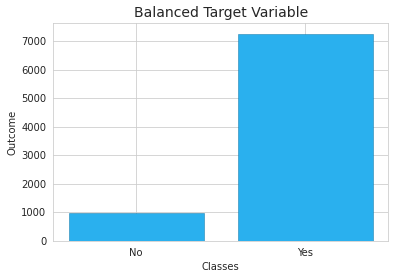

In [213]:
plt.bar(['No','Yes'], [sum(y_test), len(y_test)-sum(y_test)], facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Balanced Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Outcome')
plt.show()

<IPython.core.display.Javascript object>

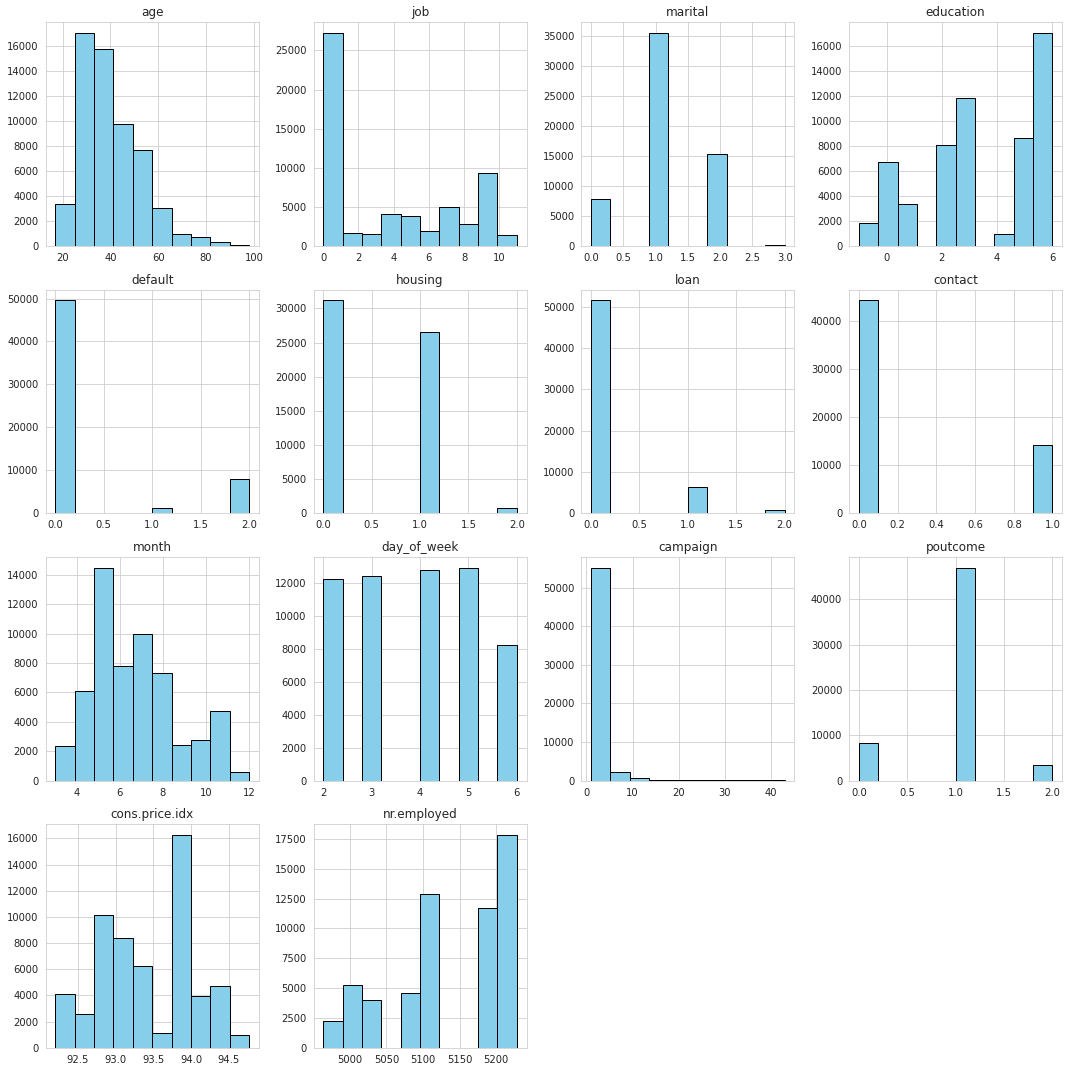

In [214]:
# histograms of the variables
#Histogram for the numerical attributes
X_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

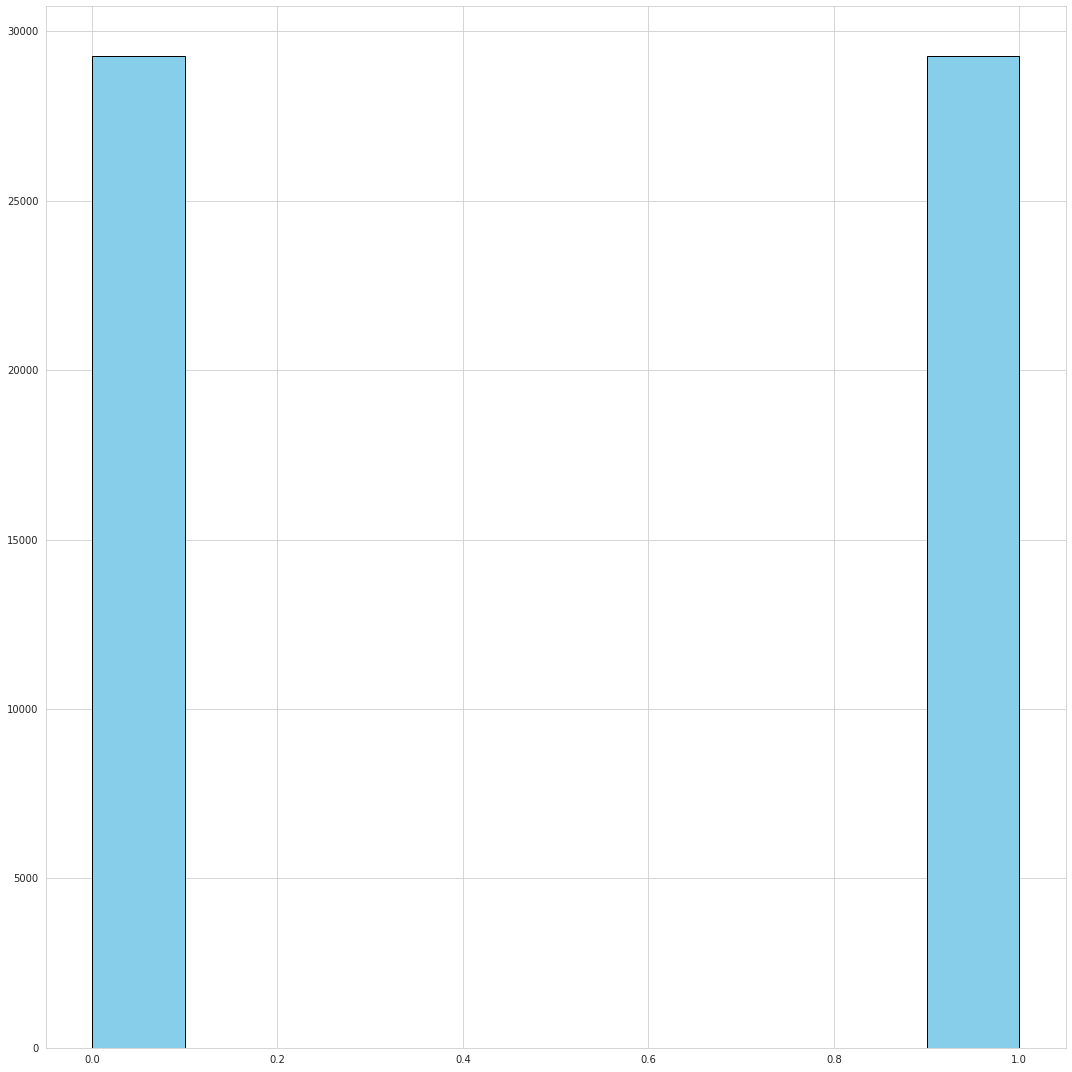

In [215]:
# histograms of the variables
#Histogram for the numerical attributes
y_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

In [216]:
# Dataset overview after application of SMOTE on X_Train Set
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58548 entries, 0 to 58547
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             58548 non-null  int64  
 1   job             58548 non-null  int64  
 2   marital         58548 non-null  int64  
 3   education       58548 non-null  int64  
 4   default         58548 non-null  int64  
 5   housing         58548 non-null  int64  
 6   loan            58548 non-null  int64  
 7   contact         58548 non-null  int64  
 8   month           58548 non-null  int64  
 9   day_of_week     58548 non-null  int64  
 10  campaign        58548 non-null  int64  
 11  poutcome        58548 non-null  int64  
 12  cons.price.idx  58548 non-null  float64
 13  nr.employed     58548 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 6.3 MB


In [217]:
X_train.describe()

age           job       marital     education       default  \
count  58548.000000  58548.000000  58548.000000  58548.000000  58548.000000   
mean      40.211006      3.753553      1.130901      3.463620      0.287337   
std       11.968713      3.591464      0.617340      2.217323      0.687705   
min       17.000000      0.000000      0.000000     -1.000000      0.000000   
25%       31.000000      0.000000      1.000000      2.000000      0.000000   
50%       37.000000      3.000000      1.000000      3.000000      0.000000   
75%       48.000000      7.000000      2.000000      6.000000      0.000000   
max       98.000000     11.000000      3.000000      6.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  58548.000000  58548.000000  58548.000000  58548.000000  58548.000000   
mean       0.481417      0.134625      0.241597      6.625214      3.871968   
std        0.527301      0.380645      0.428055      2.195576      1.345719   
min        0.000000      0.000000      0.000000      3.000000      2.000000   
25%        0.000000      0.000000      0.000000      5.000000      3.000000   
50%        0.000000      0.000000      0.000000      6.000000      4.000000   
75%        1.000000      0.000000      0.000000      8.000000      5.000000   
max        2.000000      2.000000      1.000000     12.000000      6.000000   

           campaign      poutcome  cons.price.idx   nr.employed  
count  58548.000000  58548.000000    58548.000000  58548.000000  
mean       2.172525      0.917145       93.477149   5135.704183  
std        2.287769      0.436617        0.629063     87.023217  
min        1.000000      0.000000       92.201000   4963.600000  
25%        1.000000      1.000000       92.915611   5076.200000  
50%        1.000000      1.000000       93.444000   5191.000000  
75%        2.000000      1.000000       93.994000   5228.100000  
max       43.000000      2.000000       94.767000   5228.100000

In [218]:
# Dataset overview after application of SMOTE on Y_Train Set
y_train.describe()

count    58548.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: y, dtype: float64

##**Correlation Matrix after standardization and SMOTE**

In [219]:
## draw the correlation matrix
##correlation_matrix = pd.DataFrame(X_train).corr()
##fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
##sns.heatmap(correlation_matrix, ax=ax)
##correlation_matrix

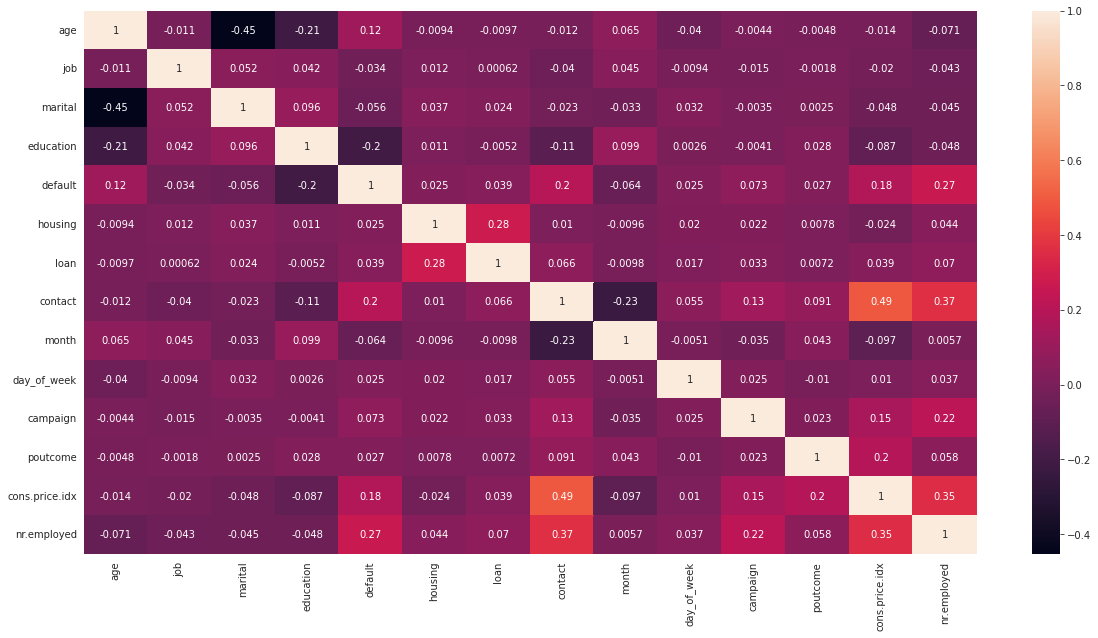

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cor = pd.DataFrame(X_train).corr()

plt.figure(figsize = (20,10))
sns.heatmap(cor, annot=True)
#correlation_matrix

##**PCA**

In [221]:
#from sklearn.decomposition import PCA

## apply the PCA for feature for feature reduction
#pca = PCA(n_components=0.95)
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

#X_train

In [222]:
#pca.explained_variance_ratio_

##**Size of Train and Test Data Set after PCA**

In [223]:
# From Train
print("The shape of the train dataset: ", X_train.shape)
# From Test
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (58548, 14)
The shape of the test dataset:  (8235, 14)


**Supporting Function**

In [224]:
#  def conf_matrix(cnf_matrix):
#      '''
#      Visualization function for confusion matrix
#      '''
#      plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) # Create the basic matrix.#
#
#      #Add title and Axis Labels
#      plt.title('Confusion Matrix')
#      plt.ylabel('True label')
##      plt.xlabel('Predicted label')

 #     #Add appropriate Axis Scales
 ##     class_names = set(y) #Get class labels to add to matrix
 #     tick_marks = np.arange(len(class_names))
 #     plt.xticks(tick_marks, class_names, rotation=45)
 #     plt.yticks(tick_marks, class_names)
 #     plt.style.use('seaborn-white')
 #     #Add Labels to Each Cell
 #     thresh = cnf_matrix.max() / 2. #Used for text coloring below
 #     #Here we iterate through the confusion matrix and append labels to our visualization.
 #     for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
 #             plt.text(j, i, cnf_matrix[i, j],
 #                     horizontalalignment="center",
 #                     color="white" if cnf_matrix[i, j] > thresh else "black")

      #Add a Side Bar Legend Showing Colors
#      plt.colorbar()
      
 # def plot_feature_importances(model):
#      '''
#     Visualization for future importance
#      '''
#    n_features = X_train.shape[1]
#   plt.figure(figsize=(8,12))
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), X.columns.values) 
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")

In [225]:
#def evaluate_model(model, x_test, y_test):
#    from sklearn import metrics

    # Predict Test Data 
 #   y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
  #  acc = metrics.accuracy_score(y_test, y_pred)
  #  prec = metrics.precision_score(y_test, y_pred)
  #  rec = metrics.recall_score(y_test, y_pred)
  #  f1 = metrics.f1_score(y_test, y_pred)
  #  kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
   # y_pred_proba = model.predict_proba(x_test)[::,1]
   # fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
   # auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    #cm = metrics.confusion_matrix(y_test, y_pred)

#    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
#            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

#**Classification Baseline Models**

###**Logistic Regression**

In [226]:
#Logistic Regression
from time import time

start = time() 

LR01 = LogisticRegression (solver='liblinear')
LR01.fit(X_train, y_train)

LRtrain_pred01 = LR01.predict_proba(X_train)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, LRtrain_pred01[:,1])))

LRtest_pred01 = LR01.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, LRtest_pred01[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8244976339091001
Accuracy on test set: 0.7530124147917768
Time taken tor run:0.6128077507019043 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

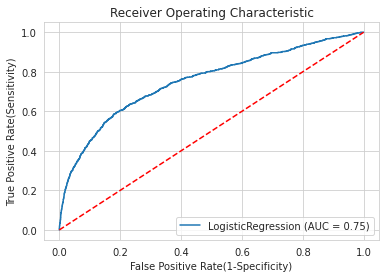

In [227]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(LR01, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

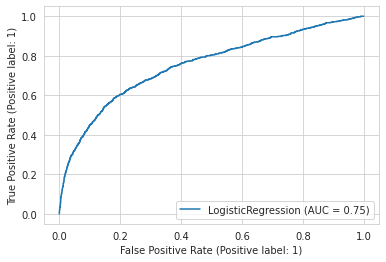

In [228]:
# for models evalution
lrB_AUC = metrics.plot_roc_curve(LR01, X_test, y_test)

####**Confusion Matrix**

In [229]:
pred01 = LR01.predict(X_test)

Logistic Regression Model - Confusion Matrix
[[5567 1695]
 [ 354  619]]




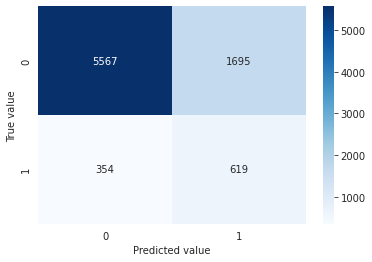

In [230]:
print("Logistic Regression Model - Confusion Matrix")
cmlr = confusion_matrix(y_test, pred01)
print(cmlr)
print('\n')

sns.heatmap(cmlr,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

#plt.style.use('seaborn-white')
#logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)
#predict01 = logreg.fit(X_train, y_train).predict(X_test)
#cm(confusion_matrix(y_test, pred01))

####**Evaluation of Logistic Regression**

In [231]:
print(classification_report(y_test, pred01))
tn, fp, fn, tp=cmlr.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      7262
           1       0.27      0.64      0.38       973

    accuracy                           0.75      8235
   macro avg       0.60      0.70      0.61      8235
weighted avg       0.86      0.75      0.79      8235

TP:  619 , FP:  1695 , TN:  5567 , FN: 354


Model accurately identified true positives 619 times out of 973, but it also got 268 false positives, which made f1-score very low.

In [232]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  pred01))
print(f"Accuracy: ", metrics.accuracy_score(y_test, pred01))
print(f"Precision: ",metrics.precision_score(y_test, pred01))
print(f"Recall: ",metrics.recall_score(y_test, pred01))
print(f"f1 Score: ",metrics.f1_score(y_test, pred01))
#print("Training error: %f" % LR01.loss_curve_[-1])
print("Training set score: %f" % LR01.score(X_train, y_train))
print("Test set score: %f" % LR01.score(X_test, y_test))
print("MSE: %f" % mean_squared_error(y_test, pred01))
LRfpr, LRtpr, _ = metrics.roc_curve(y_test, pred01)


ROC_AUC:  0.7013849989371528
Accuracy:  0.751183970856102
Precision:  0.26750216076058775
Recall:  0.6361767728674204
f1 Score:  0.37663522969272895
Training set score: 0.751298
Test set score: 0.751184
MSE: 0.248816


In [233]:
#for final models copmarison
lrB_acc = metrics.accuracy_score(y_test, pred01)
lrB_prec = metrics.precision_score(y_test, pred01)
lrB_rec = metrics.recall_score(y_test, pred01)
lrB_f1 =metrics.f1_score(y_test, pred01)



[0.16517027 0.07711632 0.03600097 0.07694334 0.0554065  0.02732105
 0.02202242 0.0703256  0.07270463 0.07006754 0.0753221  0.02640757
 0.08278085 0.14241082]


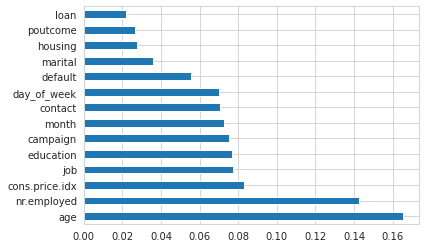

In [234]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [235]:
y_test

39117    1
17911    0
29437    0
13844    0
35291    0
        ..
10283    0
28386    0
38965    1
12659    0
32681    0
Name: y, Length: 8235, dtype: int64

###**MLP**

In [236]:
from sklearn.neural_network import MLPClassifier 
from time import time

start = time() 

# define and train an MLPClassifier named mlp on the given data
mlp01 = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
#mlp01.fit(PCA_X_train, y_train)
mlp01.fit(X_train, y_train)


#mlptrain_pred03 = mlp01.predict_proba(PCA_X_train)
mlptrain_pred03 = mlp01.predict_proba(X_train)

print('Accuracy on training set: {}'.format(roc_auc_score(y_train, mlptrain_pred03[:,1])))

#mlptest_pred03 = mlp01.predict_proba(PCA_X_test)
mlptest_pred03 = mlp01.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, mlptest_pred03[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8199063017445491
Accuracy on test set: 0.7348977331492007
Time taken tor run:399.9959738254547 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

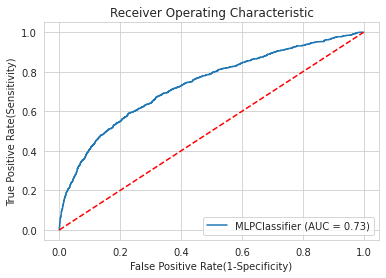

In [237]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
#metrics.plot_roc_curve(mlp01, PCA_X_test, y_test)
metrics.plot_roc_curve(mlp01, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

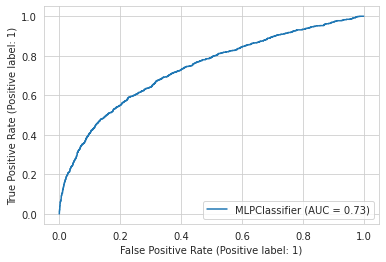

In [238]:
# for models evalution
mlpB_AUC = metrics.plot_roc_curve(mlp01, X_test, y_test)

####**Confusion Matrix**

In [239]:
pred03 = mlp01.predict(X_test)

MLP  Model
[[6829  433]
 [ 671  302]]




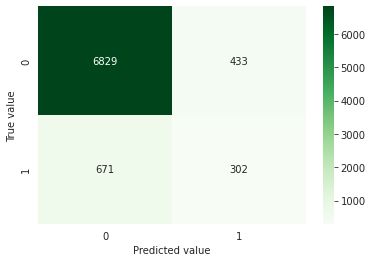

In [240]:
from sklearn.metrics import confusion_matrix
print("MLP  Model")
cm_MLP = confusion_matrix(y_test, pred03)
print(cm_MLP)
print('\n')

sns.heatmap(cm_MLP,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


####**Model Evaluation**

In [241]:
print(classification_report(y_test,pred03))
tn, fp, fn, tp=cm_MLP.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7262
           1       0.41      0.31      0.35       973

    accuracy                           0.87      8235
   macro avg       0.66      0.63      0.64      8235
weighted avg       0.85      0.87      0.86      8235

TP:  302 , FP:  433 , TN:  6829 , FN: 671


The above confusion matrix shows that there are 575 true positives and 398 false negatives. The number of false positives are 11158 and true negatives are 6104.

In [242]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  pred03))
print(f"Accuracy: ", metrics.accuracy_score(y_test, pred03))
print(f"Precision: ",metrics.precision_score(y_test, pred03))
print(f"Recall: ",metrics.recall_score(y_test, pred03))
print(f"f1 Score: ",metrics.f1_score(y_test, pred03))
print(f"Training error: %f" % mlp01.loss_curve_[-1])
print(f"Training set score: %f" % mlp01.score(X_train, y_train))
print(f"Test set score: %f" % mlp01.score(X_test, y_test))
print(f"MSE: %f" % mean_squared_error(y_test, pred03))
MLPfpr, MLPtpr, _ = metrics.roc_curve(y_test, pred03)
#print(scores1.mean())

ROC_AUC:  0.6253774098398426
Accuracy:  0.8659380692167578
Precision:  0.4108843537414966
Recall:  0.3103802672147996
f1 Score:  0.3536299765807962
Training error: 0.531662
Training set score: 0.687214
Test set score: 0.865938
MSE: 0.134062


In [243]:
#for final models copmarison
mlpB_acc = metrics.accuracy_score(y_test, pred03)
mlpB_prec = metrics.precision_score(y_test, pred03)
mlpB_rec = metrics.recall_score(y_test, pred03)
mlpB_f1 =metrics.f1_score(y_test, pred03)


###**SVM Model**

In [244]:
from sklearn import svm
# we create an instance of SVM and fit out data.
from time import time

start = time() 
svc = svm.SVC(kernel='rbf', C=0.1, gamma=0.1).fit(X_train,y_train)


print(f'Time taken tor run:{time() - start} seconds')

Time taken tor run:292.23749804496765 seconds


In [245]:
predictions = svc.predict(X_test)
y_hat = pd.DataFrame(predictions, columns=["Predicted y"])

#svctrain_pred03 = svc.predict_proba(X_train)
#print('Accuracy on training set: {}'.format(roc_auc_score(y_train, svctrain_pred03[:,1])))
#svctest_pred03 = svc.predict_proba(X_test)
#print('Accuracy on test set: {}'.format(roc_auc_score(y_test, svctest_pred03[:,1])))



*   Accuracy on training set: 0.9038707824289857
*   Accuracy on test set: 0.7548124619476626

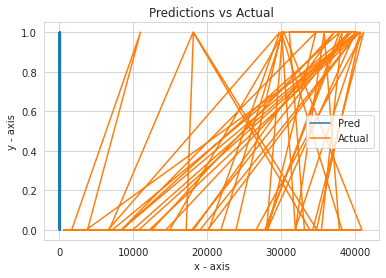

In [246]:
plt.plot(y_hat[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predictions vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Text(0.5, 0, 'False Positive Rate(1-Specificity)')

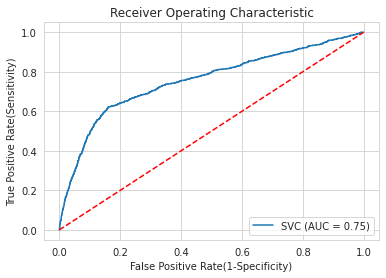

In [247]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(svc, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

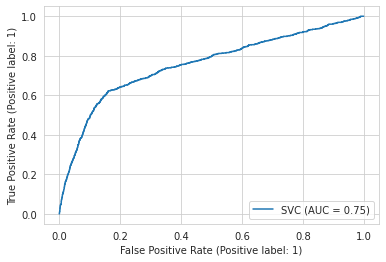

In [248]:
# for models evalution
SVMB_AUC = metrics.plot_roc_curve(svc, X_test, y_test)

####**Confusion Matrix**

In [249]:
predictS = predictions 

SVM  Model
[[6277  985]
 [ 413  560]]




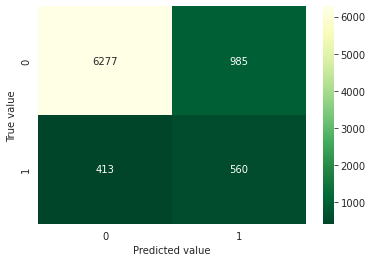

In [250]:
from sklearn.metrics import confusion_matrix
print("SVM  Model")
cmsb_matrix = confusion_matrix(y_test, predictS)
print(cmsb_matrix)
print('\n')

cmsb_matrix = confusion_matrix(y_test, predictS)
sns.heatmap(cmsb_matrix,annot=True, cmap="YlGn_r", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


The above confusion matrix shows that there are 705 true positives and 268 false negatives. The number of false positives are 1977 and true negatives are 5285.

####**Model Evaluation**

In [251]:
from sklearn.metrics import classification_report
print("SVM Model")
print(classification_report(y_test, predictions))
print(cmsb_matrix)
print('\n')
tn, fp, fn, tp=cmsb_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

SVM Model
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7262
           1       0.36      0.58      0.44       973

    accuracy                           0.83      8235
   macro avg       0.65      0.72      0.67      8235
weighted avg       0.87      0.83      0.85      8235

[[6277  985]
 [ 413  560]]


TP:  560 , FP:  985 , TN:  6277 , FN: 413


In [252]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predictS))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictS))
print(f"Precision: ",metrics.precision_score(y_test,predictS))
print(f"Recall: ",metrics.recall_score(y_test, predictS))
print(f"f1 Score: ",metrics.f1_score(y_test, predictS))
print("Training set score: %f" % svc.score(X_train, y_train))
print("Test set score: %f" % svc.score(X_test, y_test))
print("MSE: %f" % mean_squared_error(y_test, predictS))
SVMfpr, SVMtpr, _ = metrics.roc_curve(y_test, predictS)

ROC_AUC:  0.7199510014681727
Accuracy:  0.8302367941712204
Precision:  0.36245954692556637
Recall:  0.5755395683453237
f1 Score:  0.4447974583002383
Training set score: 0.810105
Test set score: 0.830237
MSE: 0.169763


In [253]:
#for final models copmarison
svmB_acc = metrics.accuracy_score(y_test, predictS)
svmB_prec = metrics.precision_score(y_test, predictS)
svmB_rec = metrics.recall_score(y_test, predictS)
svmB_f1 =metrics.f1_score(y_test, predictS)

###**Random Forest**

In [254]:
#see the classification performance of the Random Forest using  all 15 features 
# To improve the results of RF I tested n_estimators for 40,50,100,200,10000 
#with max_depth of 2, 3 and 4
from time import time

start = time() 

FullRandFor = RandomForestClassifier(n_estimators=50, random_state=43, max_depth=3)
FullRandFor.fit(X_train, y_train)

fulltrainpred = FullRandFor.predict_proba(X_train)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, fulltrainpred[:,1])))

fulltestpred = FullRandFor.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, fulltestpred[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8326834845636474
Accuracy on test set: 0.7806368903382233
Time taken tor run:1.1493096351623535 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

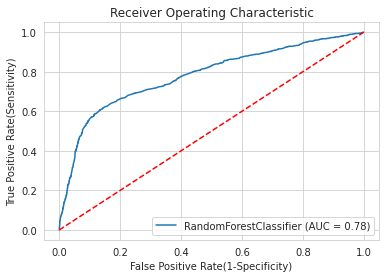

In [255]:
# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(FullRandFor, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

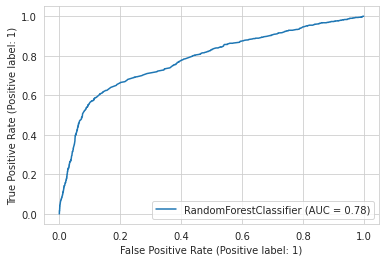

In [256]:
# for models evalution
rfB_AUC = metrics.plot_roc_curve(FullRandFor, X_test, y_test)

####**Confusion Matric**

In [257]:
predictR = FullRandFor.predict(X_test)

Random Forest


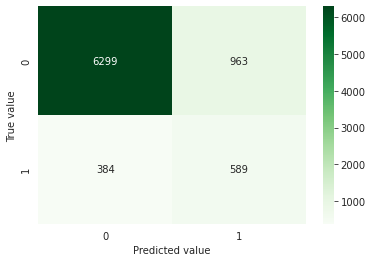

In [258]:
print("Random Forest")
from sklearn.metrics import confusion_matrix
cnr_matrix = confusion_matrix(y_test, predictR)

sns.heatmap(cnr_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

####**Model Evaluation**

In [259]:
print("Random Forest")
cm = confusion_matrix(y_test, predictR)
print(cm)
print('\n')
print(classification_report(y_test,predictR))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forest
[[6299  963]
 [ 384  589]]


              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7262
           1       0.38      0.61      0.47       973

    accuracy                           0.84      8235
   macro avg       0.66      0.74      0.68      8235
weighted avg       0.88      0.84      0.85      8235

TP:  589 , FP:  963 , TN:  6299 , FN: 384


In [260]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predictR))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictR))
print(f"Precision: ",metrics.precision_score(y_test,predictR))
print(f"Recall: ",metrics.recall_score(y_test, predictR))
print(f"f1 Score: ",metrics.f1_score(y_test, predictR))
print("Training set score: %f" % FullRandFor.score(X_train, y_train))
print("Test set score: %f" % FullRandFor.score(X_test, y_test))
print("MSE: %f" % mean_squared_error(y_test, predictR))
RFfpr, RFtpr, _ = metrics.roc_curve(y_test, predictR)

ROC_AUC:  0.7363680995243935
Accuracy:  0.8364298724954463
Precision:  0.3795103092783505
Recall:  0.605344295991778
f1 Score:  0.4665346534653465
Training set score: 0.757174
Test set score: 0.836430
MSE: 0.163570


In [261]:
#for final models copmarison
rfB_acc = metrics.accuracy_score(y_test, predictR)
rfB_prec = metrics.precision_score(y_test, predictR)
rfB_rec = metrics.recall_score(y_test, predictR)
rfB_f1 =metrics.f1_score(y_test, predictR)

Feature Selection

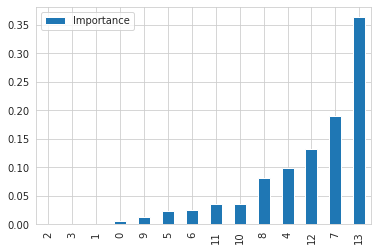

In [262]:
importances = FullRandFor.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(X_train).columns, "Importance":importances})

final_df = final_df.sort_values('Importance')

final_df.plot.bar()

In [263]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [264]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.076 seconds


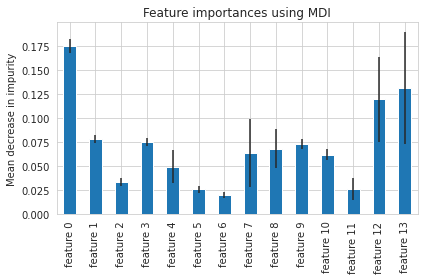

In [265]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

###**XGBoost**

In [266]:
#see the classification performance of the XGBoost 
from time import time

start = time() 
xgboost1 = XGBClassifier(max_depth=11, 
                            learning_rate=0.1, 
                            n_estimators=70, 
                            min_child_weight=2, 
                            subsample=0.5, 
                            n_jobs=-1)
y_pred = xgboost1.fit(X_train, y_train).predict(X_test)

trainpredB = xgboost1.predict_proba(X_train)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, trainpredB[:,1])))

testpredB = xgboost1.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, testpredB[:,1])))


print(f'Time taken tor run:{time() - start} seconds')


Accuracy on training set: 0.9709840410485036
Accuracy on test set: 0.755370209085122
Time taken tor run:10.187673330307007 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

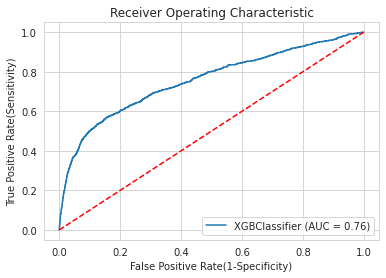

In [267]:
# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(xgboost1, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')


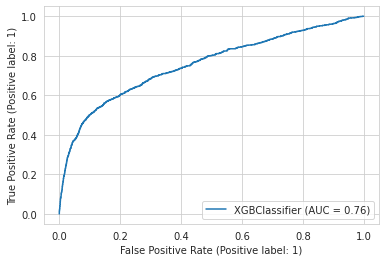

In [268]:
# for models evalution
XGBB_AUC = metrics.plot_roc_curve(xgboost1, X_test, y_test)
 # Calculate area under curve (AUC)
#y_pred_proba = model.predict(X_test)
#XGBoostfpr, XGBoosttpr, _ = metrics.roc_curve(y_test, y_pred)
#print(XGBoostfpr)
#print(XGBoosttpr)
#auc = metrics.roc_auc_score(y_test, y_pred)
#XGBB_AUC = metrics.roc_score( X_test, y_pred)
#fpr, tpr,_=metrics.roc.curve(y_test, y_pred)



####**Confusion Matric**

In [269]:
predictX = y_pred

XGBOOST
[[6599  663]
 [ 498  475]]


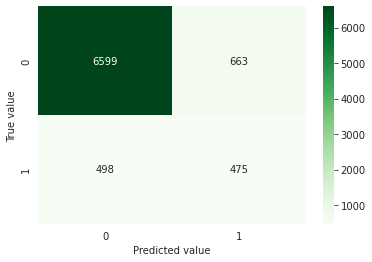

In [270]:
print("XGBOOST")
cmxg_matrix = confusion_matrix(y_test, predictX)
print(cmxg_matrix)
sns.heatmap(cmxg_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

####**Model Evaluation**

In [271]:
print("XGBOOST")
print(classification_report(y_test, predictX))
tn, fp, fn, tp=cmxg_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

XGBOOST
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7262
           1       0.42      0.49      0.45       973

    accuracy                           0.86      8235
   macro avg       0.67      0.70      0.68      8235
weighted avg       0.87      0.86      0.86      8235

TP:  475 , FP:  663 , TN:  6599 , FN: 498


In [272]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("XGBOOST")
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predictX))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictX))
print(f"Precision: ",metrics.precision_score(y_test,predictX))
print(f"Recall: ",metrics.recall_score(y_test, predictX))
print(f"f1 Score: ",metrics.f1_score(y_test, predictX))
print("Training set score: %f" % xgboost1.score(X_train, y_train))
print("Test set score: %f" % xgboost1.score(X_test, y_test))
print("MSE: %f" % mean_squared_error(y_test, predictX))
XGBfpr, XGBtpr, _ = metrics.roc_curve(y_test, predictX)



XGBOOST
ROC_AUC:  0.6984418602742231
Accuracy:  0.8590163934426229
Precision:  0.4173989455184534
Recall:  0.4881808838643371
f1 Score:  0.4500236854571293
Training set score: 0.906675
Test set score: 0.859016
MSE: 0.140984


In [273]:
#for final models copmarison
XGBB_acc = metrics.accuracy_score(y_test, predictX)
XGBB_prec = metrics.precision_score(y_test, predictX)
XGBB_rec = metrics.recall_score(y_test, predictX)
XGBB_f1 =metrics.f1_score(y_test, predictX)

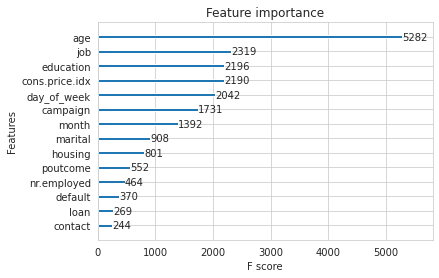

In [274]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgboost1)
plt.show()

##**Overall Baseline Model Comparison**

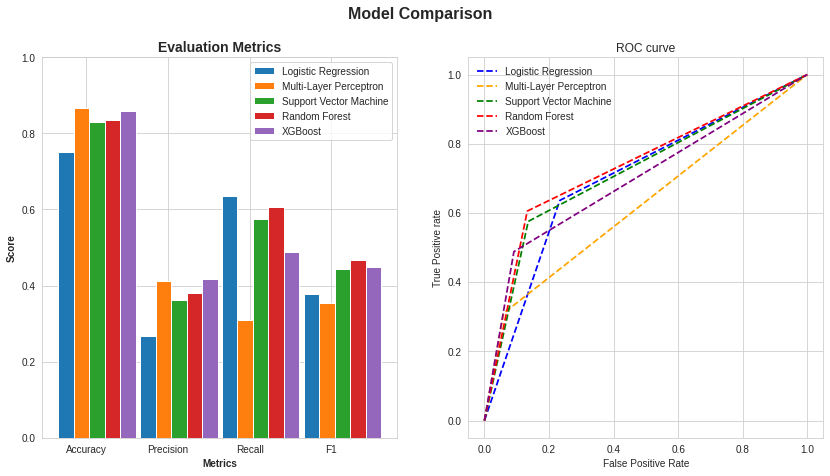

In [275]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.19
lrB_score = [lrB_acc, lrB_prec, lrB_rec, lrB_f1]
mlpB_score = [mlpB_acc, mlpB_prec, mlpB_rec, mlpB_f1]
svmB_score = [svmB_acc, svmB_prec, svmB_rec, svmB_f1]
rfB_score = [rfB_acc, rfB_prec, rfB_rec, rfB_f1]
XGBB_score = [XGBB_acc, XGBB_prec, XGBB_rec, XGBB_f1]

## Set position of bar on X axis
r1 = np.arange(len(lrB_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, lrB_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, mlpB_score, width=barWidth, edgecolor='white', label='Multi-Layer Perceptron')
ax1.bar(r3, svmB_score, width=barWidth, edgecolor='white', label='Support Vector Machine')
ax1.bar(r4, rfB_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, XGBB_score, width=barWidth, edgecolor='white', label='XGBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.3) for r in range(len(lrB_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(LRfpr, LRtpr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(MLPfpr, MLPtpr, linestyle='--',color='orange', label='Multi-Layer Perceptron')
plt.plot(SVMfpr, SVMtpr, linestyle='--',color='green', label='Support Vector Machine')
plt.plot(RFfpr, RFtpr, linestyle='--',color='red', label='Random Forest')
plt.plot(XGBfpr, XGBtpr, linestyle='--',color='purple', label='XGBoost')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
## Comparing ROC Curve
#ax2.plot(lrB_AUC['fpr'], lrB_AUC['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lrB_AUC))
#ax2.plot(mlpB_AUC['fpr'], mlpB_AUC['tpr'], label='Multi-Layer Perceptron, auc = {:0.5f}'.format(mlpB_AUC))
#ax2.plot(SVMB_AUC['fpr'], SVMB_AUC['tpr'], label='Support Vector Machine , auc = {:0.5f}'.format(SVMB_AUC))
#ax2.plot(rfB_AUC['fpr'], rfB_AUC['tpr'], label='Random Forest, auc = {:0.5f}'.format(rfB_AUC))
#ax2.plot(LRfpr, LRtpr, linestyle='--',color='blue', label='Logistic Regression')
#ax2.plot(MLPfpr, MLPtpr, linestyle='--',color='orange', label='Multi-Layer Perceptron')
#ax2.plot(SVMfpr, SVMtpr, linestyle='--',color='green', label='Support Vector Machine')
#ax2.plot(RFfpr, RFtpr, linestyle='--',color='red', label='Random Forest')
#ax2.plot(XGBfpr, XGBtpr, linestyle='--',color='purple', label='XGBoost')

# Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

#**Clasification with Filter Methods for Feature Selection-Mutual Information Gain**

In [276]:
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
MI=mutual_info_classif(X_train, y_train)


In [277]:
len(MI)

14

In [278]:
MI = pd.Series(MI)
MI.index = X_train.columns

In [279]:
MI.sort_values(ascending=False, inplace = True)

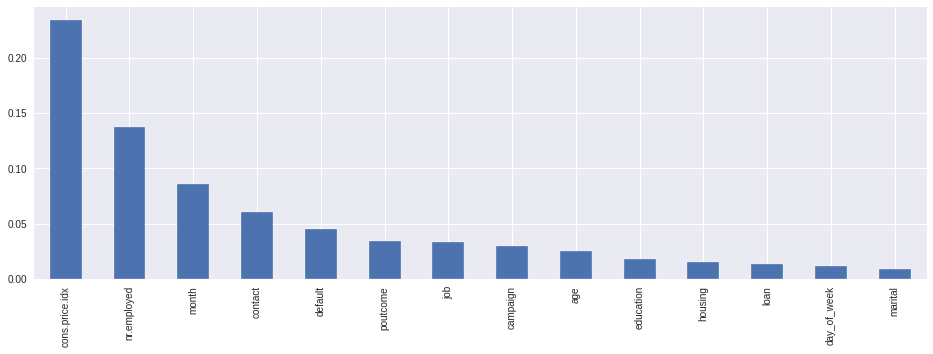

In [280]:
MI.plot.bar(figsize = (16,5))

In [281]:
#percentile=65
sel = SelectPercentile(mutual_info_classif, percentile=65).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['age', 'job', 'default', 'contact', 'month', 'campaign', 'poutcome',
       'cons.price.idx', 'nr.employed'],
      dtype='object')

In [282]:
len(X_train.columns[sel.get_support()])

9

In [283]:
X_trainMI = sel.transform(X_train)
X_testMI = sel.transform(X_test)

In [284]:
X_trainMI.shape

(58548, 9)

In [285]:
X_testMI.shape

(8235, 9)

In [286]:
X_trainMI

array([[4.30000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+00, 9.44650000e+01, 5.22810000e+03],
       [3.00000000e+01, 7.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.32000000e+01, 5.19580000e+03],
       [3.70000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.30750000e+01, 5.09910000e+03],
       ...,
       [3.80000000e+01, 8.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.39940000e+01, 5.19100000e+03],
       [3.30000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.34440000e+01, 5.22810000e+03],
       [3.50000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.40684284e+01, 4.99160000e+03]])

##**Logistic Regression**

In [287]:
from time import time
start = time() 

LRMI = LogisticRegression (solver='liblinear')
LRMI.fit(X_trainMI, y_train)

LRtrain_predMI = LRMI.predict_proba(X_trainMI)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, LRtrain_predMI[:,1])))

LRtest_predMI = LRMI.predict_proba(X_testMI)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, LRtest_predMI[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8013120978990796
Accuracy on test set: 0.7753639791868752
Time taken tor run:0.4373958110809326 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

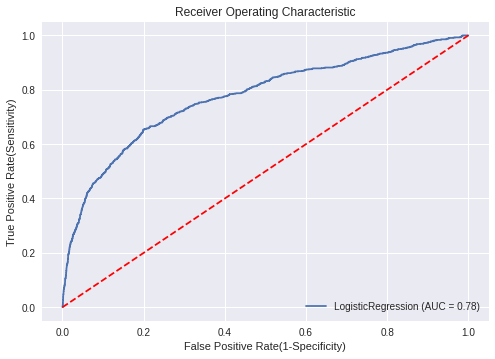

In [288]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(LRMI, X_testMI, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [289]:
predMI01 = LRMI.predict(X_testMI)

Logistic Regression Model - Confusion Matrix
[[5651 1611]
 [ 325  648]]




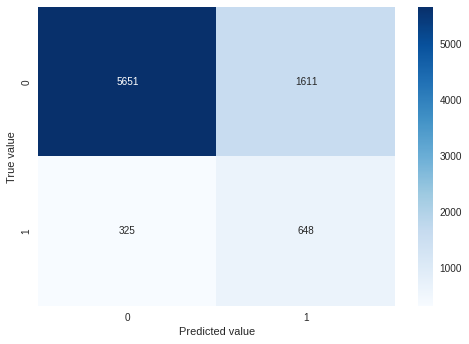

In [290]:
print("Logistic Regression Model - Confusion Matrix")
cmlrmi = confusion_matrix(y_test, predMI01)
print(cmlrmi)
print('\n')

sns.heatmap(cmlrmi,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

###**Model Evaluation**

In [291]:
print(classification_report(y_test, predMI01))
tn, fp, fn, tp=cmlrmi.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      7262
           1       0.29      0.67      0.40       973

    accuracy                           0.76      8235
   macro avg       0.62      0.72      0.63      8235
weighted avg       0.87      0.76      0.80      8235

TP:  648 , FP:  1611 , TN:  5651 , FN: 325


In [292]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predMI01))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predMI01))
print(f"Precision: ",metrics.precision_score(y_test, predMI01))
print(f"Recall: ",metrics.recall_score(y_test, predMI01))
print(f"f1 Score: ",metrics.f1_score(y_test, predMI01))
#print("Training error: %f" % LR01.loss_curve_[-1])
print("Training set score: %f" % LRMI.score(X_trainMI, y_train))
print("Test set score: %f" % LRMI.score(X_testMI, y_test))
print("MSE: %f" % mean_squared_error(y_test, predMI01))
LRMIfpr, LRMItpr, _ = metrics.roc_curve(y_test, predMI01)

ROC_AUC:  0.7220708934681739
Accuracy:  0.7649058894960534
Precision:  0.2868525896414343
Recall:  0.6659815005138746
f1 Score:  0.400990099009901
Training set score: 0.738369
Test set score: 0.764906
MSE: 0.235094


In [293]:
#for final models copmarison
LRMI_acc = metrics.accuracy_score(y_test, predMI01)
LRMI_prec = metrics.precision_score(y_test, predMI01)
LRMI_rec = metrics.recall_score(y_test, predMI01)
LRMI_f1 =metrics.f1_score(y_test, predMI01)


##**MLP Model**

In [294]:
from sklearn.neural_network import MLPClassifier 
from time import time

start = time() 

# define and train an MLPClassifier named mlp on the given data
mlpMI = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlpMI.fit(X_trainMI, y_train)

mlptrain_predMI = mlpMI.predict_proba(X_trainMI)

print('Accuracy on training set: {}'.format(roc_auc_score(y_train, mlptrain_predMI[:,1])))

mlptest_pred03 = mlpMI.predict_proba(X_testMI)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, mlptest_pred03[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8017077892966802
Accuracy on test set: 0.7534677691218391
Time taken tor run:319.48352885246277 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

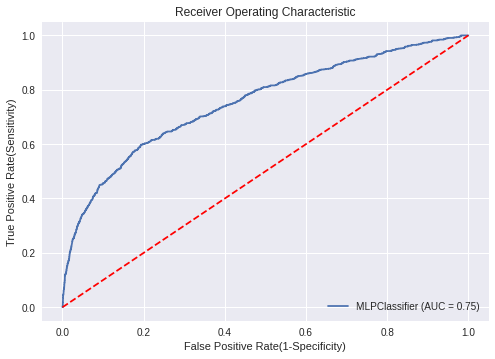

In [295]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
#metrics.plot_roc_curve(mlp01, PCA_X_test, y_test)
metrics.plot_roc_curve(mlpMI, X_testMI, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [296]:
pred03MI = mlpMI.predict(X_testMI)

MLP  Model
[[5917 1345]
 [ 408  565]]




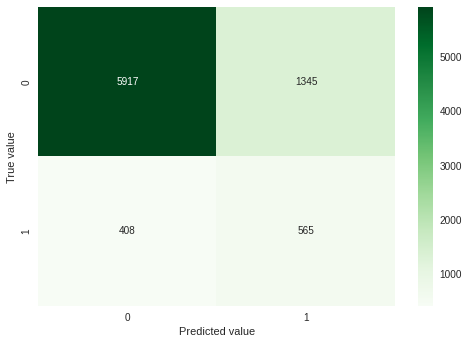

In [297]:
from sklearn.metrics import confusion_matrix
print("MLP  Model")
cm_MLPMI = confusion_matrix(y_test, pred03MI)
print(cm_MLPMI)
print('\n')

sns.heatmap(cm_MLPMI,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


###**Model Evaluation**

In [298]:
print(classification_report(y_test,pred03MI))
tn, fp, fn, tp=cm_MLPMI.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7262
           1       0.30      0.58      0.39       973

    accuracy                           0.79      8235
   macro avg       0.62      0.70      0.63      8235
weighted avg       0.86      0.79      0.81      8235

TP:  565 , FP:  1345 , TN:  5917 , FN: 408


In [299]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  pred03MI))
print(f"Accuracy: ", metrics.accuracy_score(y_test, pred03MI))
print(f"Precision: ",metrics.precision_score(y_test, pred03MI))
print(f"Recall: ",metrics.recall_score(y_test, pred03MI))
print(f"f1 Score: ",metrics.f1_score(y_test, pred03MI))
print(f"Training error: %f" % mlp01.loss_curve_[-1])
print(f"Training set score: %f" % mlpMI.score(X_trainMI, y_train))
print(f"Test set score: %f" % mlpMI.score(X_testMI, y_test))
print(f"MSE: %f" % mean_squared_error(y_test, pred03MI))
MLPMIfpr, MLPMItpr, _ = metrics.roc_curve(y_test, pred03MI)

ROC_AUC:  0.6977338143648829
Accuracy:  0.7871281117182757
Precision:  0.29581151832460734
Recall:  0.5806783144912642
f1 Score:  0.39195282691640654
Training error: 0.531662
Training set score: 0.731776
Test set score: 0.787128
MSE: 0.212872


In [300]:
#for final models copmarison
MLPMI_acc = metrics.accuracy_score(y_test, pred03MI)
MLPMI_prec = metrics.precision_score(y_test, pred03MI)
MLPMI_rec = metrics.recall_score(y_test, pred03MI)
MLPMI_f1 =metrics.f1_score(y_test, pred03MI)

##**SVM Model**

In [301]:
from sklearn import svm
# we create an instance of SVM and fit out data.
from time import time

start = time() 
svcMI = svm.SVC(kernel='rbf', C=0.1, gamma=0.1).fit(X_trainMI,y_train)


print(f'Time taken tor run:{time() - start} seconds')

Time taken tor run:232.393780708313 seconds


In [302]:
predictionsMI = svcMI.predict(X_testMI)
y_hatMI = pd.DataFrame(predictionsMI, columns=["Predicted y"])

#svcMItrain_pred03 = svcMI.predict_proba(X_trainMI)
#print('Accuracy on training set: {}'.format(roc_auc_score(y_train, svctrain_pred03[:,1])))
#svcMItest_pred03 = svcMI.predict_proba(X_testMI)
#print('Accuracy on test set: {}'.format(roc_auc_score(y_test, svctest_pred03[:,1])))

*   Accuracy on training set: 0.9038707824289857
*   Accuracy on test set: 0.7548124619476626

####**Confusion Matrix**

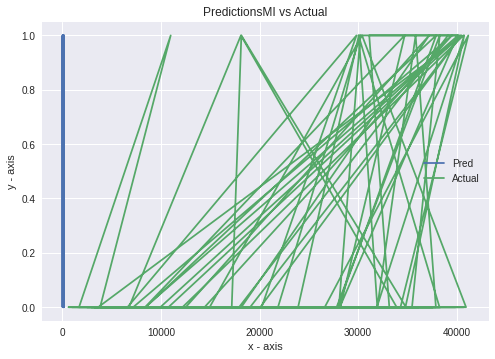

In [303]:
plt.plot(y_hatMI[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('PredictionsMI vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Text(0.5, 0, 'False Positive Rate(1-Specificity)')

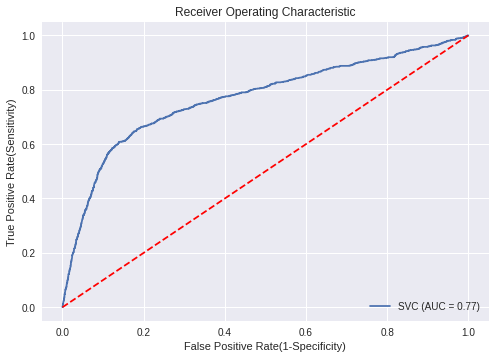

In [304]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(svcMI, X_testMI, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

###**Model Evaluation**

In [305]:
predictSMI = predictionsMI 

SVM  Model
[[6189 1073]
 [ 380  593]]




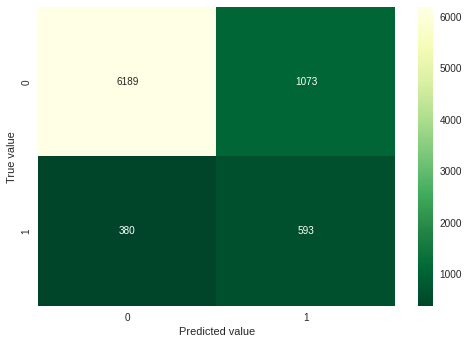

In [306]:
from sklearn.metrics import confusion_matrix
print("SVM  Model")
cmsmi_matrix = confusion_matrix(y_test, predictSMI)
print(cmsmi_matrix)
print('\n')

cmsmi_matrix = confusion_matrix(y_test, predictSMI)
sns.heatmap(cmsmi_matrix,annot=True, cmap="YlGn_r", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [307]:
from sklearn.metrics import classification_report
print("SVM Model")
print(classification_report(y_test, predictSMI))
print(cmsmi_matrix)
print('\n')
tn, fp, fn, tp=cmsmi_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

SVM Model
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7262
           1       0.36      0.61      0.45       973

    accuracy                           0.82      8235
   macro avg       0.65      0.73      0.67      8235
weighted avg       0.87      0.82      0.84      8235

[[6189 1073]
 [ 380  593]]


TP:  593 , FP:  1073 , TN:  6189 , FN: 380


In [308]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predictSMI))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictSMI))
print(f"Precision: ",metrics.precision_score(y_test,predictSMI))
print(f"Recall: ",metrics.recall_score(y_test, predictSMI))
print(f"f1 Score: ",metrics.f1_score(y_test, predictSMI))
print("Training set score: %f" % svcMI.score(X_trainMI, y_train))
print("Test set score: %f" % svcMI.score(X_testMI, y_test))
print("MSE: %f" % mean_squared_error(y_test, predictSMI))
SVMMIfpr, SVMMItpr, _ = metrics.roc_curve(y_test, predictSMI)

ROC_AUC:  0.7308499268178015
Accuracy:  0.823557984213722
Precision:  0.3559423769507803
Recall:  0.6094552929085303
f1 Score:  0.449412656309208
Training set score: 0.767251
Test set score: 0.823558
MSE: 0.176442


In [309]:
#for final models copmarison
SVMMI_acc = metrics.accuracy_score(y_test, predictS)
SVMMI_prec = metrics.precision_score(y_test, predictS)
SVMMI_rec = metrics.recall_score(y_test, predictS)
SVMMI_f1 =metrics.f1_score(y_test, predictS)

##**Random Forest**

In [310]:
start = time() 
RandFor1 = RandomForestClassifier(n_estimators=50, random_state=41, max_depth=3)
RandFor1.fit(X_trainMI, y_train)

trainpredRF1 = RandFor1.predict_proba(X_trainMI)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, trainpredRF1[:,1])))

testpredRF1 = RandFor1.predict_proba(X_testMI)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, testpredRF1[:,1])))
print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8232863790907178
Accuracy on test set: 0.781963538819965
Time taken tor run:1.1776576042175293 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

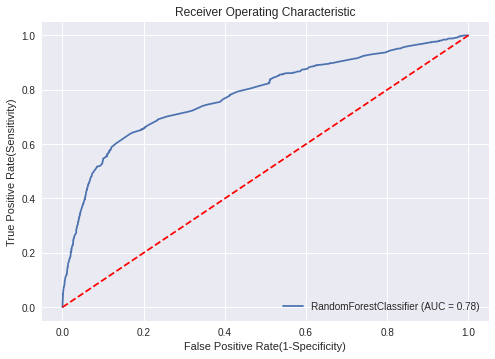

In [311]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(RandFor1,X_testMI,y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [312]:
predRMI = RandFor1.predict(X_testMI)

Random Forest


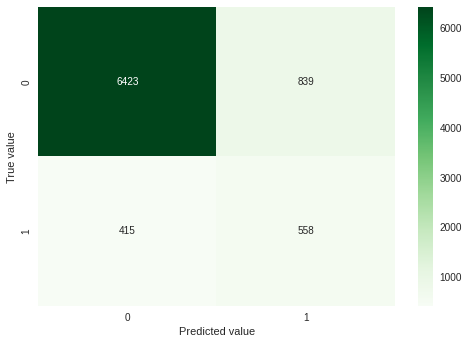

In [313]:
print("Random Forest")
from sklearn.metrics import confusion_matrix
cmrmi_matrix = confusion_matrix(y_test, predRMI)

sns.heatmap(cmrmi_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

###**Model Evaluation**

In [314]:
print("Random Forest")
cmrmi_matrix = confusion_matrix(y_test, predRMI)
print(cmrmi_matrix)
print('\n')
print(classification_report(y_test,predRMI))
tn, fp, fn, tp=cmrmi_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forest
[[6423  839]
 [ 415  558]]


              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7262
           1       0.40      0.57      0.47       973

    accuracy                           0.85      8235
   macro avg       0.67      0.73      0.69      8235
weighted avg       0.88      0.85      0.86      8235

TP:  558 , FP:  839 , TN:  6423 , FN: 415


In [315]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predRMI))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predRMI))
print(f"Precision: ",metrics.precision_score(y_test,predRMI))
print(f"Recall: ",metrics.recall_score(y_test, predRMI))
print(f"f1 Score: ",metrics.f1_score(y_test, predRMI))
print("Training set score: %f" % RandFor1.score(X_trainMI, y_train))
print("Test set score: %f" % RandFor1.score(X_testMI, y_test))
print("MSE: %f" % mean_squared_error(y_test, predRMI))
RFMIfpr, RFMItpr, _ = metrics.roc_curve(y_test, predRMI)

ROC_AUC:  0.7289755794215789
Accuracy:  0.8477231329690346
Precision:  0.3994273443092341
Recall:  0.5734840698869476
f1 Score:  0.4708860759493671
Training set score: 0.754031
Test set score: 0.847723
MSE: 0.152277


In [316]:
#for final models copmarison
RFMI_acc = metrics.accuracy_score(y_test, predictR)
RFMI_prec = metrics.precision_score(y_test, predictR)
RFMI_rec = metrics.recall_score(y_test, predictR)
RFMI_f1 =metrics.f1_score(y_test, predictR)

##**XGBOOST**

In [317]:
#see the classification performance of the XGBoost 
from time import time

start = time() 
xgboostMI = XGBClassifier(max_depth=11, 
                            learning_rate=0.1, 
                            n_estimators=70, 
                            min_child_weight=2, 
                            subsample=0.5, 
                            n_jobs=-1)
y_pred = xgboostMI.fit(X_trainMI, y_train).predict(X_testMI)

trainpredXG = xgboostMI.predict_proba(X_trainMI)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, trainpredXG[:,1])))

testpredXG = xgboostMI.predict_proba(X_testMI)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, testpredXG[:,1])))


print(f'Time taken tor run:{time() - start} seconds')


Accuracy on training set: 0.9398040234628572
Accuracy on test set: 0.7606273402806654
Time taken tor run:7.8624794483184814 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

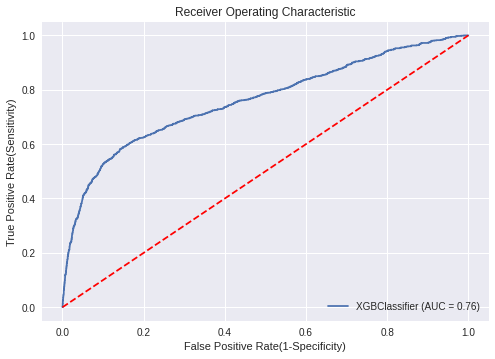

In [318]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(xgboostMI,X_testMI,y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [319]:
predictXMI = y_pred

XGBOOST
[[6577  685]
 [ 475  498]]


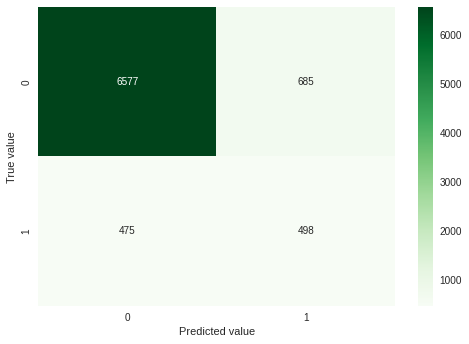

In [320]:
print("XGBOOST")
cmmix_matrix = confusion_matrix(y_test, predictXMI)
print(cmmix_matrix)
sns.heatmap(cmmix_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

###**Model Evaluation**

In [321]:
print("XGBOOST")
print(classification_report(y_test, predictXMI))
tn, fp, fn, tp=cmmix_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

XGBOOST
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7262
           1       0.42      0.51      0.46       973

    accuracy                           0.86      8235
   macro avg       0.68      0.71      0.69      8235
weighted avg       0.87      0.86      0.86      8235

TP:  498 , FP:  685 , TN:  6577 , FN: 475


In [322]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("XGBOOST")
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predictXMI))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictXMI))
print(f"Precision: ",metrics.precision_score(y_test,predictXMI))
print(f"Recall: ",metrics.recall_score(y_test, predictXMI))
print(f"f1 Score: ",metrics.f1_score(y_test, predictXMI))
print("Training set score: %f" % xgboostMI.score(X_trainMI, y_train))
print("Test set score: %f" % xgboostMI.score(X_testMI, y_test))
print("MSE: %f" % mean_squared_error(y_test, predictXMI))
XGBMIfpr, XGBMItpr, _ = metrics.roc_curve(y_test, predictXMI)


XGBOOST
ROC_AUC:  0.7087462421768923
Accuracy:  0.8591378263509412
Precision:  0.4209636517328825
Recall:  0.5118191161356629
f1 Score:  0.4619666048237477
Training set score: 0.854581
Test set score: 0.859138
MSE: 0.140862


In [323]:
#for final models copmarison
XGBMI_acc = metrics.accuracy_score(y_test, predictX)
XGBMI_prec = metrics.precision_score(y_test, predictX)
XGBMI_rec = metrics.recall_score(y_test, predictX)
XGBMI_f1 =metrics.f1_score(y_test, predictX)

##**Overall Evaluation**

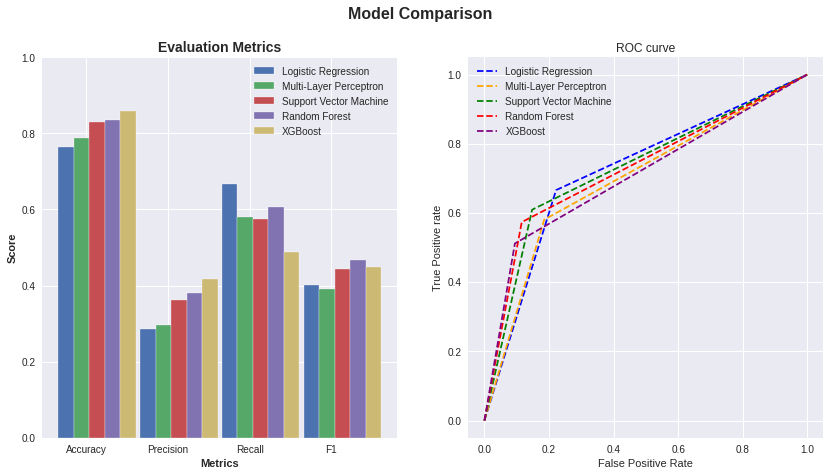

In [324]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.19
LRMI_score = [LRMI_acc, LRMI_prec, LRMI_rec, LRMI_f1]
MLPMI_score = [MLPMI_acc, MLPMI_prec, MLPMI_rec, MLPMI_f1]
SVMMI_score = [SVMMI_acc, SVMMI_prec, SVMMI_rec, SVMMI_f1]
RFMI_score = [RFMI_acc, RFMI_prec, RFMI_rec, RFMI_f1]
XGBMI_score = [XGBMI_acc, XGBMI_prec, XGBMI_rec, XGBMI_f1]

## Set position of bar on X axis
r1 = np.arange(len(LRMI_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, LRMI_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, MLPMI_score, width=barWidth, edgecolor='white', label='Multi-Layer Perceptron')
ax1.bar(r3, SVMMI_score, width=barWidth, edgecolor='white', label='Support Vector Machine')
ax1.bar(r4, RFMI_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, XGBMI_score, width=barWidth, edgecolor='white', label='XGBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.3) for r in range(len(LRMI_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(LRMIfpr, LRMItpr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(MLPMIfpr, MLPMItpr, linestyle='--',color='orange', label='Multi-Layer Perceptron')
plt.plot(SVMMIfpr, SVMMItpr, linestyle='--',color='green', label='Support Vector Machine')
plt.plot(RFMIfpr, RFMItpr, linestyle='--',color='red', label='Random Forest')
plt.plot(XGBMIfpr, XGBMItpr, linestyle='--',color='purple', label='XGBoost')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

##**Classification with Wrapper Feature Selection - Forward feature selection**

In [325]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
import joblib

In [326]:
from time import time

start = time() 

from mlxtend.feature_selection import SequentialFeatureSelector 
sfs = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=(1, 14),
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

print(f'Time taken tor run:{time() - start} seconds')

Time taken tor run:0.0010309219360351562 seconds


In [327]:
from time import time

start = time() 

sfs1 = sfs.fit(np.array(X_train.fillna(0)), y_train)

print(f'Time taken tor run:{time() - start} seconds')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  1.0min finished

[2022-04-04 15:51:52] Features: 1/14 -- score: 0.8407618280110534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  1.8min finished

[2022-04-04 15:53:40] Features: 2/14 -- score: 0.8621744640382168[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.6min finished

[2022-04-04 15:55:18] Features: 3/14 -- score: 0.8736054656718478[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Time taken tor run:1272.7949781417847 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished

[2022-04-04 16:12:02] Features: 14/14 -- score: 0.9664900916986456

In [328]:
pd.DataFrame.from_dict(sfs1 .get_metric_dict()).T

feature_idx  \
1                                            (12,)   
2                                          (4, 12)   
3                                       (3, 4, 12)   
4                                    (0, 3, 4, 12)   
5                                 (0, 1, 3, 4, 12)   
6                              (0, 1, 3, 4, 9, 12)   
7                          (0, 1, 3, 4, 9, 10, 12)   
8                       (0, 1, 3, 4, 8, 9, 10, 12)   
9                    (0, 1, 2, 3, 4, 8, 9, 10, 12)   
10                (0, 1, 2, 3, 4, 5, 8, 9, 10, 12)   
11            (0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12)   
12         (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
13     (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13)   
14  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)   

                                            cv_scores avg_score  \
1   [0.8152914234725696, 0.8496883016760766, 0.847...  0.840762   
2   [0.8256729005335691, 0.8738054943609316, 0.874...  0.862174   
3   [0.8289652370680584, 0.8894521818920015, 0.886...  0.873605   
4   [0.8552814874081883, 0.91399171985922, 0.91528...  0.899634   
5   [0.88427434000638, 0.9361402954815049, 0.93764...  0.924115   
6   [0.8981593915897856, 0.9489376599991464, 0.950...  0.937463   
7   [0.9111834252600081, 0.9591582720695249, 0.960...  0.947344   
8   [0.9180119723433201, 0.964070722194563, 0.9654...  0.952859   
9   [0.922002090647422, 0.9716839902105363, 0.9717...   0.95943   
10  [0.9237002655803328, 0.9763956391547328, 0.975...  0.963344   
11  [0.9258936567401741, 0.9776821763345418, 0.977...   0.96494   
12  [0.9250683741556874, 0.9791987526913986, 0.978...  0.965728   
13  [0.9260999377114922, 0.979717082991959, 0.9784...  0.966264   
14  [0.9243345116532083, 0.9800536000057654, 0.980...   0.96649   

                                     feature_names  ci_bound   std_dev  \
1                                            (12,)  0.023638  0.014746   
2                                          (4, 12)  0.033793  0.021081   
3                                       (3, 4, 12)  0.041365  0.025805   
4                                    (0, 3, 4, 12)  0.041056  0.025612   
5                                 (0, 1, 3, 4, 12)  0.036895  0.023017   
6                              (0, 1, 3, 4, 9, 12)  0.036421  0.022721   
7                          (0, 1, 3, 4, 9, 10, 12)  0.033498  0.020897   
8                       (0, 1, 3, 4, 8, 9, 10, 12)  0.032265  0.020128   
9                    (0, 1, 2, 3, 4, 8, 9, 10, 12)   0.03464   0.02161   
10                (0, 1, 2, 3, 4, 5, 8, 9, 10, 12)  0.036697  0.022893   
11            (0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12)  0.036149  0.022551   
12         (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)  0.037641  0.023482   
13     (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13)  0.037194  0.023203   
14  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)  0.039027  0.024346   

     std_err  
1   0.008514  
2   0.012171  
3   0.014899  
4   0.014787  
5   0.013289  
6   0.013118  
7   0.012065  
8   0.011621  
9   0.012476  
10  0.013217  
11   0.01302  
12  0.013557  
13  0.013396  
14  0.014056

In [329]:
sfs1.k_feature_names_

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13')

In [330]:
filtered_features= X_train.columns[list(sfs1.k_feature_idx_)]
filtered_features

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'poutcome',
       'cons.price.idx', 'nr.employed'],
      dtype='object')

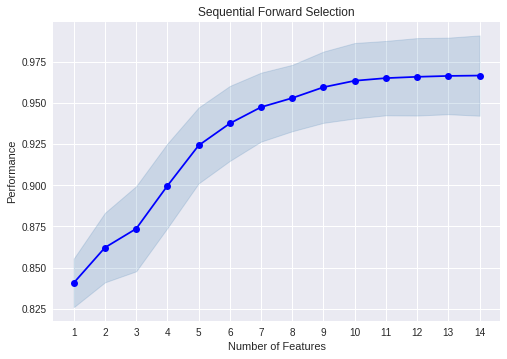

In [331]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
#plt.grid()
plt.show()

##**Logistic Regression**

In [332]:
from time import time

start = time() 

LogitRegff = LogisticRegression(solver='liblinear')
LogitRegff.fit(X_train[filtered_features], y_train)

train_predRegff = LogitRegff.predict_proba(X_train[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_predRegff[:,1])))

test_predRegff = LogitRegff.predict_proba(X_test[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_predRegff [:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8244976339091001
Accuracy on test set: 0.7530124147917768
Time taken tor run:0.5208368301391602 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

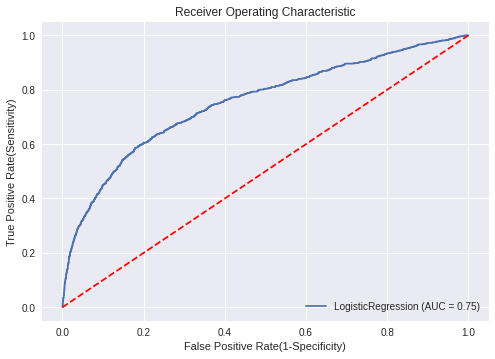

In [333]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(LogitRegff, X_test[filtered_features], y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

###**Confusion Matrix**

In [334]:
pred2FF = LogitRegff.predict(X_test[filtered_features])

Logistic Regression Model - Confusion Matrix
[[5567 1695]
 [ 354  619]]




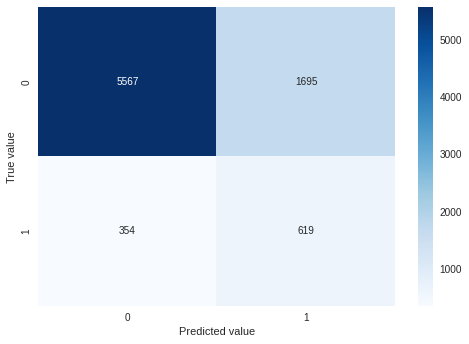

In [335]:
print("Logistic Regression Model - Confusion Matrix")
cmlrff = confusion_matrix(y_test, pred2FF)
print(cmlrff)
print('\n')

sns.heatmap(cmlrff,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

#plt.style.use('seaborn-white')
#logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)
#predict01 = logreg.fit(X_train, y_train).predict(X_test)
#cm(confusion_matrix(y_test, pred01))

###**Model Evaluation**

In [336]:
print(classification_report(y_test, pred2FF))
tn, fp, fn, tp=cmlrff.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      7262
           1       0.27      0.64      0.38       973

    accuracy                           0.75      8235
   macro avg       0.60      0.70      0.61      8235
weighted avg       0.86      0.75      0.79      8235

TP:  619 , FP:  1695 , TN:  5567 , FN: 354


In [337]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  pred2FF))
print(f"Accuracy: ", metrics.accuracy_score(y_test, pred2FF))
print(f"Precision: ",metrics.precision_score(y_test, pred2FF))
print(f"Recall: ",metrics.recall_score(y_test, pred2FF))
print(f"f1 Score: ",metrics.f1_score(y_test, pred2FF))
print("Training set score: %f" % LR01.score(X_train[filtered_features], y_train))
print("Test set score: %f" % LR01.score(X_test[filtered_features], y_test))
print("MSE: %f" % mean_squared_error(y_test, pred2FF))
LRFFfpr, LRFFtpr, _ = metrics.roc_curve(y_test, pred2FF)

ROC_AUC:  0.7013849989371528
Accuracy:  0.751183970856102
Precision:  0.26750216076058775
Recall:  0.6361767728674204
f1 Score:  0.37663522969272895
Training set score: 0.751298
Test set score: 0.751184
MSE: 0.248816


In [338]:
#for final models copmarison
LRFF_acc = metrics.accuracy_score(y_test, pred01)
LRFF_prec = metrics.precision_score(y_test, pred01)
LRFF_rec = metrics.recall_score(y_test, pred01)
LRFF_f1 =metrics.f1_score(y_test, pred01)

##**MLP**

In [339]:
from sklearn.neural_network import MLPClassifier 
from time import time

start = time() 

# define and train an MLPClassifier named mlp on the given data
mlp01FF = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
#mlp01.fit(PCA_X_train, y_train)
mlp01FF.fit(X_train[filtered_features], y_train)


#mlptrain_pred03 = mlp01.predict_proba(PCA_X_train)
mlptrain_pred03FF = mlp01.predict_proba(X_train[filtered_features])

print('Accuracy on training set: {}'.format(roc_auc_score(y_train, mlptrain_pred03FF[:,1])))

#mlptest_pred03 = mlp01.predict_proba(PCA_X_test)
mlptest_pred03FF = mlp01.predict_proba(X_test[filtered_features])
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, mlptest_pred03FF[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8199063017445491
Accuracy on test set: 0.7348977331492007
Time taken tor run:390.93331241607666 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

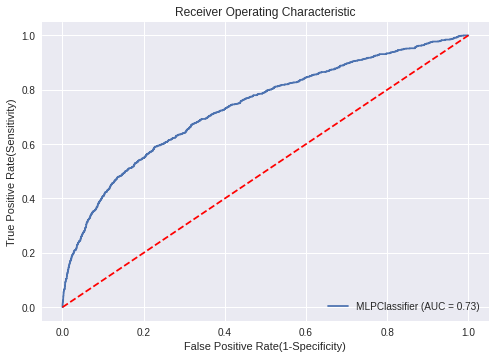

In [340]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
#metrics.plot_roc_curve(mlp01, PCA_X_test, y_test)
metrics.plot_roc_curve(mlp01FF, X_test[filtered_features], y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [341]:
pred03FF = mlp01.predict(X_test[filtered_features])

MLP  Model
[[6829  433]
 [ 671  302]]




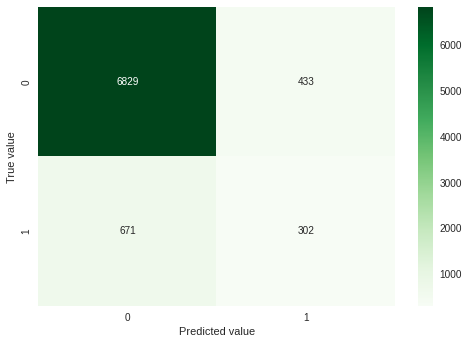

In [342]:
from sklearn.metrics import confusion_matrix
print("MLP  Model")
cm_MLPFF = confusion_matrix(y_test, pred03FF)
print(cm_MLPFF)
print('\n')

sns.heatmap(cm_MLP,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

###**Model Evaluation**

In [343]:
print(classification_report(y_test,pred03FF))
tn, fp, fn, tp=cm_MLPFF.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7262
           1       0.41      0.31      0.35       973

    accuracy                           0.87      8235
   macro avg       0.66      0.63      0.64      8235
weighted avg       0.85      0.87      0.86      8235

TP:  302 , FP:  433 , TN:  6829 , FN: 671


In [344]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  pred03FF))
print(f"Accuracy: ", metrics.accuracy_score(y_test, pred03FF))
print(f"Precision: ",metrics.precision_score(y_test, pred03FF))
print(f"Recall: ",metrics.recall_score(y_test, pred03FF))
print(f"f1 Score: ",metrics.f1_score(y_test, pred03FF))
print(f"Training error: %f" % mlp01.loss_curve_[-1])
#print(f"Training set score: %f" % mlp01.score(PCA_X_train, y_train))
print(f"Training set score: %f" % mlp01.score(X_train[filtered_features], y_train))
#print(f"Test set score: %f" % mlp01.score(PCA_test, y_test))
print(f"Test set score: %f" % mlp01.score(X_test[filtered_features], y_test))
print(f"MSE: %f" % mean_squared_error(y_test, pred03FF))
MLPFFfpr, MLPFFtpr, _ = metrics.roc_curve(y_test, pred03FF)
#print(scores1.mean())

ROC_AUC:  0.6253774098398426
Accuracy:  0.8659380692167578
Precision:  0.4108843537414966
Recall:  0.3103802672147996
f1 Score:  0.3536299765807962
Training error: 0.531662
Training set score: 0.687214
Test set score: 0.865938
MSE: 0.134062


In [345]:
#for final models copmarison
MLPFF_acc = metrics.accuracy_score(y_test, pred03FF)
MLPFF_prec = metrics.precision_score(y_test, pred03FF)
MLPFF_rec = metrics.recall_score(y_test, pred03FF)
MLPFF_f1 =metrics.f1_score(y_test, pred03FF)

##**SVM Model**

In [346]:
from sklearn import svm
# we create an instance of SVM and fit out data.
from time import time

start = time() 
svcff = svm.SVC(kernel='rbf', C=0.1, gamma=0.1).fit(X_train[filtered_features],y_train)


print(f'Time taken tor run:{time() - start} seconds')

Time taken tor run:290.4643642902374 seconds


In [347]:
predictionsff = svcff.predict(X_test[filtered_features])
y_hatFF = pd.DataFrame(predictionsff, columns=["Predicted y"])


#svcfftrain_pred03 = svcff.predict_proba(X_train[filtered_features])
#print('Accuracy on training set: {}'.format(roc_auc_score(y_train, svcfftrain_pred03[:,1])))
#svcfftest_pred03 = svcff.predict_proba(X_test[filtered_features])
#print('Accuracy on test set: {}'.format(roc_auc_score(y_test, svcfftest_pred03[:,1])))


*  Accuracy on training set: 0.9038713378762291
*  Accuracy on test set: 0.7548113297535242

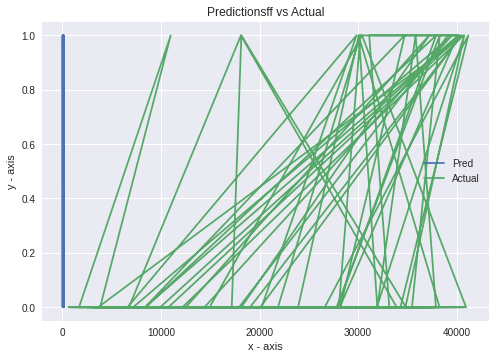

In [348]:
plt.plot(y_hatFF[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predictionsff vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Text(0.5, 0, 'False Positive Rate(1-Specificity)')

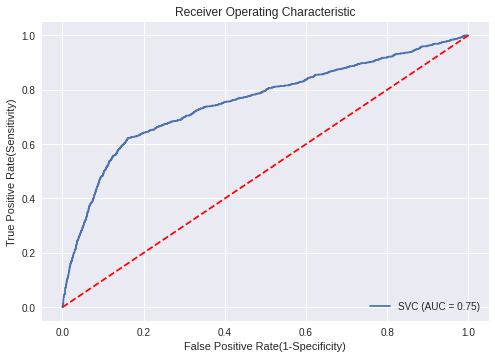

In [349]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(svcff, X_test[filtered_features], y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [350]:
predictSFF = predictionsff 

SVM  Model
[[6277  985]
 [ 413  560]]




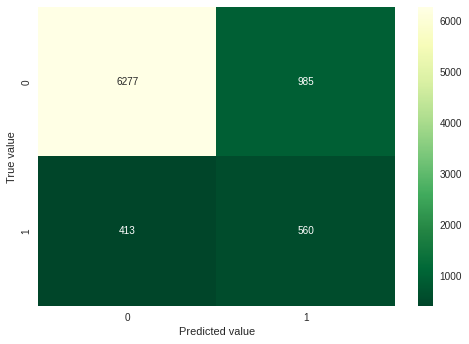

In [351]:
from sklearn.metrics import confusion_matrix
print("SVM  Model")
cmsff_matrix = confusion_matrix(y_test, predictSFF)
print(cmsff_matrix )
print('\n')

cmsff_matrix  = confusion_matrix(y_test, predictSFF)
sns.heatmap(cmsff_matrix ,annot=True, cmap="YlGn_r", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


###**Model Evaluation**

In [352]:
from sklearn.metrics import classification_report
print("SVM Model")
print(classification_report(y_test, predictSFF))
print(cmsff_matrix)
print('\n')
tn, fp, fn, tp=cmsff_matrix .ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

SVM Model
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7262
           1       0.36      0.58      0.44       973

    accuracy                           0.83      8235
   macro avg       0.65      0.72      0.67      8235
weighted avg       0.87      0.83      0.85      8235

[[6277  985]
 [ 413  560]]


TP:  560 , FP:  985 , TN:  6277 , FN: 413


In [353]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predictSFF))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictSFF))
print(f"Precision: ",metrics.precision_score(y_test,predictSFF))
print(f"Recall: ",metrics.recall_score(y_test, predictSFF))
print(f"f1 Score: ",metrics.f1_score(y_test, predictSFF))
print("Training set score: %f" % svcff.score(X_train[filtered_features], y_train))
print("Test set score: %f" % svcff.score(X_test[filtered_features], y_test))
print("MSE: %f" % mean_squared_error(y_test, predictSFF))
SVMFFfpr, SVMFFtpr, _ = metrics.roc_curve(y_test, predictSFF)

ROC_AUC:  0.7199510014681727
Accuracy:  0.8302367941712204
Precision:  0.36245954692556637
Recall:  0.5755395683453237
f1 Score:  0.4447974583002383
Training set score: 0.810105
Test set score: 0.830237
MSE: 0.169763


In [354]:
#for final models copmarison
SVMFF_acc = metrics.accuracy_score(y_test, predictSFF)
SVMFF_prec = metrics.precision_score(y_test, predictSFF)
SVMFF_rec = metrics.recall_score(y_test, predictSFF)
SVMFF_f1 =metrics.f1_score(y_test, predictSFF)

##**Random Forest**

In [355]:
from time import time

start = time() 

RandFor1 = RandomForestClassifier(n_estimators=50, random_state=41, max_depth=3)
RandFor1.fit(X_train[filtered_features], y_train)

trainpredRF1 = RandFor1.predict_proba(X_train[filtered_features])
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, trainpredRF1[:,1])))

testpredRF1 = RandFor1.predict_proba(X_test[filtered_features])
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, testpredRF1[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8344081698419882
Accuracy on test set: 0.7777720145951147
Time taken tor run:1.2310187816619873 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

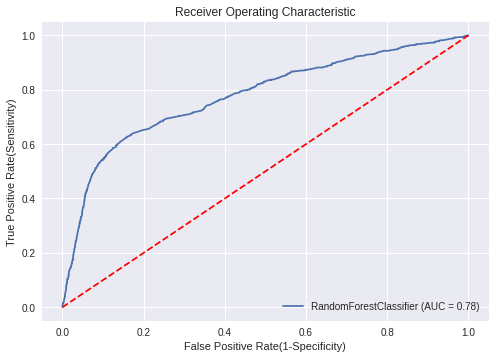

In [356]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(RandFor1,X_test[filtered_features],y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [357]:
predRFF = RandFor1.predict(X_test[filtered_features])

Random Forest


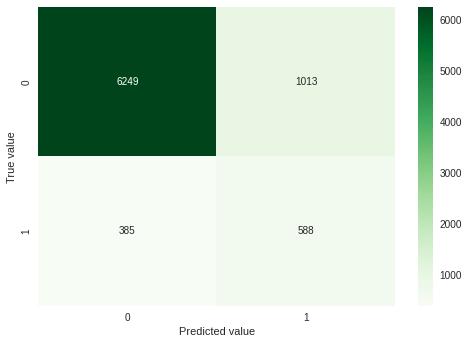

In [358]:
print("Random Forest")
from sklearn.metrics import confusion_matrix
cnr_matrix = confusion_matrix(y_test, predRFF)

sns.heatmap(cnr_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

###**Model Evaluation**

In [359]:
print("RandomForest with Mutual Information Gain")
cm = confusion_matrix(y_test, predRFF)
print(cm)
print('\n')
print(classification_report(y_test,predRFF))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

RandomForest with Mutual Information Gain
[[6249 1013]
 [ 385  588]]


              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7262
           1       0.37      0.60      0.46       973

    accuracy                           0.83      8235
   macro avg       0.65      0.73      0.68      8235
weighted avg       0.87      0.83      0.85      8235

TP:  588 , FP:  1013 , TN:  6249 , FN: 385


In [360]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predRFF))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predRFF))
print(f"Precision: ",metrics.precision_score(y_test,predRFF))
print(f"Recall: ",metrics.recall_score(y_test, predRFF))
print(f"f1 Score: ",metrics.f1_score(y_test, predRFF))
print("Training set score: %f" % FullRandFor.score(X_train[filtered_features], y_train))
print("Test set score: %f" % FullRandFor.score(X_test[filtered_features], y_test))
print("MSE: %f" % mean_squared_error(y_test, predRFF))
RFFFfpr, RFFFtpr, _ = metrics.roc_curve(y_test, predRFF)

ROC_AUC:  0.7324116471075413
Accuracy:  0.8302367941712204
Precision:  0.36727045596502184
Recall:  0.60431654676259
f1 Score:  0.45687645687645684
Training set score: 0.757174
Test set score: 0.836430
MSE: 0.169763


In [361]:
#for final models copmarison
RFFF_acc = metrics.accuracy_score(y_test, predRFF)
RFFF_prec = metrics.precision_score(y_test, predRFF)
RFFF_rec = metrics.recall_score(y_test, predRFF)
RFFF_f1 =metrics.f1_score(y_test, predRFF)

##**XGBOOST**

In [362]:
from time import time

start = time() 

xgboost1FF = XGBClassifier(max_depth=11, 
                            learning_rate=0.1, 
                            n_estimators=70, 
                            min_child_weight=2, 
                            subsample=0.5, 
                            n_jobs=-1)
y_predFF = xgboost1FF.fit(X_train[filtered_features], y_train).predict(X_test[filtered_features])

trainpredFF = xgboost1FF.predict_proba(X_train[filtered_features])
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, trainpredFF[:,1])))

testpredFF = xgboost1FF.predict_proba(X_test[filtered_features])
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, testpredFF[:,1])))


print(f'Time taken tor run:{time() - start} seconds')


Accuracy on training set: 0.9709840410485036
Accuracy on test set: 0.755370209085122
Time taken tor run:10.346311330795288 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

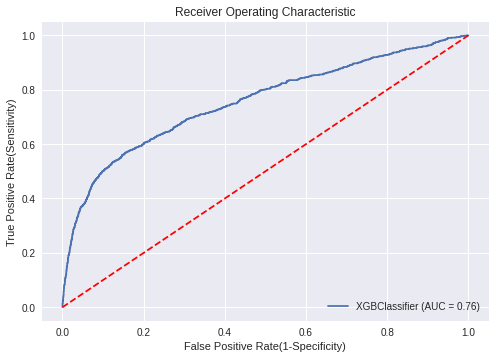

In [363]:
# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(xgboost1FF, X_test[filtered_features], y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [364]:
predictXFF = y_predFF

XGBOOST
[[6599  663]
 [ 498  475]]


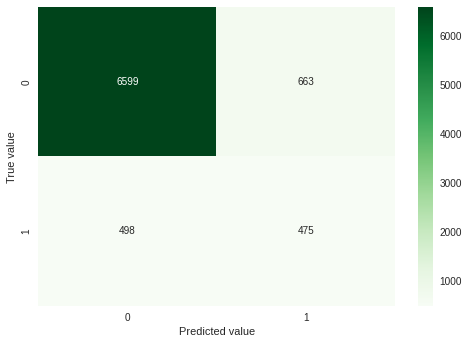

In [365]:
print("XGBOOST")
cmxff_matrix = confusion_matrix(y_test, predictXFF)
print(cmxff_matrix)
sns.heatmap(cmxff_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

###**Model Evaluation**

In [366]:
print("XGBOOST")
print(classification_report(y_test, predictXFF))
tn, fp, fn, tp=cmxff_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

XGBOOST
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7262
           1       0.42      0.49      0.45       973

    accuracy                           0.86      8235
   macro avg       0.67      0.70      0.68      8235
weighted avg       0.87      0.86      0.86      8235

TP:  475 , FP:  663 , TN:  6599 , FN: 498


In [367]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("XGBOOST")
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  predictXFF))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictXFF))
print(f"Precision: ",metrics.precision_score(y_test,predictXFF))
print(f"Recall: ",metrics.recall_score(y_test, predictXFF))
print(f"f1 Score: ",metrics.f1_score(y_test, predictXFF))
print("Training set score: %f" % xgboost1.score(X_train[filtered_features], y_train))
print("Test set score: %f" % xgboost1.score(X_test[filtered_features], y_test))
print("MSE: %f" % mean_squared_error(y_test, predictXFF))
XGBFFfpr, XGBFFtpr, _ = metrics.roc_curve(y_test, predictXFF)


XGBOOST
ROC_AUC:  0.6984418602742231
Accuracy:  0.8590163934426229
Precision:  0.4173989455184534
Recall:  0.4881808838643371
f1 Score:  0.4500236854571293
Training set score: 0.906675
Test set score: 0.859016
MSE: 0.140984


In [368]:
#for final models copmarison
XGBFF_acc = metrics.accuracy_score(y_test, predictXFF)
XGBFF_prec = metrics.precision_score(y_test, predictXFF)
XGBFF_rec = metrics.recall_score(y_test, predictXFF)
XGBFF_f1 =metrics.f1_score(y_test, predictXFF)

##**Overall Evaluation**

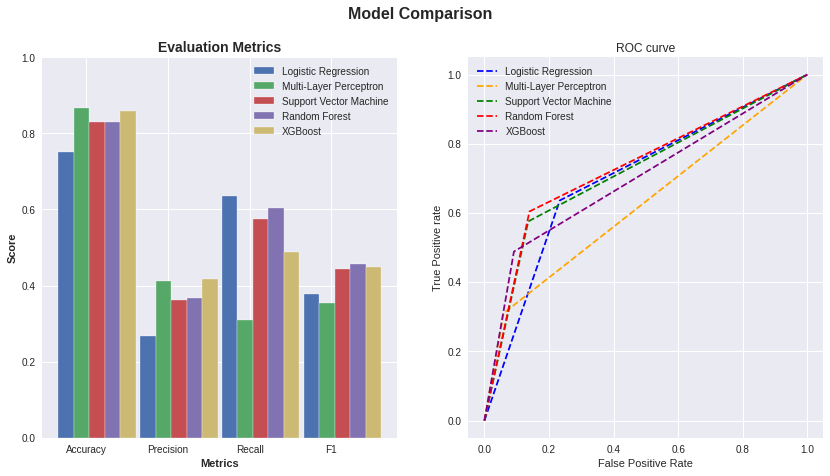

In [369]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.19
LRFF_score = [LRFF_acc, LRFF_prec, LRFF_rec, LRFF_f1]
MLPFF_score = [MLPFF_acc, MLPFF_prec, MLPFF_rec, MLPFF_f1]
SVMFF_score = [SVMFF_acc, SVMFF_prec, SVMFF_rec, SVMFF_f1]
RFFF_score = [RFFF_acc, RFFF_prec, RFFF_rec, RFFF_f1]
XGBFF_score = [XGBFF_acc, XGBFF_prec, XGBFF_rec, XGBFF_f1]

## Set position of bar on X axis
r1 = np.arange(len(LRFF_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, LRFF_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, MLPFF_score, width=barWidth, edgecolor='white', label='Multi-Layer Perceptron')
ax1.bar(r3, SVMFF_score, width=barWidth, edgecolor='white', label='Support Vector Machine')
ax1.bar(r4, RFFF_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, XGBFF_score, width=barWidth, edgecolor='white', label='XGBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.3) for r in range(len(LRFF_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(LRFFfpr, LRFFtpr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(MLPFFfpr, MLPFFtpr, linestyle='--',color='orange', label='Multi-Layer Perceptron')
plt.plot(SVMFFfpr, SVMFFtpr, linestyle='--',color='green', label='Support Vector Machine')
plt.plot(RFFFfpr, RFFFtpr, linestyle='--',color='red', label='Random Forest')
plt.plot(XGBFFfpr, XGBFFtpr, linestyle='--',color='purple', label='XGBoost')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

##**Classification Embedded Methods -LASSO Regularization (L1):**

In [370]:
from sklearn.feature_selection import SelectFromModel
Sel = SelectFromModel(LogisticRegression(penalty ='l1', C = 0.001, solver ='liblinear',max_iter=10000))

In [371]:
Sel.fit(X_train, y_train)
Sel.get_support()

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True])

In [372]:
Sel.estimator_.coef_

array([[ 7.47054683e-04,  0.00000000e+00, -4.97253863e-02,
         0.00000000e+00, -2.12072654e-01, -3.43907220e-01,
        -1.60326803e-01, -9.31543714e-01,  0.00000000e+00,
        -4.62468621e-02, -1.33461589e-01,  0.00000000e+00,
         5.76864319e-01, -1.03029387e-02]])

In [373]:
X_train_l1 = Sel.transform(X_train)
X_test_l1 = Sel.transform(X_test)
X_train_l1.shape

(58548, 10)

In [374]:
X_train_l1

array([[4.30000000e+01, 0.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+00, 9.44650000e+01, 5.22810000e+03],
       [3.00000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 9.32000000e+01, 5.19580000e+03],
       [3.70000000e+01, 2.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 9.30750000e+01, 5.09910000e+03],
       ...,
       [3.80000000e+01, 2.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.39940000e+01, 5.19100000e+03],
       [3.30000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.34440000e+01, 5.22810000e+03],
       [3.50000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.40684284e+01, 4.99160000e+03]])

In [375]:
selected_feat1= X.columns[(Sel.get_support())]

In [376]:
selected_feat1

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'cons.price.idx', 'nr.employed'],
      dtype='object')

##**Logistic Regression**

In [377]:
from time import time

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_l1, y_train)

train_predLR = logreg.predict_proba(X_train_l1)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_predLR[:,1])))

test_predLR = logreg.predict_proba(X_test_l1)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_predLR[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8234901926383926
Accuracy on test set: 0.7494965274190531
Time taken tor run:108.58536791801453 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

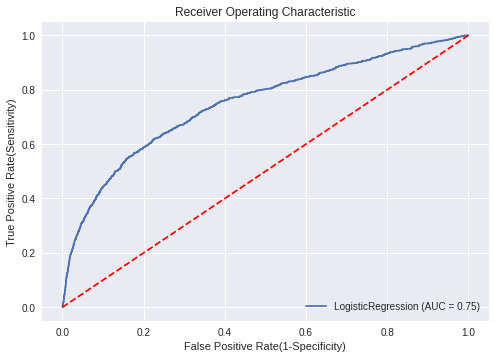

In [378]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(logreg, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [379]:
pred9= logreg.predict(X_test_l1)

Logistic Regression Model
[[5532 1730]
 [ 365  608]]




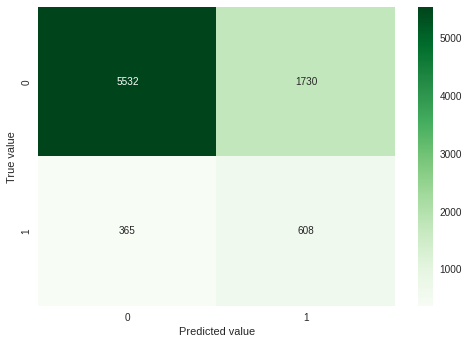

In [380]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression Model")
cm_MLP = confusion_matrix(y_test, pred9)
print(cm_MLP)
print('\n')

sns.heatmap(cm_MLP,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


In [381]:
print("Logistic Regression with LASSO Regularization (L1)")
cm = confusion_matrix(y_test, pred9)
print(cm)
print('\n')
print(classification_report(y_test,pred9))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Logistic Regression with LASSO Regularization (L1)
[[5532 1730]
 [ 365  608]]


              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7262
           1       0.26      0.62      0.37       973

    accuracy                           0.75      8235
   macro avg       0.60      0.69      0.60      8235
weighted avg       0.86      0.75      0.78      8235

TP:  608 , FP:  1730 , TN:  5532 , FN: 365


####**Model Evaluation**

In [382]:
print(classification_report(y_test,pred9))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7262
           1       0.26      0.62      0.37       973

    accuracy                           0.75      8235
   macro avg       0.60      0.69      0.60      8235
weighted avg       0.86      0.75      0.78      8235

TP:  608 , FP:  1730 , TN:  5532 , FN: 365


In [383]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  pred9))
print(f"Accuracy: ", metrics.accuracy_score(y_test, pred9))
print(f"Precision: ",metrics.precision_score(y_test, pred9))
print(f"Recall: ",metrics.recall_score(y_test, pred9))
print(f"f1 Score: ",metrics.f1_score(y_test, pred9))
print(f"Training error: %f" % mlp01.loss_curve_[-1])
#print(f"Training set score: %f" % mlp01.score(PCA_X_train, y_train))
print(f"Training set score: %f" % logreg.score(X_train_l1, y_train))
#print(f"Test set score: %f" % mlp01.score(PCA_test, y_test))
print(f"Test set score: %f" % logreg.score(X_test_l1, y_test))
print(f"MSE: %f" % mean_squared_error(y_test, pred9))
LRl1fpr, LRl1tpr, _ = metrics.roc_curve(y_test, pred9)
#print(scores1.mean())

ROC_AUC:  0.6933225737150376
Accuracy:  0.7455980570734669
Precision:  0.2600513259195894
Recall:  0.6248715313463515
f1 Score:  0.36726064633041383
Training error: 0.531662
Training set score: 0.751298
Test set score: 0.745598
MSE: 0.254402


In [384]:
#for final models copmarison
LRL1_acc = metrics.accuracy_score(y_test, pred9)
LRL1_prec = metrics.precision_score(y_test, pred9)
LRL1_rec = metrics.recall_score(y_test, pred9)
LRL1_f1 =metrics.f1_score(y_test, pred9)


##**MLP**

In [385]:
from sklearn.neural_network import MLPClassifier 
from time import time

start = time() 

# define and train an MLPClassifier named mlp on the given data
mlp01l1 = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
#mlp01.fit(PCA_X_train, y_train)
mlp01l1.fit(X_train_l1, y_train)


#mlptrain_pred03 = mlp01.predict_proba(PCA_X_train)
mlptrain_pred03l1 = mlp01l1.predict_proba(X_train_l1)

print('Accuracy on training set: {}'.format(roc_auc_score(y_train, mlptrain_pred03l1[:,1])))

#mlptest_pred03 = mlp01.predict_proba(PCA_X_test)
mlptest_pred03l1 = mlp01l1.predict_proba(X_test_l1)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, mlptest_pred03[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8179434538743002
Accuracy on test set: 0.7534677691218391
Time taken tor run:306.8723113536835 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

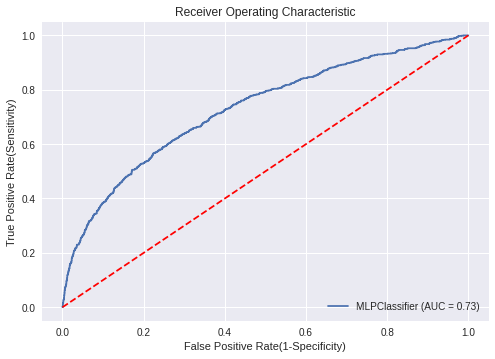

In [386]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
#metrics.plot_roc_curve(mlp01, PCA_X_test, y_test)
metrics.plot_roc_curve(mlp01l1, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [387]:
pred03l1 = mlp01l1.predict(X_test_l1)

MLP  Model
[[5867 1395]
 [ 462  511]]




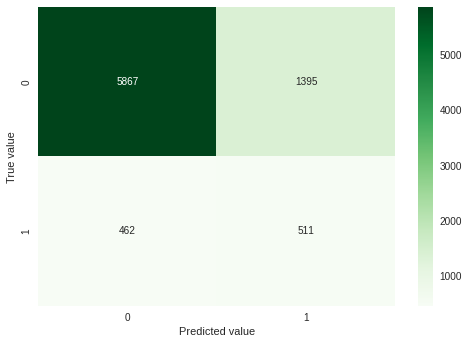

In [388]:
from sklearn.metrics import confusion_matrix
print("MLP  Model")
cm_MLPl1 = confusion_matrix(y_test, pred03l1)
print(cm_MLPl1)
print('\n')

sns.heatmap(cm_MLPl1,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

####**Model Evaluation**

In [389]:
print(classification_report(y_test,pred03l1))
tn, fp, fn, tp=cm_MLPl1.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      7262
           1       0.27      0.53      0.35       973

    accuracy                           0.77      8235
   macro avg       0.60      0.67      0.61      8235
weighted avg       0.85      0.77      0.80      8235

TP:  511 , FP:  1395 , TN:  5867 , FN: 462


In [390]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"ROC_AUC: ", metrics.roc_auc_score(y_test,  pred03l1))
print(f"Accuracy: ", metrics.accuracy_score(y_test, pred03l1))
print(f"Precision: ",metrics.precision_score(y_test, pred03l1))
print(f"Recall: ",metrics.recall_score(y_test, pred03l1))
print(f"f1 Score: ",metrics.f1_score(y_test, pred03l1))
print(f"Training error: %f" % mlp01.loss_curve_[-1])
#print(f"Training set score: %f" % mlp01.score(PCA_X_train, y_train))
print(f"Training set score: %f" % mlp01l1.score(X_train_l1, y_train))
#print(f"Test set score: %f" % mlp01.score(PCA_test, y_test))
print(f"Test set score: %f" % mlp01l1.score(X_test_l1, y_test))
print(f"MSE: %f" % mean_squared_error(y_test, pred03l1))
MLPL1fpr, MLPL1tpr, _ = metrics.roc_curve(y_test, pred03l1)
#print(scores1.mean())

ROC_AUC:  0.6665420073745465
Accuracy:  0.7744990892531877
Precision:  0.26810073452256034
Recall:  0.5251798561151079
f1 Score:  0.3549843695727683
Training error: 0.531662
Training set score: 0.746277
Test set score: 0.774499
MSE: 0.225501


In [391]:
#for final models copmarison
MLPL1_acc = metrics.accuracy_score(y_test, pred03l1)
MLPL1_prec = metrics.precision_score(y_test, pred03l1)
MLPL1_rec = metrics.recall_score(y_test, pred03l1)
MLPL1_f1 =metrics.f1_score(y_test, pred03l1)

##**SVM**

In [392]:
from sklearn import svm
# we create an instance of SVM and fit out data.
from time import time

start = time() 
svcl1 = svm.SVC(kernel='rbf', C=0.1, gamma=0.1).fit(X_train_l1,y_train)


print(f'Time taken tor run:{time() - start} seconds')

Time taken tor run:205.1488537788391 seconds


In [394]:
predictionsl1 = svcl1.predict(X_test_l1)
y_hatl1 = pd.DataFrame(predictionsl1, columns=["Predicted y"])

#svcl1train_pred03 = svcl1.predict_proba(X_train_l1)
#print('Accuracy on training set: {}'.format(roc_auc_score(y_train, svcl1train_pred03[:,1])))
#svcl1test_pred03 = svcl1.predict_proba(X_test_l1)
#print('Accuracy on test set: {}'.format(roc_auc_score(y_test, svcl1test_pred03[:,1])))

*  Accuracy on training set: 0.8570512678599103
*  Accuracy on test set: 0.7535614581867968

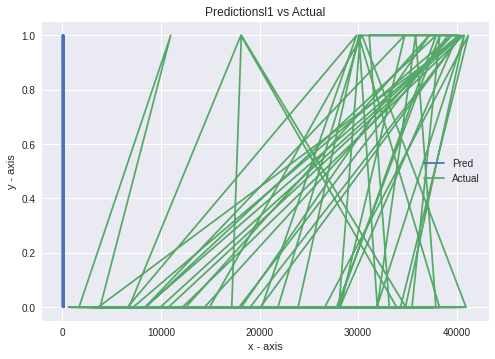

In [395]:
plt.plot(y_hatl1[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predictionsl1 vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Text(0.5, 0, 'False Positive Rate(1-Specificity)')

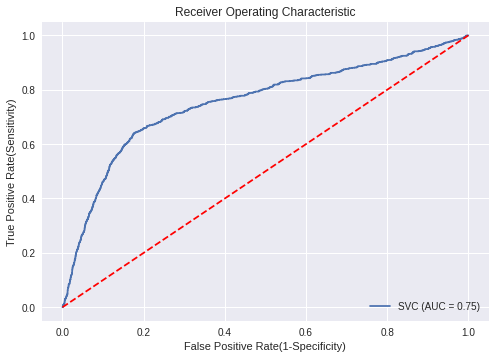

In [396]:
#F# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(svcl1, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [397]:
predictSl1 = predictionsl1 

SVM  Model
[[6040 1222]
 [ 369  604]]




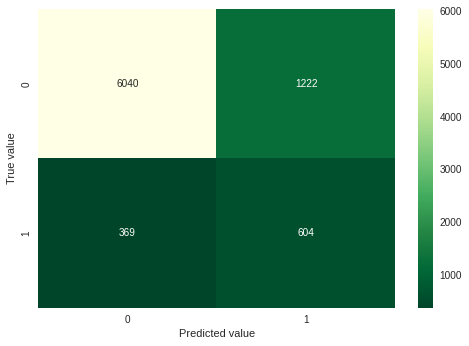

In [398]:
from sklearn.metrics import confusion_matrix
print("SVM  Model")
cmsli_matrix = confusion_matrix(y_test, predictSl1)
print(cmsli_matrix)
print('\n')

cmsli_matrix = confusion_matrix(y_test, predictSl1)
sns.heatmap(cmsli_matrix,annot=True, cmap="YlGn_r", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


####**Model Evaluation**

In [399]:
from sklearn.metrics import classification_report
print("SVM Model")
print(classification_report(y_test, predictSl1))
print(cmsli_matrix)
print('\n')
tn, fp, fn, tp=cmsli_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

SVM Model
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7262
           1       0.33      0.62      0.43       973

    accuracy                           0.81      8235
   macro avg       0.64      0.73      0.66      8235
weighted avg       0.87      0.81      0.83      8235

[[6040 1222]
 [ 369  604]]


TP:  604 , FP:  1222 , TN:  6040 , FN: 369


In [400]:
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"AOC: ", metrics.roc_auc_score(y_test,  predictSl1))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictSl1))
print(f"Precision: ",metrics.precision_score(y_test,predictSl1))
print(f"Recall: ",metrics.recall_score(y_test, predictSl1))
print(f"f1 Score: ",metrics.f1_score(y_test, predictSl1))
print("Training set score: %f" % svcl1.score(X_train_l1, y_train))
print("Test set score: %f" % svcl1.score(X_test_l1, y_test))
print("MSE: %f" % mean_squared_error(y_test, predictSl1))
SVMl1fpr, SVMl1tpr, _ = metrics.roc_curve(y_test, predictSl1)

AOC:  0.726243665727606
Accuracy:  0.8068002428658166
Precision:  0.3307776560788609
Recall:  0.6207605344295992
f1 Score:  0.4315827081100393
Training set score: 0.770376
Test set score: 0.806800
MSE: 0.193200


In [401]:
#for final models copmarison
SVML1_acc = metrics.accuracy_score(y_test, predictSl1)
SVML1_prec = metrics.precision_score(y_test, predictSl1)
SVML1_rec = metrics.recall_score(y_test, predictSl1)
SVML1_f1 =metrics.f1_score(y_test, predictSl1)

##**Random Forest** 

In [402]:
# To improve the results of RF I tested n_estimators for 40,50,100,200,10000 
#with max_depth of 2, 3 and 4
from time import time

start = time() 
L1RandFor = RandomForestClassifier(n_estimators=50, random_state=43, max_depth=3)
L1RandFor.fit(X_train_l1, y_train)

L1trainpred = L1RandFor.predict_proba(X_train_l1)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, L1trainpred[:,1])))

L1testpred = L1RandFor.predict_proba(X_test_l1)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, L1testpred[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.8316584218458353
Accuracy on test set: 0.7734292716906461
Time taken tor run:1.1625559329986572 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

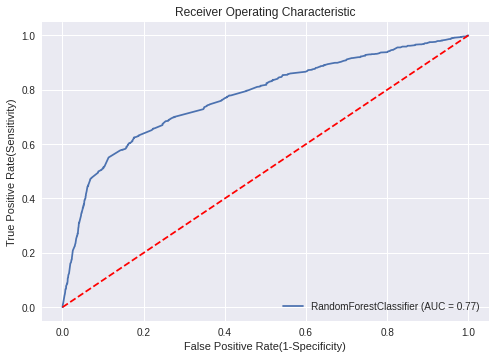

In [403]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(L1RandFor, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

####**Confusion Matrix**

In [404]:
predRl1 = L1RandFor.predict(X_test_l1)

Random Forest


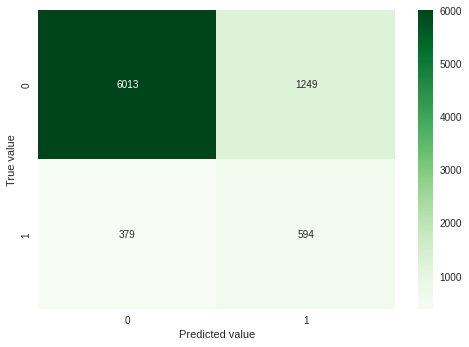

In [405]:
print("Random Forest")
from sklearn.metrics import confusion_matrix
cnr_matrix = confusion_matrix(y_test, predRl1)

sns.heatmap(cnr_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [406]:
print("RandomForest with LASSO Regularization (L1)")
cm = confusion_matrix(y_test, predRl1)
print(cm)
print('\n')
print(classification_report(y_test,predRl1))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

RandomForest with LASSO Regularization (L1)
[[6013 1249]
 [ 379  594]]


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7262
           1       0.32      0.61      0.42       973

    accuracy                           0.80      8235
   macro avg       0.63      0.72      0.65      8235
weighted avg       0.87      0.80      0.83      8235

TP:  594 , FP:  1249 , TN:  6013 , FN: 379


####**Evaluation of Model**

In [407]:
print("Random Forest")
cm = confusion_matrix(y_test, predRl1)
print(cm)
print('\n')
print(classification_report(y_test,predRl1))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forest
[[6013 1249]
 [ 379  594]]


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7262
           1       0.32      0.61      0.42       973

    accuracy                           0.80      8235
   macro avg       0.63      0.72      0.65      8235
weighted avg       0.87      0.80      0.83      8235

TP:  594 , FP:  1249 , TN:  6013 , FN: 379


In [408]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("Random Forest")
print(f"AOC: ", metrics.roc_auc_score(y_test,  predRl1))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predRl1))
print(f"Precision: ",metrics.precision_score(y_test,predRl1))
print(f"Recall: ",metrics.recall_score(y_test, predRl1))
print(f"f1 Score: ",metrics.f1_score(y_test, predRl1))
print("Training set score: %f" % logreg.score(X_train_l1, y_train))
print("Test set score: %f" % logreg.score(X_train_l1, y_train))
print("MSE: %f" % mean_squared_error(y_test, predRl1))
RFLfpr, RFLtpr, _ = metrics.roc_curve(y_test, predRl1)


Random Forest
AOC:  0.7192459275684462
Accuracy:  0.8023072252580449
Precision:  0.32230059685295714
Recall:  0.6104830421377184
f1 Score:  0.421875
Training set score: 0.751298
Test set score: 0.751298
MSE: 0.197693


In [409]:
#for final models copmarison
RFL1_acc = metrics.accuracy_score(y_test, predRl1)
RFL1_prec = metrics.precision_score(y_test, predRl1)
RFL1_rec = metrics.recall_score(y_test, predRl1)
RFL1_f1 =metrics.f1_score(y_test, predRl1)

##**XGBOOST**

In [410]:
#see the classification performance of the XGBoost 
from time import time

start = time() 
xgboost1l1 = XGBClassifier(max_depth=11, 
                            learning_rate=0.1, 
                            n_estimators=70, 
                            min_child_weight=2, 
                            subsample=0.5, 
                            n_jobs=-1)
y_predXl1 = xgboost1l1.fit(X_train_l1, y_train).predict(X_test_l1)

trainpredXl1 = xgboost1l1.predict_proba(X_train_l1)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, trainpredXl1[:,1])))

testpredXl1 = xgboost1l1.predict_proba(X_test_l1)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, testpredXl1[:,1])))

print(f'Time taken tor run:{time() - start} seconds')

Accuracy on training set: 0.95195845073516
Accuracy on test set: 0.7574450963681194
Time taken tor run:8.040740966796875 seconds


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

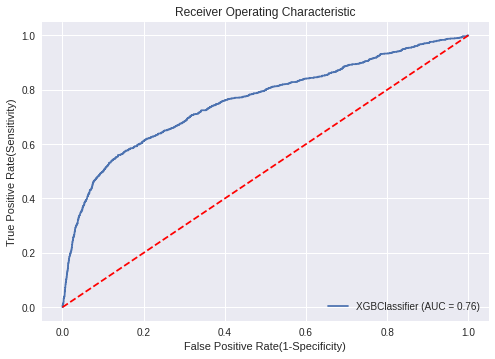

In [411]:
# draw the ROC-AUC chart 
#print('AUC: {}'.format(auc(fpr, tpr)))
metrics.plot_roc_curve(xgboost1l1, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')


####**Confusion Matrix**

In [412]:
predictXl1 = y_predXl1

XGBOOST
[[6466  796]
 [ 467  506]]


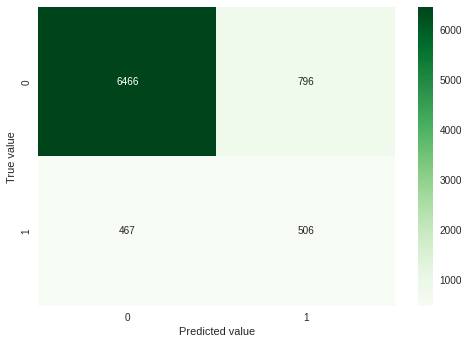

In [413]:
print("XGBOOST")
cmxgli_matrix = confusion_matrix(y_test, predictXl1)
print(cmxgli_matrix)
sns.heatmap(cmxgli_matrix,annot=True, cmap="Greens", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

####**Model Evaluation** 

In [414]:
print("XGBOOST")
print(classification_report(y_test, predictXl1))
tn, fp, fn, tp=cmxgli_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

XGBOOST
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7262
           1       0.39      0.52      0.44       973

    accuracy                           0.85      8235
   macro avg       0.66      0.71      0.68      8235
weighted avg       0.87      0.85      0.86      8235

TP:  506 , FP:  796 , TN:  6466 , FN: 467


In [415]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("XGBOOST")
print(f"AOC: ", metrics.roc_auc_score(y_test,  predictXl1))
print(f"Accuracy: ", metrics.accuracy_score(y_test, predictXl1))
print(f"Precision: ",metrics.precision_score(y_test,predictXl1))
print(f"Recall: ",metrics.recall_score(y_test, predictXl1))
print(f"f1 Score: ",metrics.f1_score(y_test, predictXl1))
print("Training set score: %f" % xgboost1l1.score(X_train_l1, y_train))
print("Test set score: %f" % xgboost1l1.score(X_test_l1, y_test))
print("MSE: %f" % mean_squared_error(y_test, predictXl1))
XGBL1fpr, XGBL1tpr, _ = metrics.roc_curve(y_test, predictXl1)

XGBOOST
AOC:  0.705214716372631
Accuracy:  0.8466302367941713
Precision:  0.38863287250384027
Recall:  0.5200411099691675
f1 Score:  0.44483516483516483
Training set score: 0.873779
Test set score: 0.846630
MSE: 0.153370


In [416]:
#for final models copmarison
XGBL1_acc = metrics.accuracy_score(y_test, predictX)
XGBL1_prec = metrics.precision_score(y_test, predictX)
XGBL1_rec = metrics.recall_score(y_test, predictX)
XGBL1_f1 =metrics.f1_score(y_test, predictX)

##**Overall Model Evaluation**

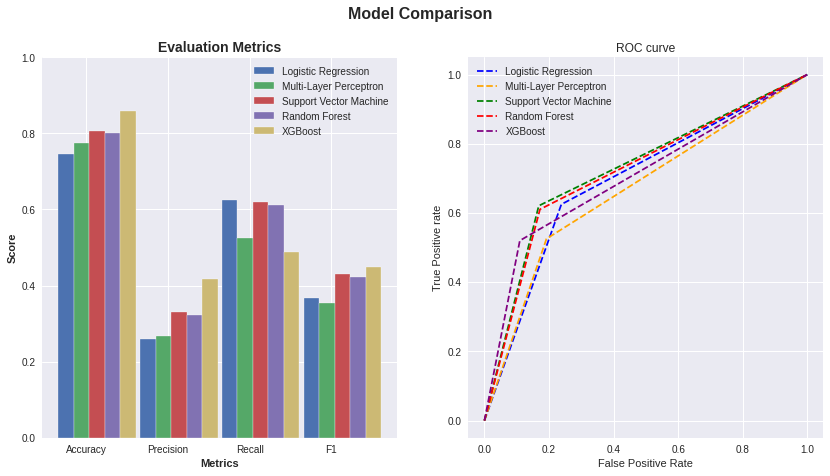

In [417]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.19
LRL1_score = [LRL1_acc, LRL1_prec, LRL1_rec, LRL1_f1]
MLPL1_score = [MLPL1_acc, MLPL1_prec, MLPL1_rec, MLPL1_f1]
SVML1_score = [SVML1_acc, SVML1_prec, SVML1_rec, SVML1_f1]
RFL1_score = [RFL1_acc, RFL1_prec, RFL1_rec, RFL1_f1]
XGBL1_score = [XGBL1_acc, XGBL1_prec, XGBL1_rec, XGBL1_f1]

## Set position of bar on X axis
r1 = np.arange(len(LRL1_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, LRL1_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, MLPL1_score, width=barWidth, edgecolor='white', label='Multi-Layer Perceptron')
ax1.bar(r3, SVML1_score, width=barWidth, edgecolor='white', label='Support Vector Machine')
ax1.bar(r4, RFL1_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, XGBL1_score, width=barWidth, edgecolor='white', label='XGBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.3) for r in range(len(LRL1_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(LRl1fpr, LRl1tpr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(MLPL1fpr, MLPL1tpr, linestyle='--',color='orange', label='Multi-Layer Perceptron')
plt.plot(SVMl1fpr, SVMl1tpr, linestyle='--',color='green', label='Support Vector Machine')
plt.plot(RFLfpr, RFLtpr, linestyle='--',color='red', label='Random Forest')
plt.plot(XGBL1fpr, XGBL1tpr, linestyle='--',color='purple', label='XGBoost')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()